<div style="color:black;
            display:fill;
            border-radius:15px;
            background-color:pink;
            font-size:100%;
            font-family:cambria;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:black;
              text-align:center;'>
        COMPANY BANKRUPTCY PREDICTION
    </h2>
</div>

<center>
    <img src="https://im.indiatimes.in/content/2023/Apr/From-Apple-To-Tesla-10-Big-Companies-That-Bounced-Back-From-The-Brink-Of-Bankruptcy_6437fe0f5fa73.jpg?w=1200&h=900&cc=1&webp=1&q=75" alt="Bankrupt Company" width="800" height="150"/>
</center>


## Problem Statement

A failing company / business can not only have negative effects on the country's economy, but also on the personal lives of all the employees involved in the company / business as well, therefore it is very crucial to predict the downfall of the company / business so that investors and higher ups with high stakes involved in it can take appropriate measures to ensure a safe comeback from the downfall. The idea of this project is to analyse the multiple aspects, features and KPI of the companies and design a model that can learn from this and predict if the company is going to have a downfall or not and alert the investors on time. 

## Packages Installation

In [ ]:
! pip install ppscore pandas==2.0.0 feature_engine pyod


  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of ppscore to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of feature-engine to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 25.0 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.1.0-py2.py3-none-any.whl size=12962 sha256=c4b4cae0e7ba9d15f380bb79e9834bff43e6a6d998852185e5dd3ddcc78969df
  Stored in directory: /root/.cache/pip/wheels/23/48/57/cbfd19190

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns


# from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import probplot
import gc
import matplotlib
# from pyod.models.ecod import ECOD
# import ppscore as pps

# # Build the Regression / Regressor models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# import os
import datetime
from datetime import datetime as datet
from scipy.stats import ttest_ind
import warnings
from pickle import dump, load
# from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, DropDuplicateFeatures

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
mp.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv("data.csv")
X_train, X_test, Y_train, Y_test = train_test_split(data.drop("Bankrupt?", axis=1), data["Bankrupt?"], random_state=104, test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
X_train.head()

(5455, 95)
(1364, 95)
(5455,)
(1364,)


ROA(C) before interest and depreciation before interest  \
4135                                           0.577682         
1201                                           0.471506         
2496                                           0.473651         
4118                                           0.491786         
5998                                           0.545898         

      ROA(A) before interest and % after tax  \
4135                                0.621838   
1201                                0.532272   
2496                                0.515700   
4118                                0.551515   
5998                                0.601123   

      ROA(B) before interest and depreciation after tax  \
4135                                           0.611168   
1201                                           0.524653   
2496                                           0.515659   
4118                                           0.545961   
5998                                           0.583329   

      Operating Gross Margin  Realized Sales Gross Margin  \
4135                0.603951                     0.604008   
1201                0.604852                     0.604974   
2496                0.578165                     0.578165   
4118                0.601587                     0.601609   
5998                0.599274                     0.599072   

      Operating Profit Rate  Pre-tax net Interest Rate  \
4135               0.999054                   0.797496   
1201               0.998999                   0.797295   
2496               0.998648                   0.795879   
4118               0.999015                   0.797407   
5998               0.999024                   0.797459   

      After-tax net Interest Rate  \
4135                     0.809387   
1201                     0.809226   
2496                     0.807894   
4118                     0.809330   
5998                     0.809362   

      Non-industry income and expenditure/revenue  \
4135                                     0.303533   
1201                                     0.303295   
2496                                     0.301557   
4118                                     0.303460   
5998                                     0.303531   

      Continuous interest rate (after tax)  Operating Expense Rate  \
4135                              0.781651            8.210000e+09   
1201                              0.781477            1.519464e-04   
2496                              0.780017            7.370000e+08   
4118                              0.781599            8.220000e+09   
5998                              0.781624            3.240000e+09   

      Research and development expense rate  Cash flow rate  \
4135                           1.260000e+09        0.463800   
1201                           3.800000e+09        0.462807   
2496                           0.000000e+00        0.458980   
4118                           1.710000e+09        0.462313   
5998                           0.000000e+00        0.461346   

      Interest-bearing debt interest rate  Tax rate (A)  \
4135                             0.000759      0.271485   
1201                             0.000606      0.000000   
2496                             0.000465      0.000000   
4118                             0.000658      0.085839   
5998                             0.000318      0.261869   

      Net Value Per Share (B)  Net Value Per Share (A)  \
4135                 0.221482                 0.221482   
1201                 0.154018                 0.154018   
2496                 0.137162                 0.113354   
4118                 0.176689                 0.176689   
5998                 0.201298                 0.201298   

      Net Value Per Share (C)  Persistent EPS in the Last Four Seasons  \
4135                 0.221482                                 0.293372   
1201                 0.154018                                

In [ ]:
data.shape

(6819, 96)

In [ ]:
data["Bankrupt?"].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

* The data is very much unbalanced, the companies that went bankrupt are very few in number and this will affect our model training.
* For this we need to upsample the data by using such algorithms like **SMOTE** or **BorderlineSMOTE** (this is the one used ahead in the notebook)

## Data Quality
* This function performs several operations to get the overall idea of the data such as which ones are the numerical and categorical columns, and their unque values, the distribution of these unique values etc.
* This also finds out the null / missing values in all the columns.
* Also provides us with the skew and kurtosis of the features to understand the distribution of the feature alone.

In [ ]:
def data_quality(data, target_var, unique_val_threshold = 20, num_to_cat_threshold = 20):
    cat_cols = []
    num_cols = []
    cat_cols_num_val = []
    date_time_cols = []
    data_info = pd.DataFrame(columns=['Column Name', 'Num Unique Values', 'DType', "Null Values", "Skew", "Kurtosis"])
    ctr = 1

    print("Shape:- ", data.shape[0], " rows & ", data.shape[1], " cols")
    print("\n--------------------------------------------------------\n")
    # print(data.isna().sum())
    # print("\n--------------------------------------------------------\n")

    for col in data.columns:
        # print(col, " - ", data[col].nunique(), " - ", data[col].dtypes, "\n")
        data_info.loc[ctr] = [col, data[col].nunique(), data[col].dtypes, data[col].isna().sum(), data[col].skew(), data[col].kurtosis()]
        ctr += 1

        if data[col].nunique() <= unique_val_threshold:
            print(col)
            print(data[col].unique())
            print("----------------------------------------------------------------------------")
            print()

        if data[col].dtypes == object:
            cat_cols.append(col)
        elif data[col].dtypes == "int64" or data[col].dtypes == "float64":
            if data[col].nunique() <= num_to_cat_threshold:
                cat_cols_num_val.append(col)
            else:
                num_cols.append(col)
        elif data[col].dtypes == "datetime64":
            date_time_cols.append(col)

    dups = data.drop([target_var], axis = 1).duplicated().sum()
    print("Total number of Duplicates:- ", dups)
    print("\n--------------------------------------------------------\n")

    print("Categorical Columns:-\n", cat_cols, "\n")
    print("Numerical Columns:- \n", num_cols, "\n")
    print("Categorical Coumns Having Numerical Values:- \n", cat_cols_num_val, "\n")
    print("Date Time Columns:-\n", date_time_cols, "\n")
    print("\n--------------------------------------------------------\n")
    # data_info = pd.concat([data_info, data.isna().sum()])
    return data_info, cat_cols, num_cols, cat_cols_num_val, date_time_cols

In [ ]:
data_info, cat_cols, num_cols, cat_col_num_val, date_time_cols = data_quality(data, "Bankrupt?")

Shape:-  6819  rows &  96  cols

--------------------------------------------------------

Bankrupt?
[1 0]
----------------------------------------------------------------------------

 Liability-Assets Flag
[0 1]
----------------------------------------------------------------------------

 Net Income Flag
[1]
----------------------------------------------------------------------------

Total number of Duplicates:-  0

--------------------------------------------------------

Categorical Columns:-
 [] 

Numerical Columns:- 
 [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cas

In [ ]:
data_info

Column Name  Num Unique Values  \
1                                           Bankrupt?                  2   
2    ROA(C) before interest and depreciation befor...               3333   
3              ROA(A) before interest and % after tax               3151   
4    ROA(B) before interest and depreciation after...               3160   
5                              Operating Gross Margin               3781   
6                         Realized Sales Gross Margin               3788   
7                               Operating Profit Rate               3376   
8                           Pre-tax net Interest Rate               3789   
9                         After-tax net Interest Rate               3604   
10        Non-industry income and expenditure/revenue               2551   
11               Continuous interest rate (after tax)               3617   
12                             Operating Expense Rate               2966   
13              Research and development expense rate               1536   
14                                     Cash flow rate               5557   
15                Interest-bearing debt interest rate               1080   
16                                       Tax rate (A)               2488   
17                            Net Value Per Share (B)               2278   
18                            Net Value Per Share (A)               2285   
19                            Net Value Per Share (C)               2284   
20            Persistent EPS in the Last Four Seasons               1358   
21                                Cash Flow Per Share               1545   
22                         Revenue Per Share (Yuan ¥)               3807   
23                Operating Profit Per Share (Yuan ¥)               1236   
24           Per Share Net profit before tax (Yuan ¥)               1522   
25            Realized Sales Gross Profit Growth Rate               5583   
26                       Operating Profit Growth Rate               6249   
27                   After-tax Net Profit Growth Rate               6246   
28                     Regular Net Profit Growth Rate               6253   
29                  Continuous Net Profit Growth Rate               6270   
30                            Total Asset Growth Rate               1751   
31                              Net Value Growth Rate               4502   
32               Total Asset Return Growth Rate Ratio               2903   
33                                Cash Reinvestment %               3599   
34                                      Current Ratio               6132   
35                                        Quick Ratio               6094   
36                             Interest Expense Ratio               3794   
37                         Total debt/Total net worth               5518   
38                                       Debt ratio %               4208   
39                                   Net worth/Assets               4208   
40               Long-term fund suitability ratio (A)               6523   
41                               Borrowing dependency               4338   
42                   Contingent liabilities/Net worth               1855   
43                   Operating profit/Paid-in capital               4423   
44              Net profit before tax/Paid-in capital               4785   
45        Inventory and accounts receivable/Net value               5289   
46                               Total Asset Turnover                381   
47                       Accounts Receivable Turnover               1593   
48                            Average Collection Days               5451   
49                    Inventory Turnover Rate (times)               2397   
50                    Fixed Assets Turnover Frequency               2451   
51                    Net Worth Turnover Rate (times)                741   
52                                 Revenue per person               5667   
53            

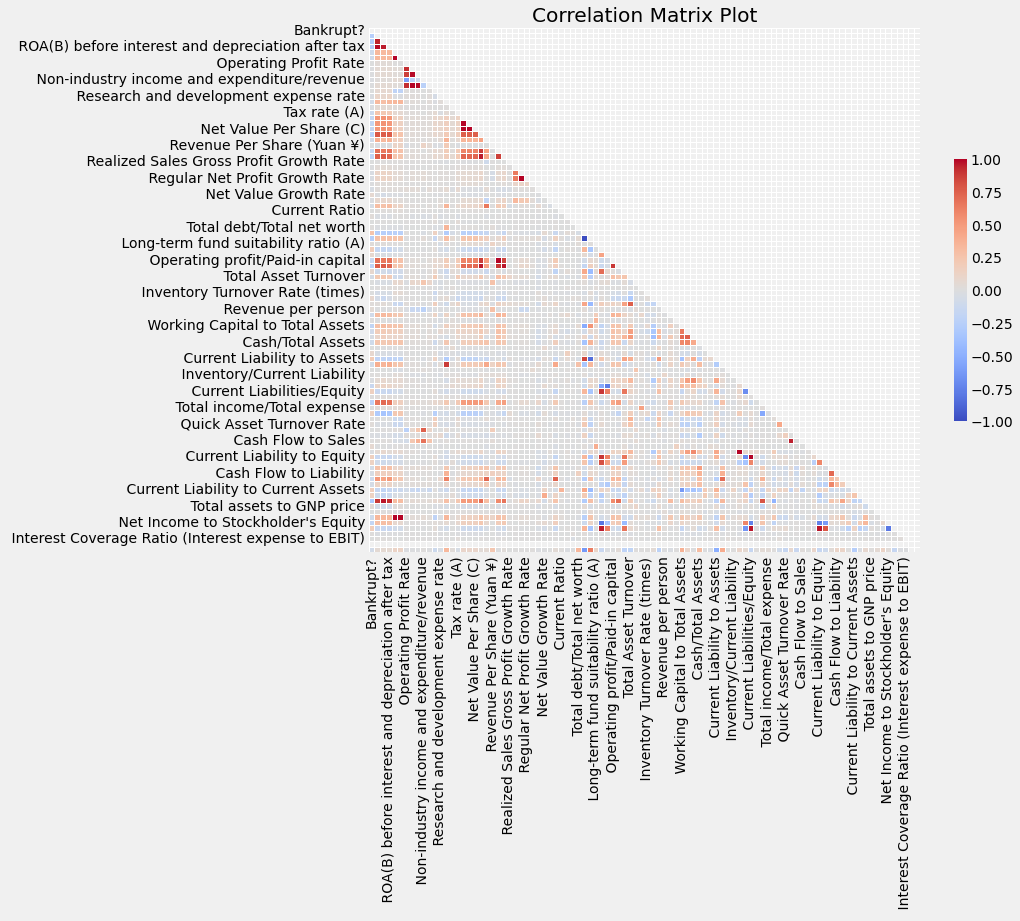

In [ ]:
data_corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data_corr, dtype=bool))
fig, ax = mp.subplots(figsize=(11, 9))
palette = sns.color_palette("coolwarm", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_corr, mask=mask, cmap=palette, center=0, linewidths=0.7, cbar_kws={"shrink": .5})

mp.title("Correlation Matrix Plot")
mp.show()

There seems to be some coorelation between some features thus these might not be all that helpful since theother feature will be enough to provide the necessary information.

## Feature Selection
**Did not use as a part of the final project.**

In [ ]:
# X, y = data.drop(["Bankrupt?"], axis=1), data["Bankrupt?"]
# X.drop(X.columns[X.nunique() == 1][0], axis = 1, inplace = True)

# pipeline = Pipeline(steps=[
#     ('Constant', DropConstantFeatures()),
#     ('Correlated', DropCorrelatedFeatures())
# ])

# X_train_after_pipeline = pipeline.fit_transform(X_train)
# print(X_train_after_pipeline.shape)

# # print(X_train_after_pipeline.columns)
# ftr_engine_cols = list(X_train_after_pipeline.columns)

(4568, 67)


* The problem with the above functions **DropConstantFeatures**, **DropCorrelatedFeatures** is that on my local device they gave me certain results, i.e. they revmoved certain columns but when I uploaded the same notebook on colab the results were very much different.
* I tired researching why this is the case but couldn't find any specific reason for this.
* So for now I am just leaving this here, and will not be using the results of this code cell in my dataset or anywhere in the notebook.
* If you have any information as to why this might be happening please let me know. Any help would be appreciated.

In [ ]:
X_train = X_train_after_pipeline
print(X_train.shape)

(4568, 67)


## Mutual Information
* Mutual Information is a measure of how much **information** you can get of one variable by observing another variable.
* Thus MI is one way to find out which features give the most information regarding the target column and those features can be used for the model building.
* It captures non-linear relation between variables, and handles continuous and discreete variables easily.<br><br>
Sources:-
* [MI - Josh Starmer](https://www.youtube.com/watch?app=desktop&v=eJIp_mgVLwE)
* [MI - Medium Article](https://towardsdatascience.com/an-intuitive-view-on-mutual-information-db0655535f84)
* [Mutual Information v/s Information Gain](https://www.geeksforgeeks.org/information-gain-and-mutual-information-for-machine-learning/)
* [MI - Feature Selection](https://bobrupakroy.medium.com/mutual-information-score-feature-selection-8eb19071664b#:~:text=Mutual%20information%20is%20straightforward%20when,condition%20of%20the%20target%20value.&text=The%20MI%20score%20will%20fall,the%20feature%20and%20the%20target.)
* [MI between continous and discreet variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3929353/)

In [ ]:
def mi(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [ ]:
# mi_cols = mi(data.drop(["Bankrupt?"], axis = 1), data["Bankrupt?"])
mi_cols = mi(X_train, Y_train)
mi_selected_cols = mi_cols.loc[mi_cols >= 0.03].index.tolist()
mi_selected_cols

[" Net Income to Stockholder's Equity",
 ' Borrowing dependency',
 ' Net profit before tax/Paid-in capital',
 ' ROA(A) before interest and % after tax',
 ' Net Income to Total Assets',
 ' Persistent EPS in the Last Four Seasons',
 ' Continuous interest rate (after tax)',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' Net worth/Assets',
 ' Net Value Per Share (B)',
 ' Total income/Total expense',
 ' Equity to Liability',
 ' Debt ratio %',
 ' Interest Expense Ratio',
 ' Net Value Per Share (A)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Retained Earnings to Total Assets',
 ' Liability to Equity',
 ' ROA(C) before interest and depreciation before interest',
 ' Net Value Per Share (C)',
 ' ROA(B) before interest and depreciation after tax',
 ' Degree of Financial Leverage (DFL)']

* We can use the following columns for our model building as these are capable of giving some information about the target variable.

## Predictive Power Score
* The PPS is an asymmetric, data-type-agnostic score that can detect linear or non-linear relationships between two columns.
* The score ranges from 0 (no predictive power) to 1 (perfect predictive power).
* It can also be used for feature selection and get more features for model building.

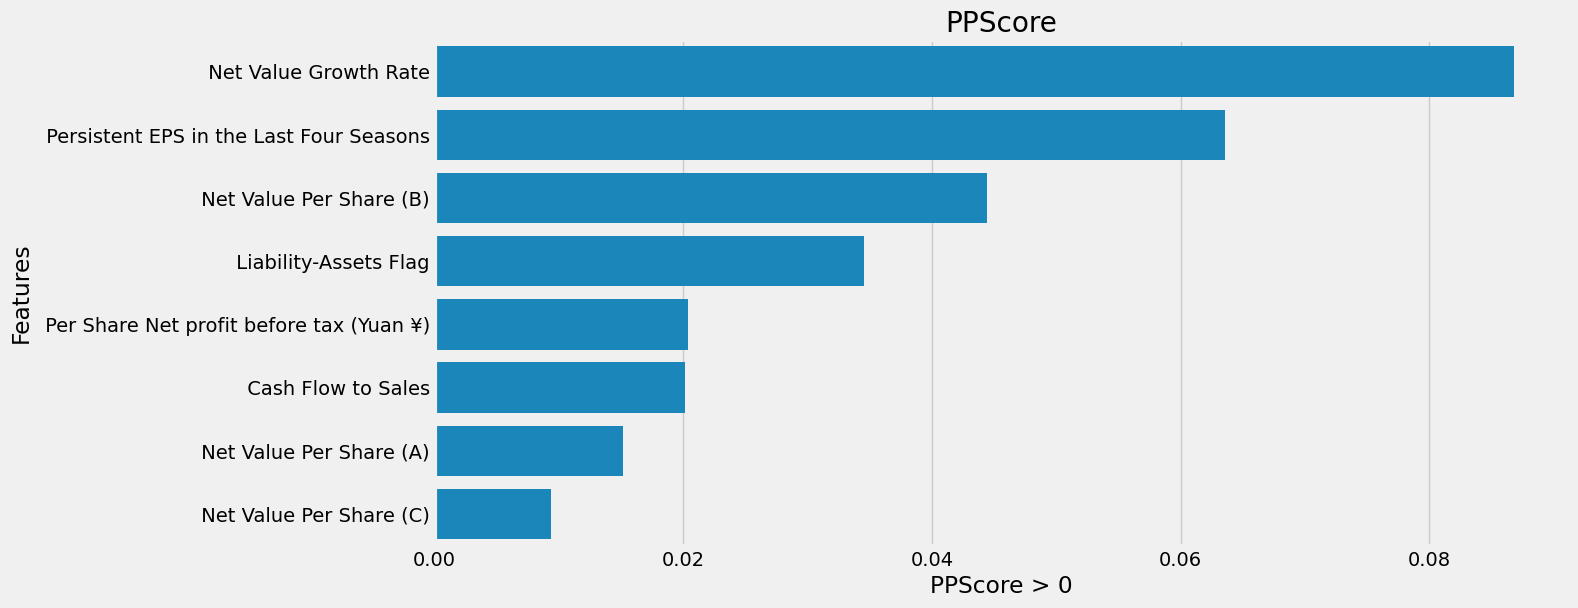

In [ ]:
# Calculating Predictive power score (PPS)
# X_train, y_train = data.drop(["Bankrupt?"], axis=1), data["Bankrupt?"]
pps_input_df = X_train.copy()
pps_input_df['Bankrupt'] = Y_train.astype(str).copy()
pps_df = pps.predictors(pps_input_df, y="Bankrupt", palette = "viridis")
pps_df = pps_df[pps_df.ppscore > 0]

# Plotting PPS
mp.figure(figsize=(16,6))
plot = sns.barplot(data=pps_df, x="ppscore", y="x")
mp.ylabel("Features")
mp.xlabel("PPScore > 0")
mp.tight_layout()
mp.title("PPScore")
mp.show()

These above plotted variables also show a good non-zero predictive score and thus can be used for model building as well.

In [ ]:
X_train.head()

ROA(C) before interest and depreciation before interest   
0                                           0.452884         \
1                                           0.480622          
2                                           0.475357          
3                                           0.470628          
4                                           0.409301          

    ROA(A) before interest and % after tax   
0                                 0.511121  \
1                                 0.535107   
2                                 0.544538   
3                                 0.500109   
4                                 0.460587   

    ROA(B) before interest and depreciation after tax   
0                                           0.502329   \
1                                           0.525671    
2                                           0.527812    
3                                           0.520478    
4                                           0.451470    

    Operating Gross Margin   Realized Sales Gross Margin   
0                 0.610213                      0.610300  \
1                 0.604578                      0.604585   
2                 0.616217                      0.616217   
3                 0.598985                      0.598985   
4                 0.597342                      0.597342   

    Operating Profit Rate   Pre-tax net Interest Rate   
0                0.998910                    0.797302  \
1                0.999008                    0.797391   
2                0.999072                    0.797466   
3                0.998894                    0.797130   
4                0.998927                    0.797134   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue   
0                      0.809241                                      0.303496  \
1                      0.809310                                      0.303447   
2                      0.809390                                      0.303443   
3                      0.809044                                      0.303230   
4                      0.809073                                      0.303165   

    Continuous interest rate (after tax)   Operating Expense Rate   
0                               0.781494                 0.000327  \
1                               0.781568                 0.000137   
2                               0.781633                 0.000260   
3                               0.781473                 0.000162   
4                               0.781321                 0.000102   

    Research and development expense rate   Cash flow rate   
0                            4.140000e+09         0.468007  \
1                            6.040000e+09         0.461012   
2                            1.646918e-04         0.486774   
3                            8.440000e+09         0.466551   
4                            8.490000e+07         0.462015   

    Interest-bearing debt interest rate   Tax rate (A)   
0                              0.000467       0.000000  \
1                              0.000478       0.728009   
2                              0.000139       0.000000   
3                              0.000116       0.000000   
4                              0.000434       0.000000   

    Net Value Per Share (B)   Net Value Per Share (A)   
0                  0.166280                  0.166280  \
1                  0.176478                  0.176478   
2                  0.174624                  0.174624   
3                  0.174835                  0.174835   
4                  0.187518                  0.187518   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons   
0                  0.166280                                  0.204784  \
1                  0.176478                                  0.215657   
2                  0.174624                                  0.216980   
3                  0.174835               

In [ ]:
selected_features_final = pps_df.x.tolist()
selected_features_final

[' Net Value Growth Rate',
 ' Persistent EPS in the Last Four Seasons',
 ' Net Value Per Share (B)',
 ' Liability-Assets Flag',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Cash Flow to Sales',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)']

## Feature Importances - RandomForestClassifier
* We will create a RandomForestClassifier for understanding which of the features have the highest importance as compared to others.
* These top 15 important features will be used with above selected features for model building.

Starting the Training.
Fitting 5 folds for each of 420 candidates, totalling 2100 fits
Best parameters based on Grid Search :
{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 150}


Best parameters based on Grid Search :
F1 Score :  0.34



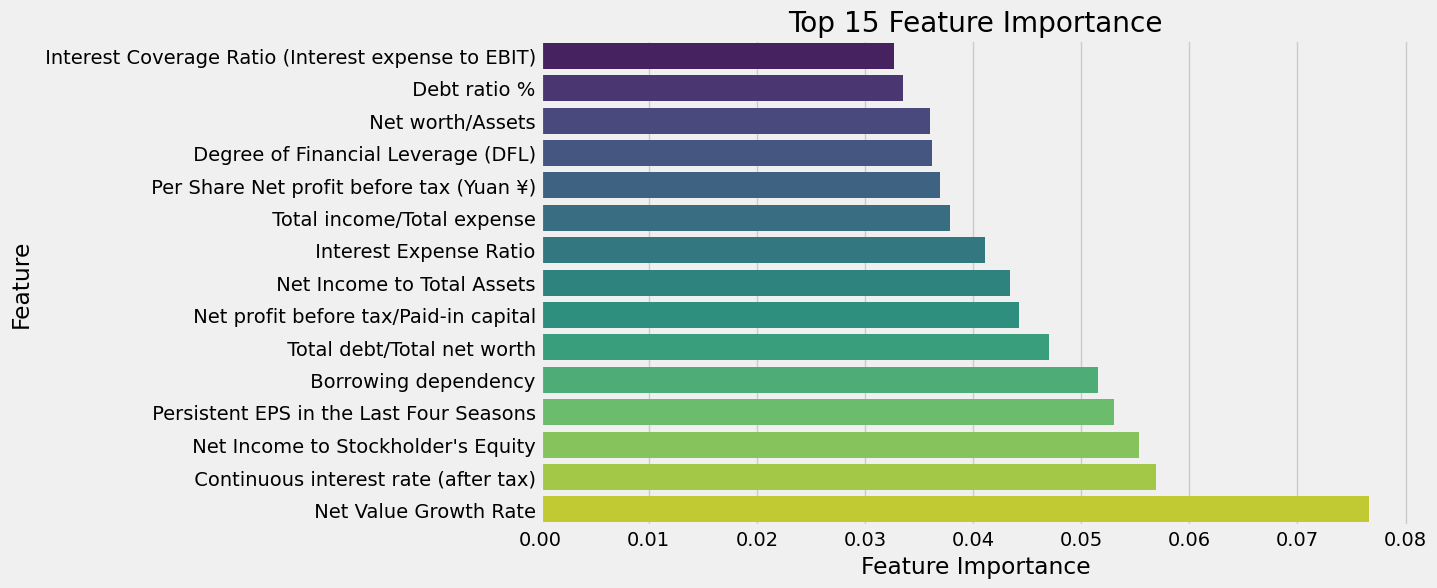

In [ ]:
# Define hyperparameters and their possible values for Grid Search CV
top_n_req = 15

# X, y = data.drop(["Bankrupt?"], axis=1), data["Bankrupt?"]
rf_param = {
    'n_estimators' : [100, 150, 200, 250, 300],  # 5
    'criterion': ['gini', 'entropy'],  # 2
    'max_depth': [5, 10, 15, 20, 25, 30, 35],  # 7
    'min_samples_split': [2, 5, 10],   # 3
    'max_features': ['sqrt', 'log2']   # 2
}
# Total 300 models with cv = 5 thus 1500 fits in 3.0 hours.
# Total 350 models with cv = 5 thus 2100 fits in 4.2 hours.

# Use RandomizedSearchCV for hyperparameter tuning with 5-fold cross-validation for decision tree classifier with F1 score
print("Starting the Training.")
rf_for_feature_selection = RandomForestClassifier(random_state = 42)
grid_search = GridSearchCV(estimator = rf_for_feature_selection, param_grid = rf_param, scoring = 'f1', verbose = 1)
grid_search.fit(X_train, Y_train)

# Best params
print("Best parameters based on Grid Search :")
print(grid_search.best_params_)
print()

# Best score from CV
print("\nBest parameters based on Grid Search :")
print("F1 Score : ", round(grid_search.best_score_, 2))
print()


# Get best decision tree model
best_rf_model = grid_search.best_estimator_

# Extract feature importances from the trained decision tree classifier
feature_importances = best_rf_model.feature_importances_
feature_names = best_rf_model.feature_names_in_

# Get the indices of the top n features
top_n_indices = np.argsort(feature_importances)[-top_n_req:]

# Create a DataFrame for easier plotting with seaborn
feature_importance_rf = pd.DataFrame({'Feature': [feature_names[i] for i in top_n_indices],
                                      'Importance': feature_importances[top_n_indices]})

# Plot the top 10 features using seaborn
mp.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, palette='viridis')
mp.xlabel("Feature Importance")
mp.title("Top "+str(top_n_req)+" Feature Importance")
mp.show()

## Feature Importances - DecisionTreeClassifier
* We will create a DecisionTreeClassifier for understanding which of the features have the highest importance as compared to others.
* These top 15 important features will be used with above selected features for model building.

Starting the Training.
Fitting 5 folds for each of 140 candidates, totalling 700 fits
Best parameters based on Grid Search :
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2}


Best parameters based on Grid Search :
F1 Score :  0.36



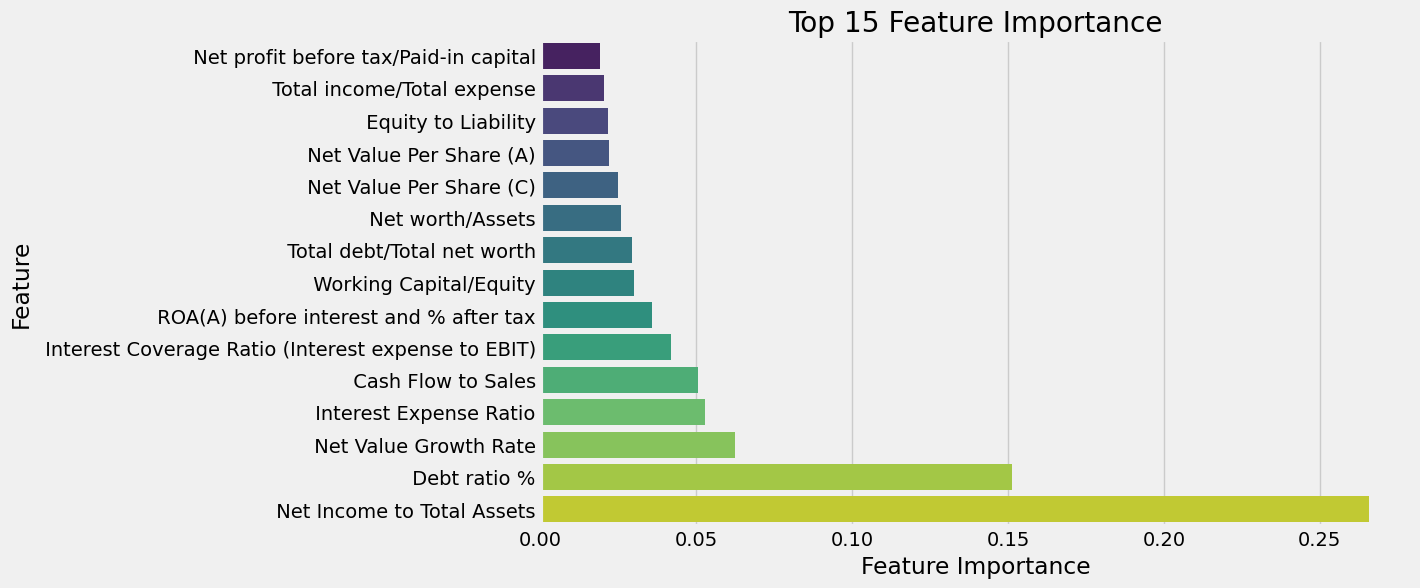

In [ ]:
# Define hyperparameters and their possible values for Grid Search CV
top_n_req = 15

# X, y = data.drop(["Bankrupt?"], axis=1), data["Bankrupt?"]
dt_param = {
    'criterion': ['gini', 'entropy'],          # 2
    'max_depth': [5, 10, 15, 20, 25, 30, 35],  # 7
    'min_samples_split': [2, 5, 10, 15, 20],   # 5
    'max_features': ['sqrt', 'log2']           # 2
}
# Total 140 models with cv = 5 thus 700 fits in 3.0 hours.

# Use RandomizedSearchCV for hyperparameter tuning with 5-fold cross-validation for decision tree classifier with F1 score
print("Starting the Training.")
dt_for_feature_selection = DecisionTreeClassifier(random_state = 42)
grid_search_dt = GridSearchCV(estimator = dt_for_feature_selection, param_grid = dt_param, scoring = 'f1', verbose = 1)
grid_search_dt.fit(X_train, Y_train)

# Best params
print("Best parameters based on Grid Search :")
print(grid_search_dt.best_params_)
print()

# Best score from CV
print("\nBest parameters based on Grid Search :")
print("F1 Score : ", round(grid_search_dt.best_score_, 2))
print()


# Get best decision tree model
best_dt_model = grid_search_dt.best_estimator_

# Extract feature importances from the trained decision tree classifier
feature_importances = best_dt_model.feature_importances_
feature_names = best_dt_model.feature_names_in_

# Get the indices of the top n features
top_n_indices = np.argsort(feature_importances)[-top_n_req:]

# Create a DataFrame for easier plotting with seaborn
feature_importance_df = pd.DataFrame({'Feature': [feature_names[i] for i in top_n_indices],
                                      'Importance': feature_importances[top_n_indices]})

# Plot the top 10 features using seaborn
mp.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
mp.xlabel("Feature Importance")
mp.title("Top "+str(top_n_req)+" Feature Importance")
mp.show()

In [ ]:

best_rf_model = load(open("best_rf_model.pkl", "rb"))


In [ ]:
from pickle import dump, load
with open('best_rf_model_on_X_train.pkl', 'wb') as files:
    dump(best_rf_model, files)

In [ ]:
# feature_importances = best_rf_model.feature_importances_
# feature_names = best_rf_model.feature_names_in_

# # Get the indices of the top n features
# top_n_indices = np.argsort(feature_importances)[-10:]

# # Create a DataFrame for easier plotting with seaborn
# feature_importance_rf = pd.DataFrame({'Feature': [feature_names[i] for i in top_n_indices],
#                                       'Importance': feature_importances[top_n_indices]})

# feature_importances = best_dt_model.feature_importances_
# feature_names = best_dt_model.feature_names_in_

# # Get the indices of the top n features
# top_n_indices = np.argsort(feature_importances)[-10:]

# # Create a DataFrame for easier plotting with seaborn
# feature_importance_df = pd.DataFrame({'Feature': [feature_names[i] for i in top_n_indices],
#                                       'Importance': feature_importances[top_n_indices]})


dt_ftr_list = list(feature_importance_df["Feature"].values)
rf_ftr_list = list(feature_importance_rf["Feature"].values)

print(dt_ftr_list)
print(rf_ftr_list)

[' Net worth/Assets', ' Total debt/Total net worth', ' Working Capital/Equity', ' ROA(A) before interest and % after tax', ' Interest Coverage Ratio (Interest expense to EBIT)', ' Cash Flow to Sales', ' Interest Expense Ratio', ' Net Value Growth Rate', ' Debt ratio %', ' Net Income to Total Assets']
[' Total income/Total expense', ' Interest Expense Ratio', ' Net Income to Total Assets', ' Net profit before tax/Paid-in capital', ' Total debt/Total net worth', ' Borrowing dependency', ' Persistent EPS in the Last Four Seasons', " Net Income to Stockholder's Equity", ' Continuous interest rate (after tax)', ' Net Value Growth Rate']


In [ ]:
final_columns = list(set(mi_selected_cols + selected_features_final + dt_ftr_list + rf_ftr_list))
print(len(final_columns))
final_columns

27


[' Total debt/Total net worth',
 ' Debt ratio %',
 ' Continuous interest rate (after tax)',
 ' Equity to Liability',
 ' Persistent EPS in the Last Four Seasons',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' Retained Earnings to Total Assets',
 ' Net Value Per Share (C)',
 ' ROA(A) before interest and % after tax',
 ' Net Income to Total Assets',
 ' Degree of Financial Leverage (DFL)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Cash Flow to Sales',
 ' Liability-Assets Flag',
 ' Interest Expense Ratio',
 ' Net Value Growth Rate',
 ' Liability to Equity',
 ' Total income/Total expense',
 ' ROA(C) before interest and depreciation before interest',
 ' Net profit before tax/Paid-in capital',
 ' Net worth/Assets',
 ' Working Capital/Equity',
 ' Borrowing dependency',
 " Net Income to Stockholder's Equity",
 ' ROA(B) before interest and depreciation after tax']

These are the final set of 27 columns is what we will use for model building.

In [ ]:
final_columns = [' Total debt/Total net worth',
 ' Debt ratio %',
 ' Continuous interest rate (after tax)',
 ' Equity to Liability',
 ' Persistent EPS in the Last Four Seasons',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' Retained Earnings to Total Assets',
 ' Net Value Per Share (C)',
 ' ROA(A) before interest and % after tax',
 ' Net Income to Total Assets',
 ' Degree of Financial Leverage (DFL)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Cash Flow to Sales',
 ' Liability-Assets Flag',
 ' Interest Expense Ratio',
 ' Net Value Growth Rate',
 ' Liability to Equity',
 ' Total income/Total expense',
 ' ROA(C) before interest and depreciation before interest',
 ' Net profit before tax/Paid-in capital',
 ' Net worth/Assets',
 ' Working Capital/Equity',
 ' Borrowing dependency',
 " Net Income to Stockholder's Equity",
 ' ROA(B) before interest and depreciation after tax']
print(len(final_columns))

27


In [ ]:
X_train_fc = X_train[final_columns]
X_test_fc = X_test[final_columns]
print(X_train_fc.shape)
print(X_test_fc.shape)
X_train_fc.head()

(1000, 27)
(251, 27)


Total debt/Total net worth  Debt ratio %  \
271                     0.003465      0.081174   
189                     0.001527      0.042205   
751                     0.004547      0.098165   
1169                    0.006197      0.119479   
1038                    0.008404      0.141790   

      Continuous interest rate (after tax)  Equity to Liability  \
271                               0.781741             0.047304   
189                               0.781527             0.090541   
751                               0.781626             0.038741   
1169                              0.781577             0.031310   
1038                              0.781593             0.025864   

      Persistent EPS in the Last Four Seasons  Net Value Per Share (B)  \
271                                  0.255082                 0.231722   
189                                  0.212631                 0.179638   
751                                  0.230027                 0.217564   
1169                                 0.215278                 0.178585   
1038                                 0.221802                 0.194935   

      Net Value Per Share (A)  \
271                  0.231722   
189                  0.179638   
751                  0.217564   
1169                 0.178585   
1038                 0.194935   

      Interest Coverage Ratio (Interest expense to EBIT)  \
271                                            0.565273    
189                                            0.565144    
751                                            0.565274    
1169                                           0.567434    
1038                                           0.565815    

      Retained Earnings to Total Assets  Net Value Per Share (C)  \
271                            0.952163                 0.231722   
189                            0.932289                 0.179638   
751                            0.962896                 0.217564   
1169                           0.936260                 0.178585   
1038                           0.937098                 0.194935   

      ROA(A) before interest and % after tax  Net Income to Total Assets  \
271                                 0.608482                    0.836720   
189                                 0.527202                    0.793888   
751                                 0.563236                    0.812359   
1169                                0.543393                    0.799942   
1038                                0.544756                    0.803336   

      Degree of Financial Leverage (DFL)  \
271                             0.026816   
189                             0.026788   
751                             0.026816   
1169                            0.027661   
1038                            0.026950   

      Per Share Net profit before tax (Yuan ¥)  Cash Flow to Sales  \
271                                   0.213226            0.671574   
189                                   0.168412            0.671530   
751                                   0.187090            0.671577   
1169                                  0.172554            0.671575   
1038                                  0.176169            0.671574   

      Liability-Assets Flag  Interest Expense Ratio  Net Value Growth Rate  \
271                     0.0                0.630712               0.000509   
189                     0.0                0.630592               0.000447   
751                     0.0                0.630712               0.000475   
1169                    0.0                0.632762               0.000461   
1038                    0.0                0.631156               0.000435   

      Liability to Equity  Total income/Total expense  \
271              0.277292                    0.002648   
189              0.275887                    0.002212   
751              0.278077                    0.002394   
1169             0.279274                    0.0

## Hypothesis Testing

In [ ]:
def t_test_func(col, targ, thresh):
    set0 = data[data[targ] == 0][col]
    set1 = data[data[targ] == 1][col]
    # print("Lengths:- ", len(set0), len(set1))
    statistic, pval = ttest_ind(set0, set1, equal_var=True)
    if pval < thresh:
        print(f"{col} has significant impact on {targ}")
        # pass
    else:
        print(f"{col} has NO significant impact on {targ}")
        # pass
    print()

In [2]:
targ = "Bankrupt?"
thresh = 0.05

for col in X_train_fc.columns:
    t_test_func(col, targ, thresh)



Total debt/Total net worth has NO significant impact on Bankrupt?

 Debt ratio % has significant impact on Bankrupt?

 Continuous interest rate (after tax) has NO significant impact on Bankrupt?

 Equity to Liability has significant impact on Bankrupt?

 Persistent EPS in the Last Four Seasons has significant impact on Bankrupt?

 Net Value Per Share (B) has significant impact on Bankrupt?

 Net Value Per Share (A) has significant impact on Bankrupt?

 Interest Coverage Ratio (Interest expense to EBIT) has NO significant impact on Bankrupt?

 Retained Earnings to Total Assets has significant impact on Bankrupt?

 Net Value Per Share (C) has significant impact on Bankrupt?

 ROA(A) before interest and % after tax has significant impact on Bankrupt?

 Net Income to Total Assets has significant impact on Bankrupt?

 Degree of Financial Leverage (DFL) has NO significant impact on Bankrupt?

 Per Share Net profit before tax (Yuan ¥) has significant impact on Bankrupt?

 Cash Flow to Sales 

<Figure size 2700x2700 with 0 Axes>

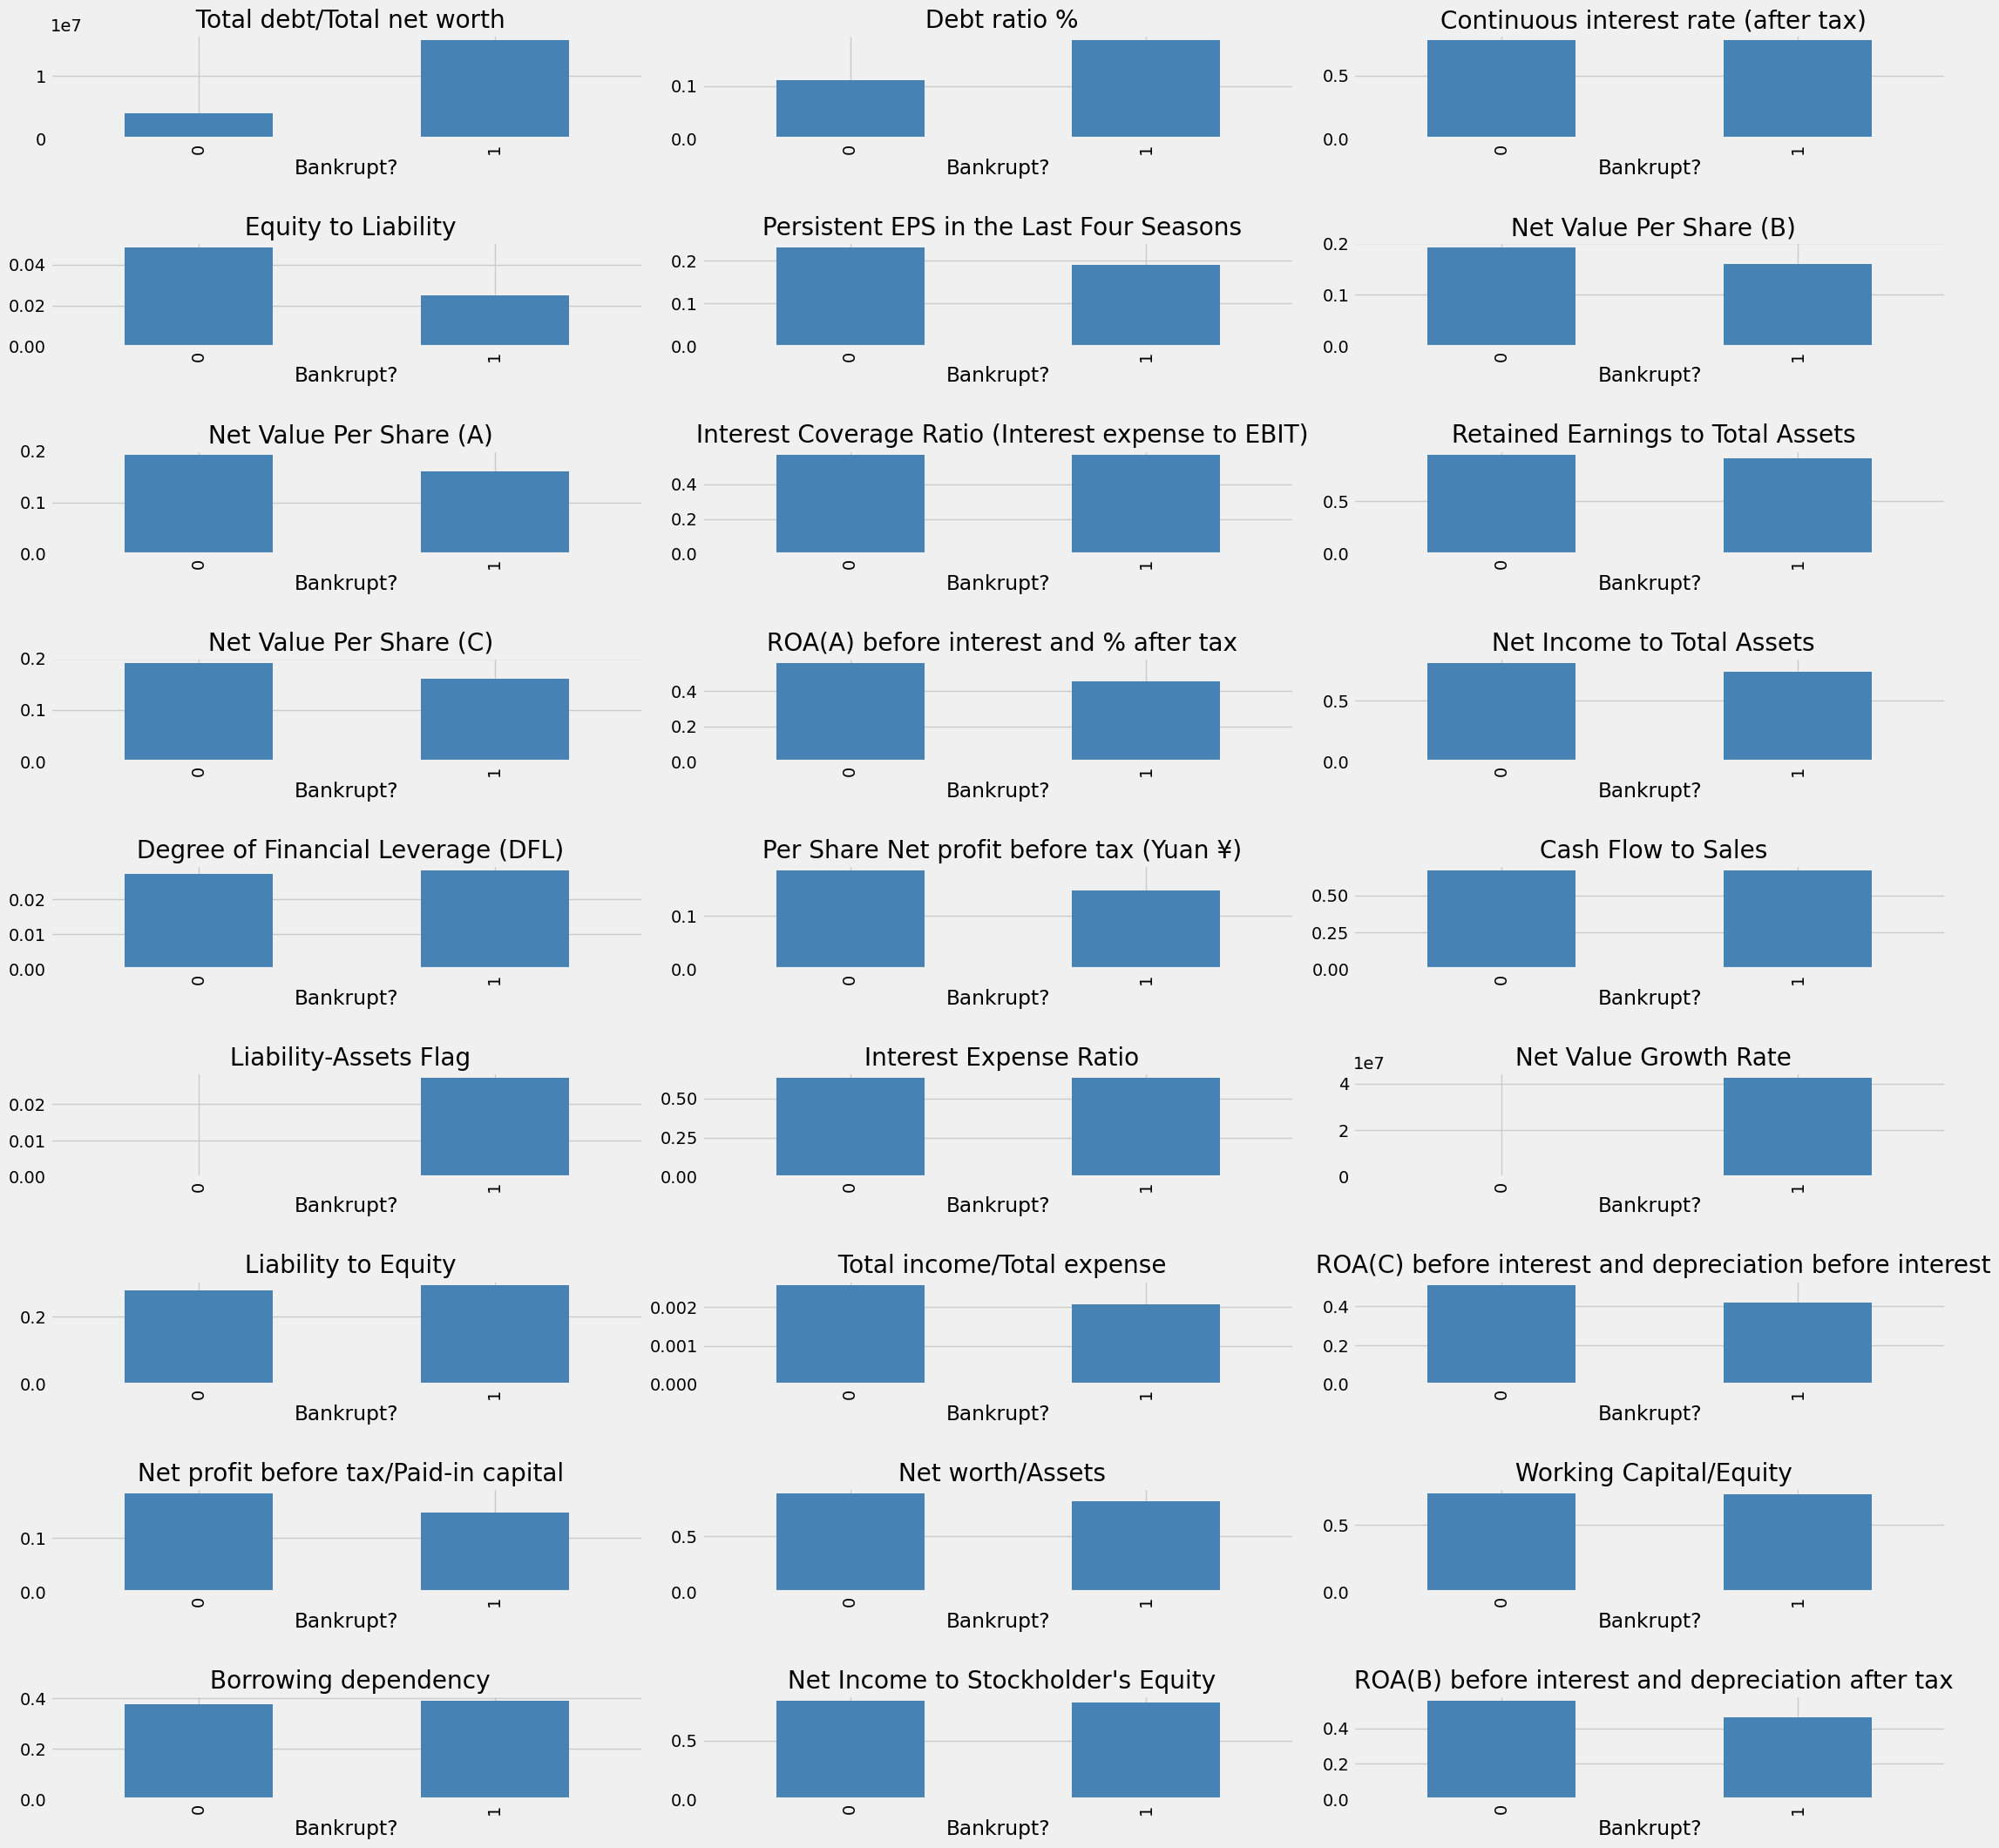

In [ ]:
mp.figure(figsize = (27, 27))
fig, axs = mp.subplots(9, 3)
axs = axs.flatten()
i = 0
fig.tight_layout()
fig.subplots_adjust(hspace=1, wspace=0.1)

for col in X_train_fc.columns:
    data.groupby("Bankrupt?").mean()[col].plot(kind="bar", title = col, ax = axs[i], color="steelblue", figsize = (25, 25))
    axs[i].set_xlabel("Bankrupt?")
    # axs[i].set_ylabel(col)
    i += 1

There seems to be some significant difference between the values of the features for Bankrupt and Non-Bankrupt companies for a lot of features. These can be used for model building.

Although for some other features the difference might not be very sharp but it is still there.

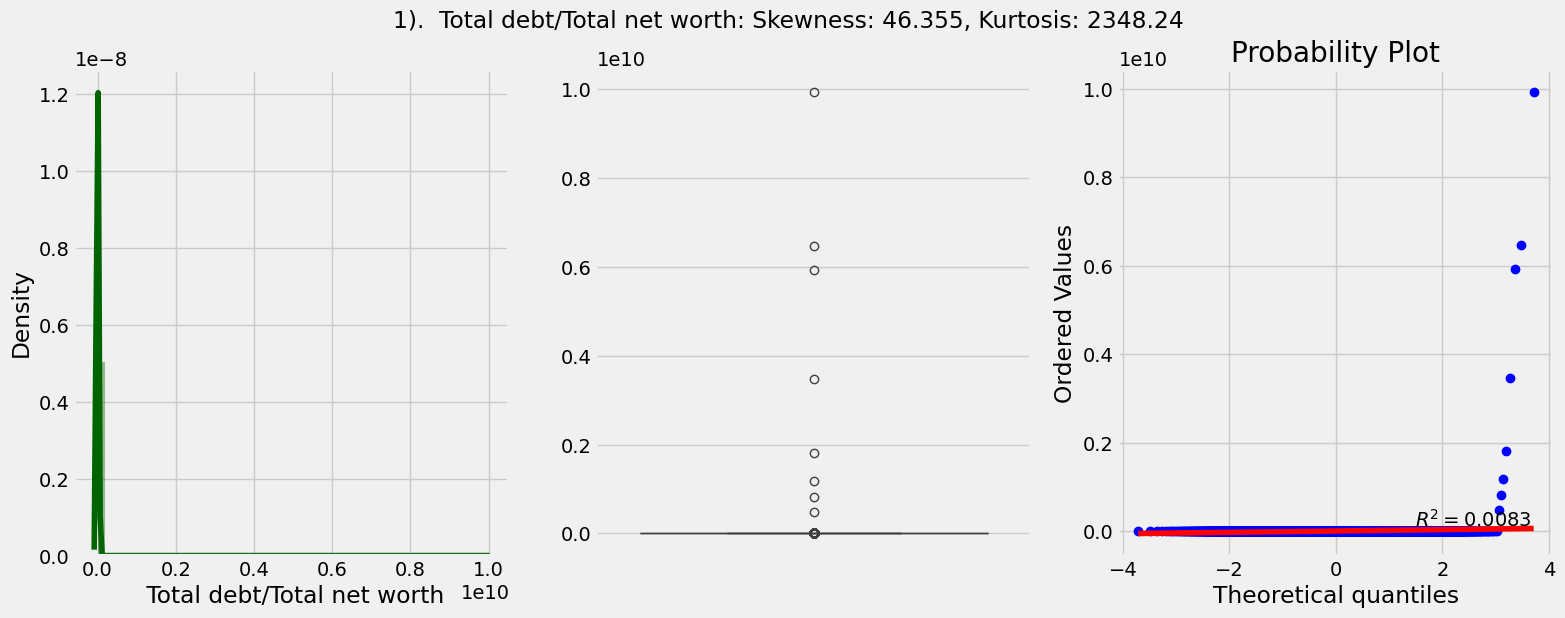

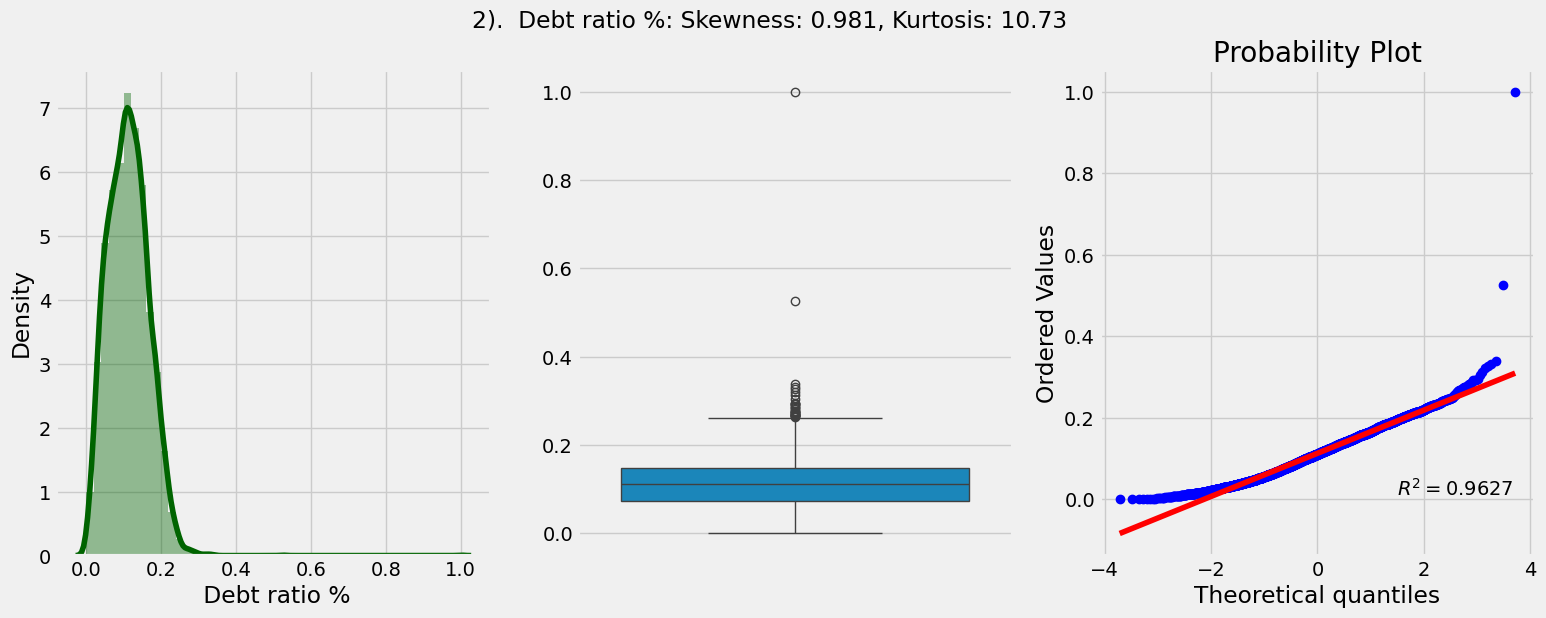

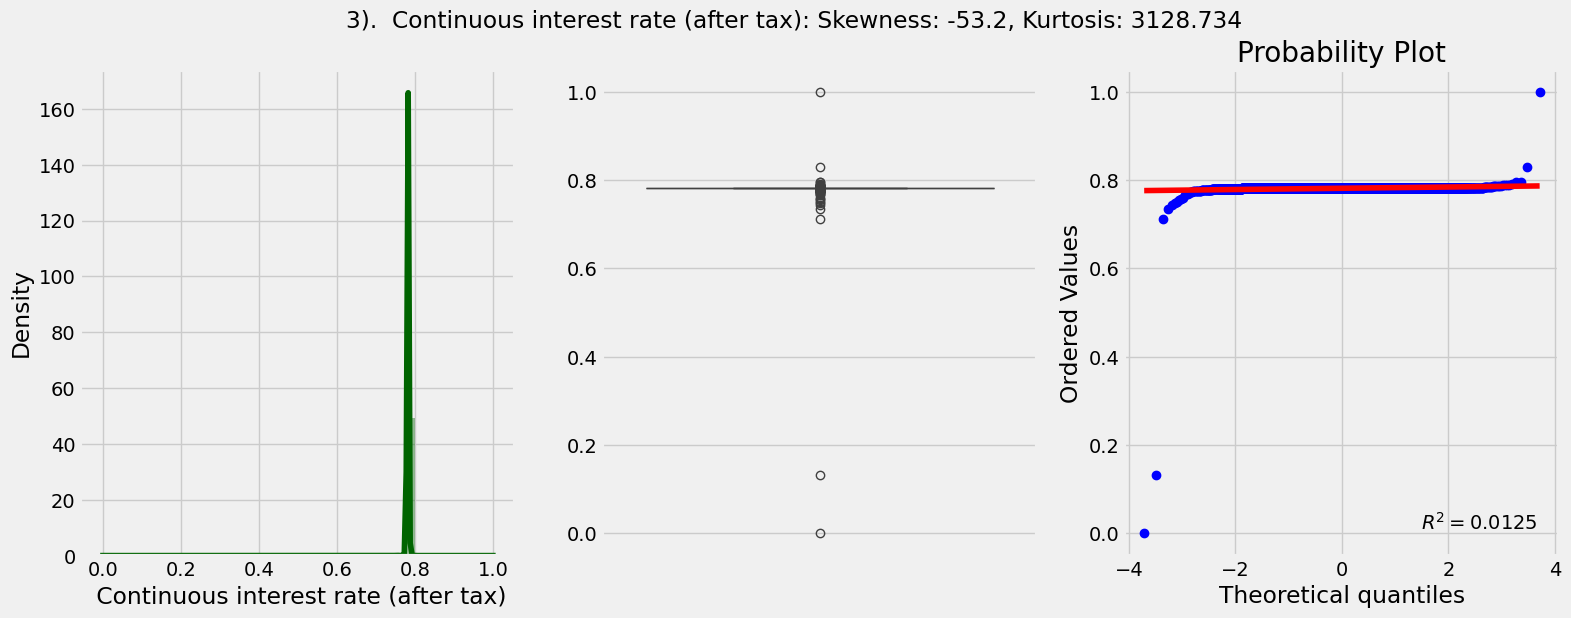

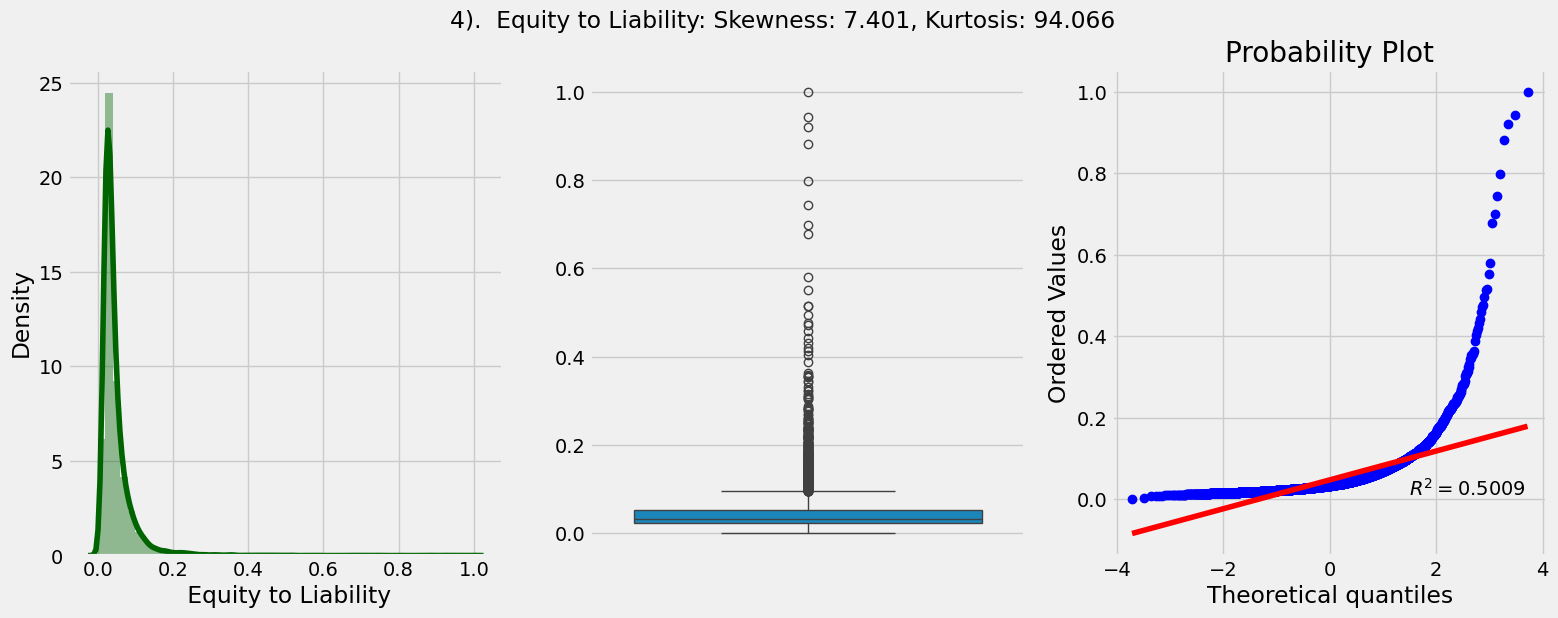

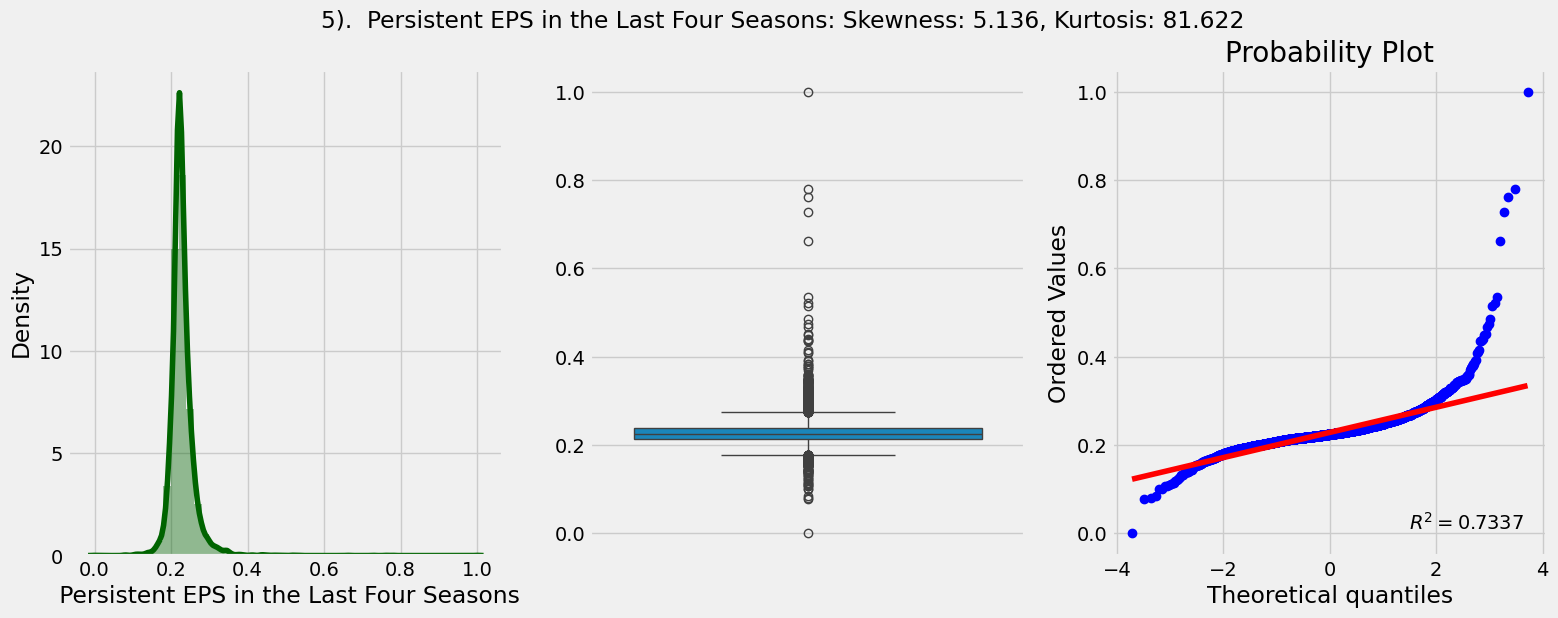

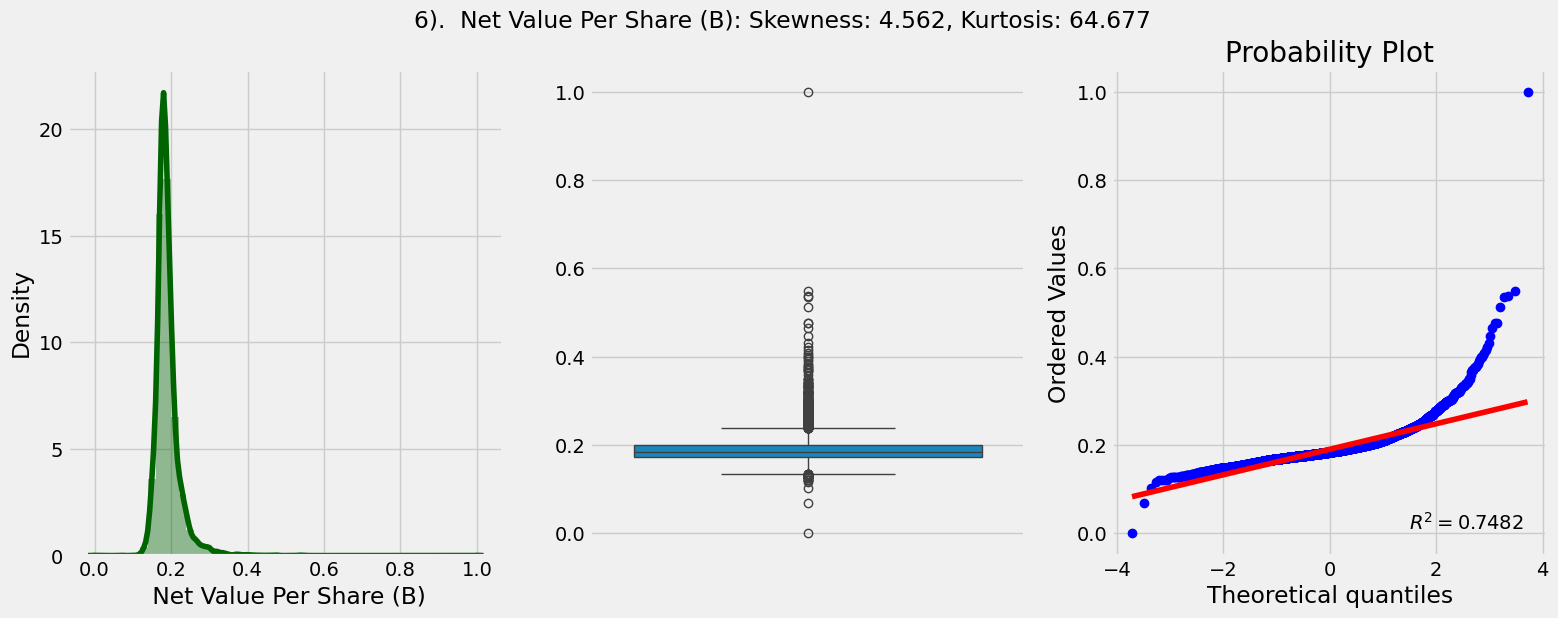

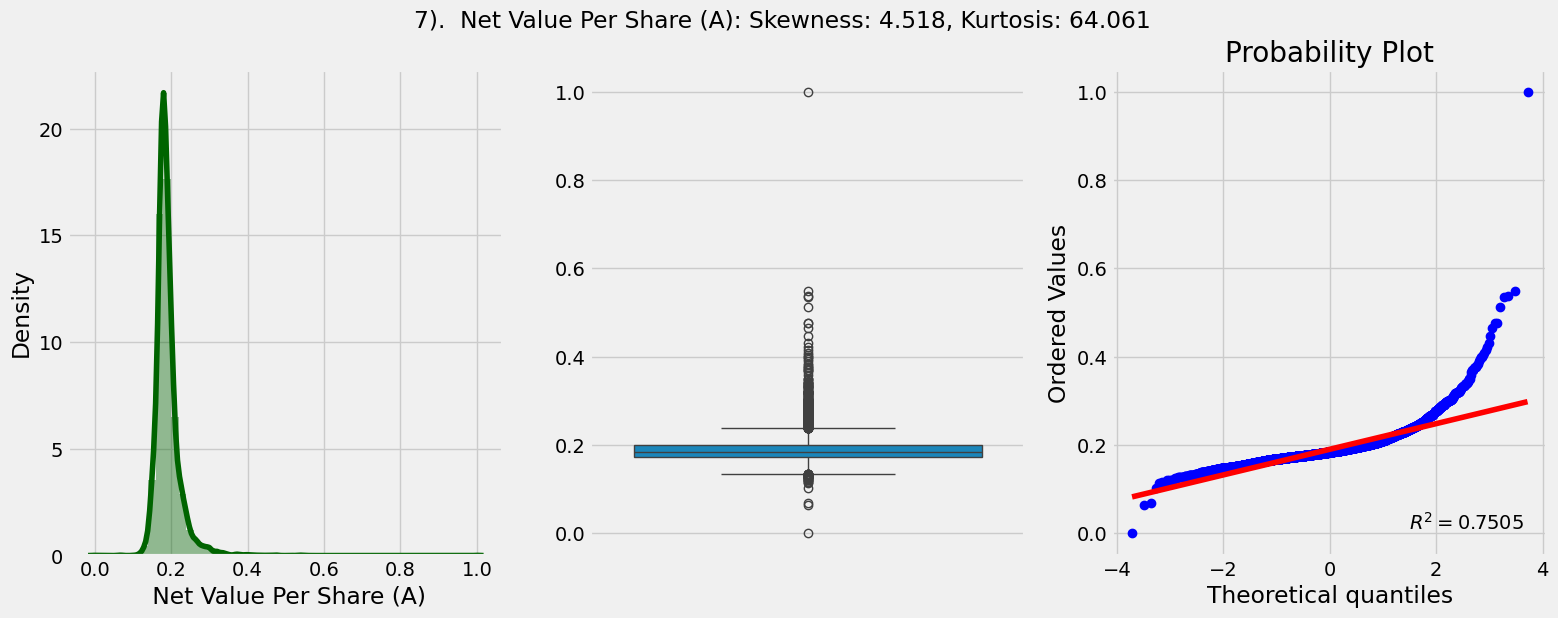

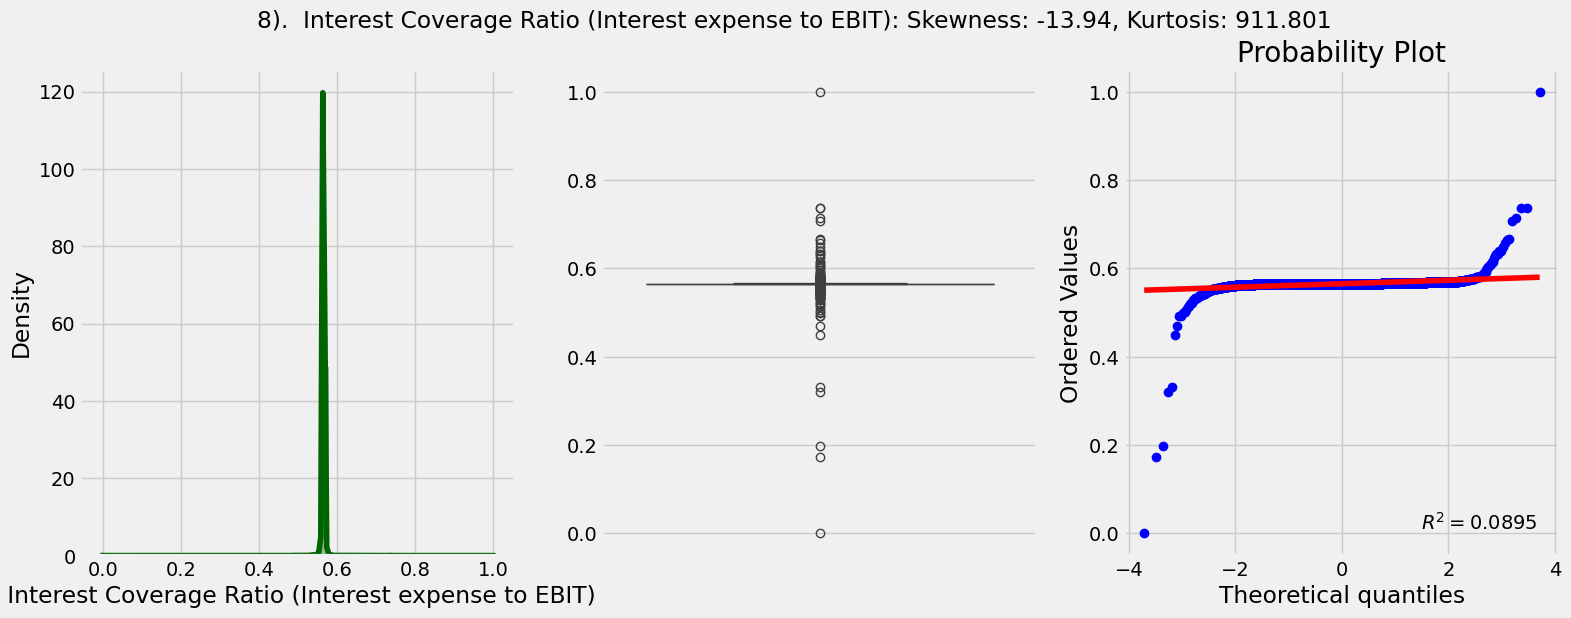

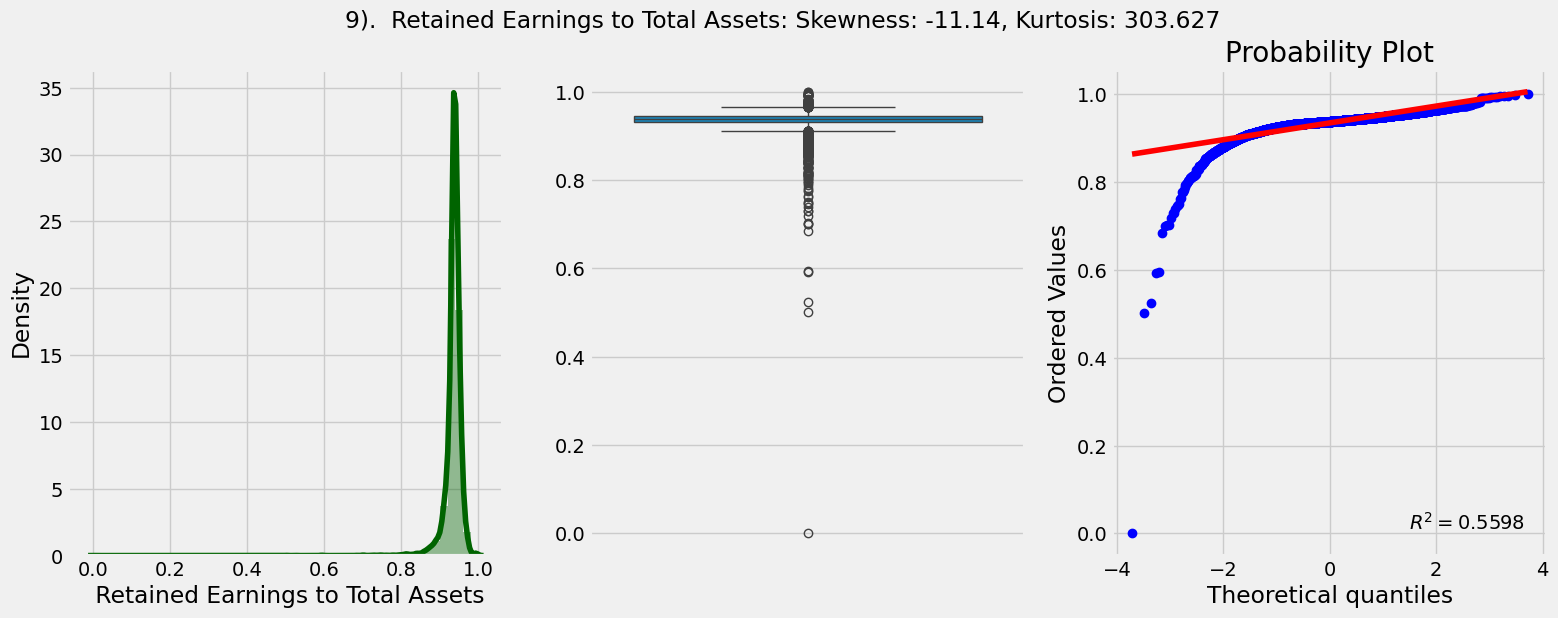

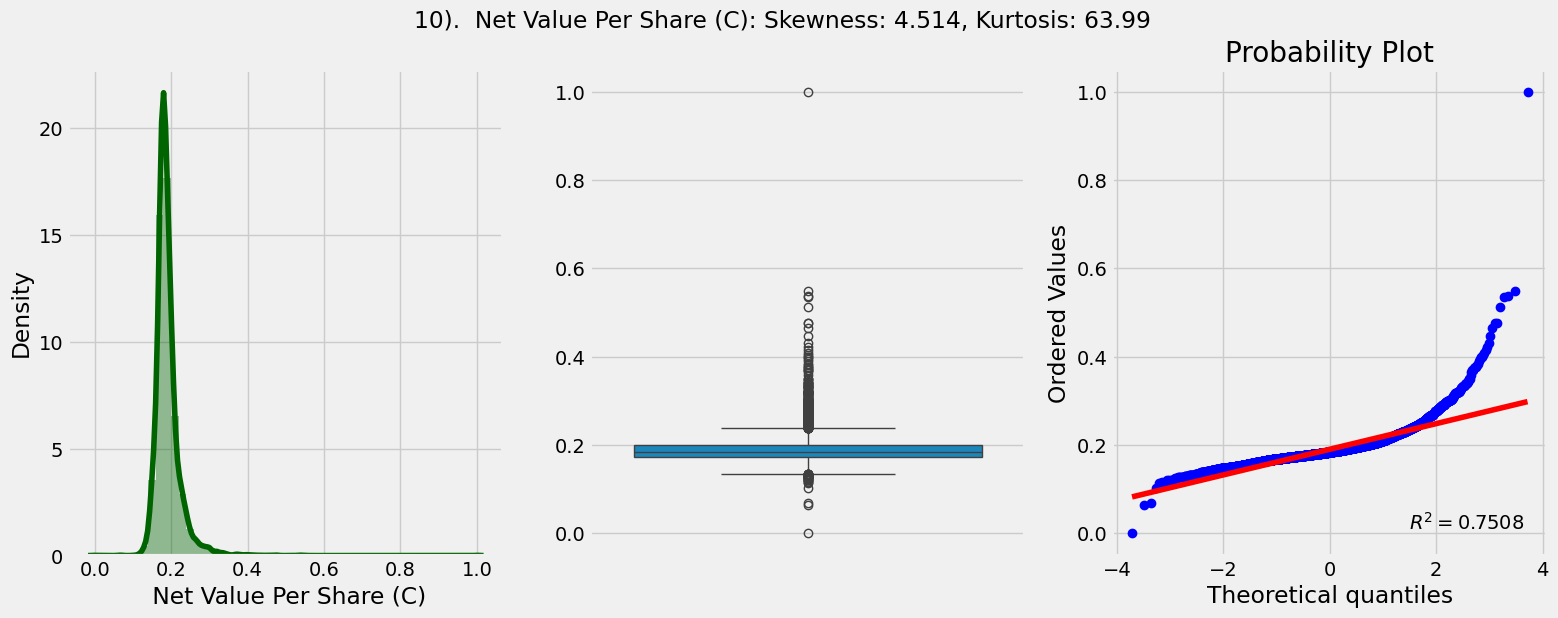

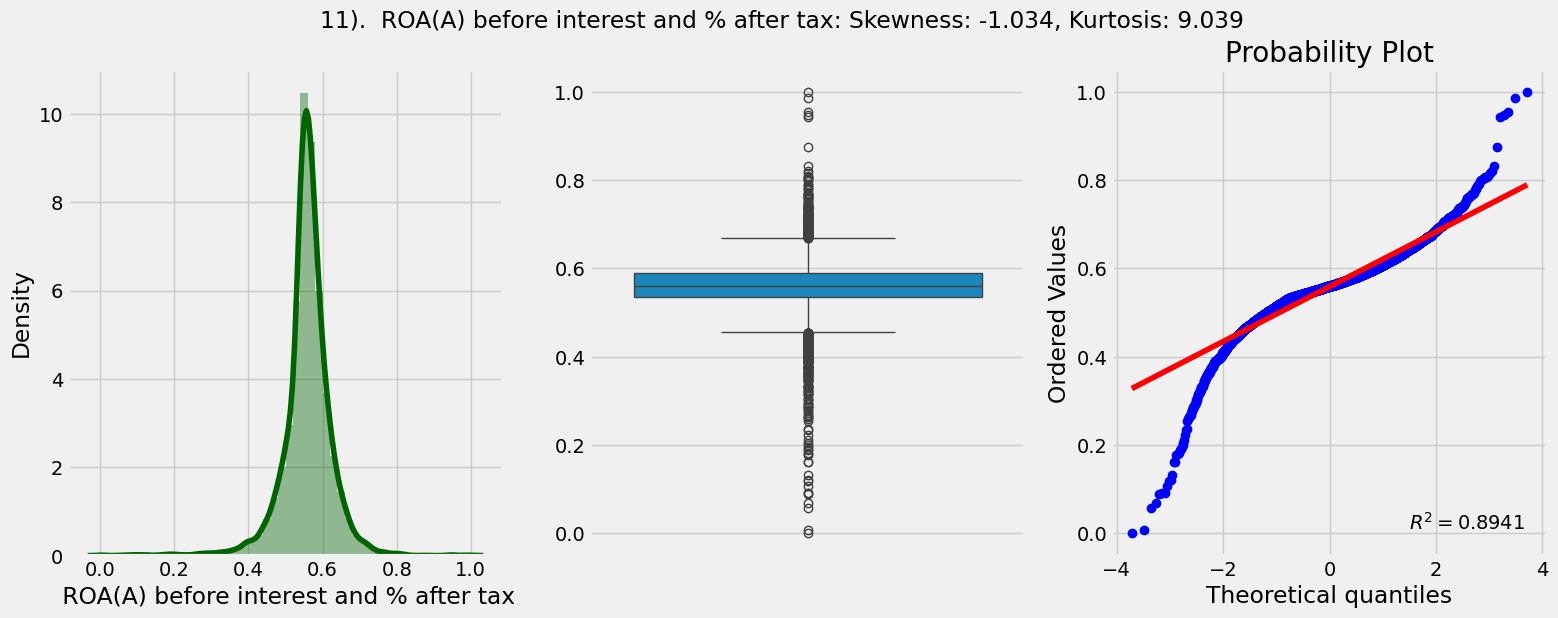

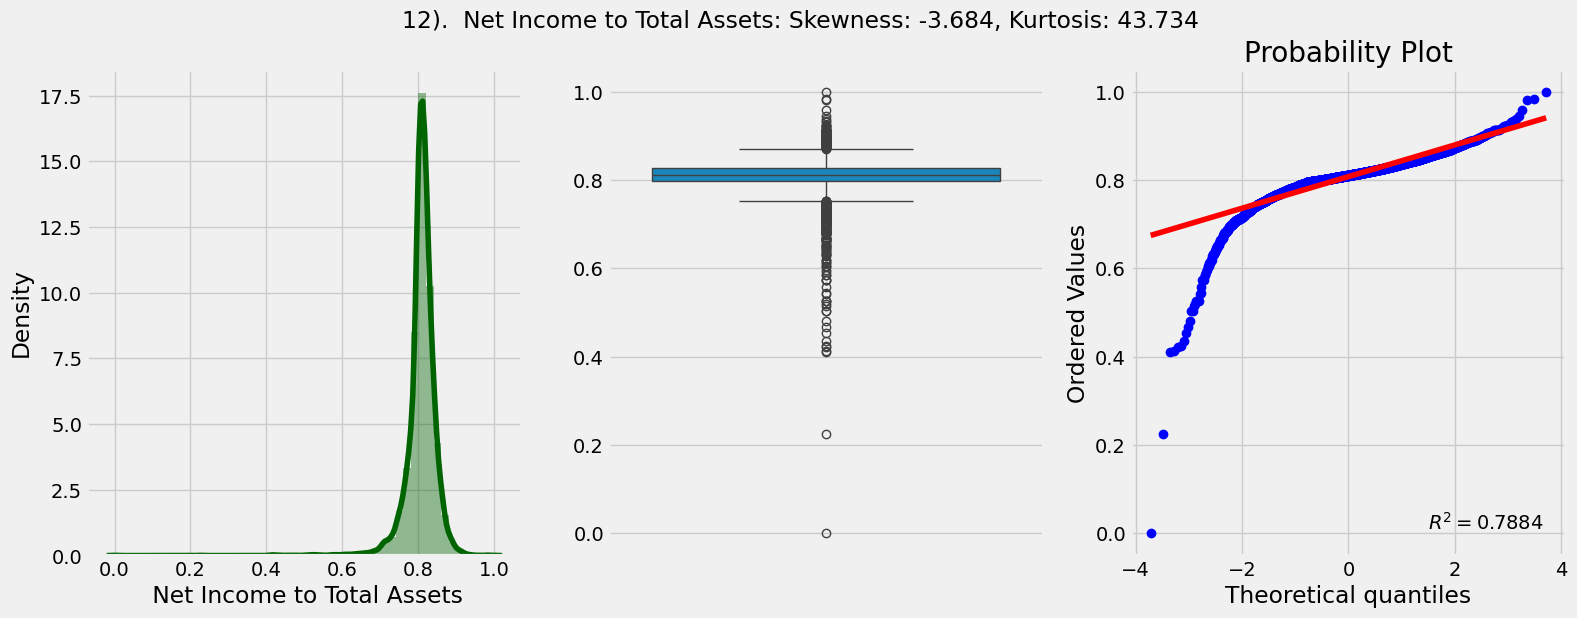

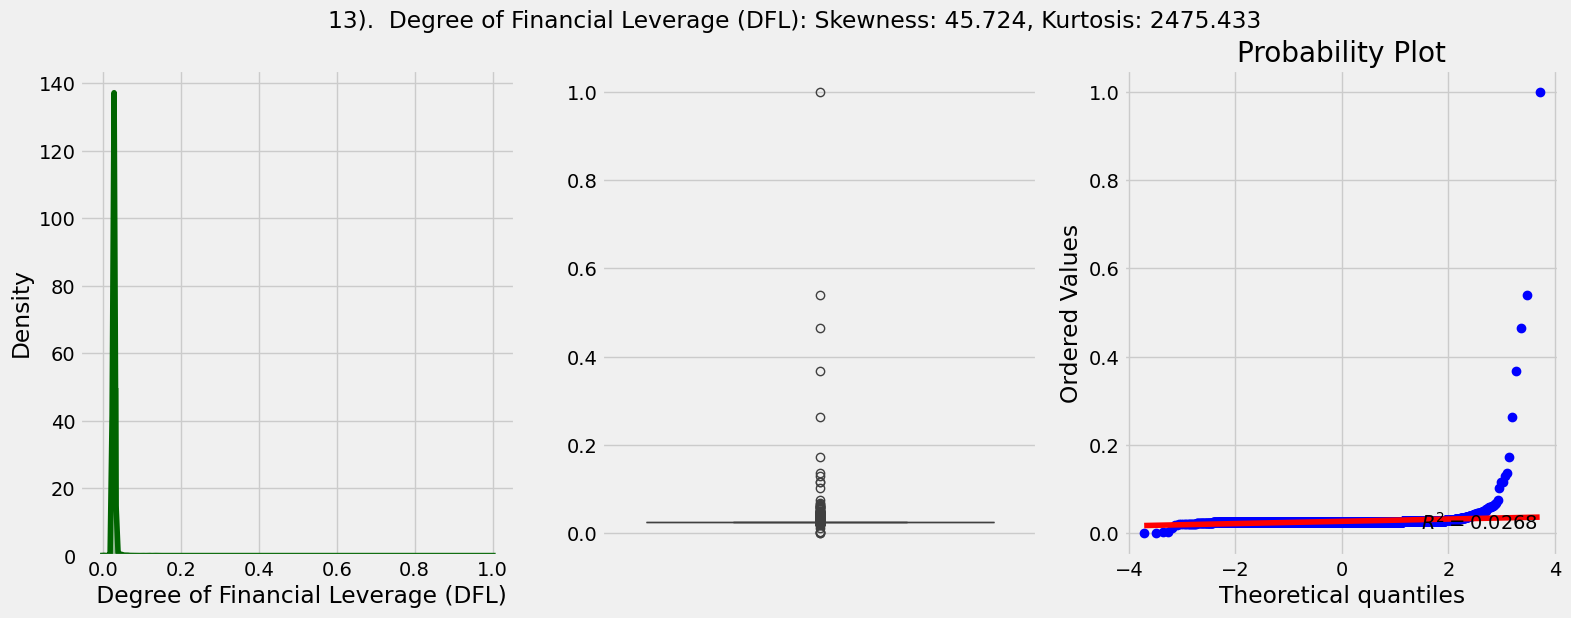

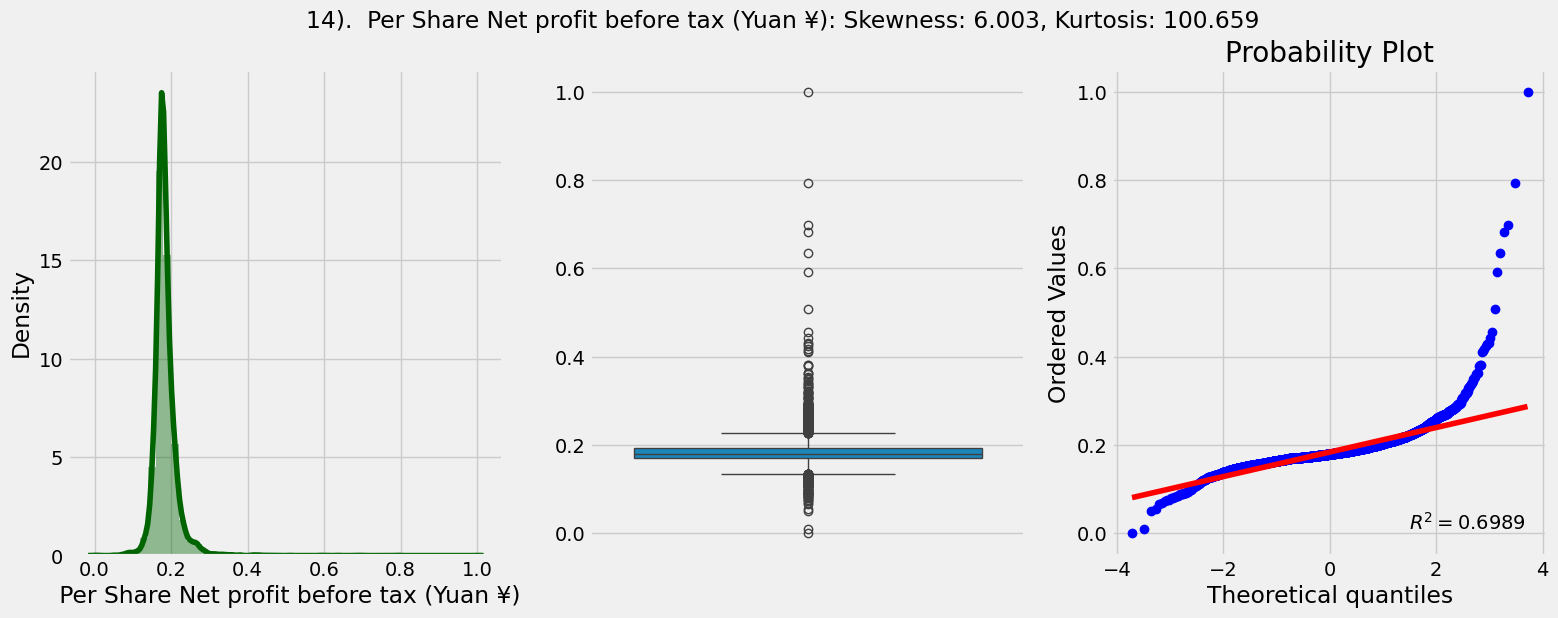

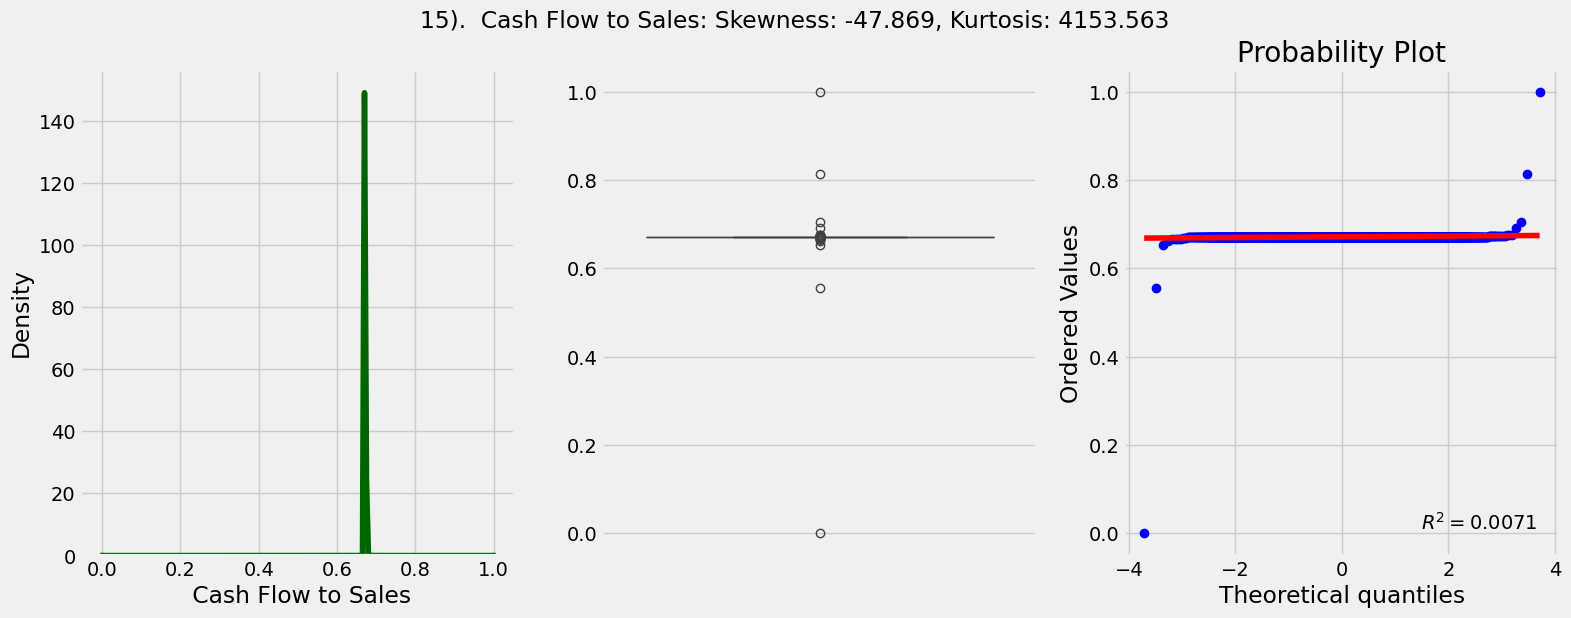

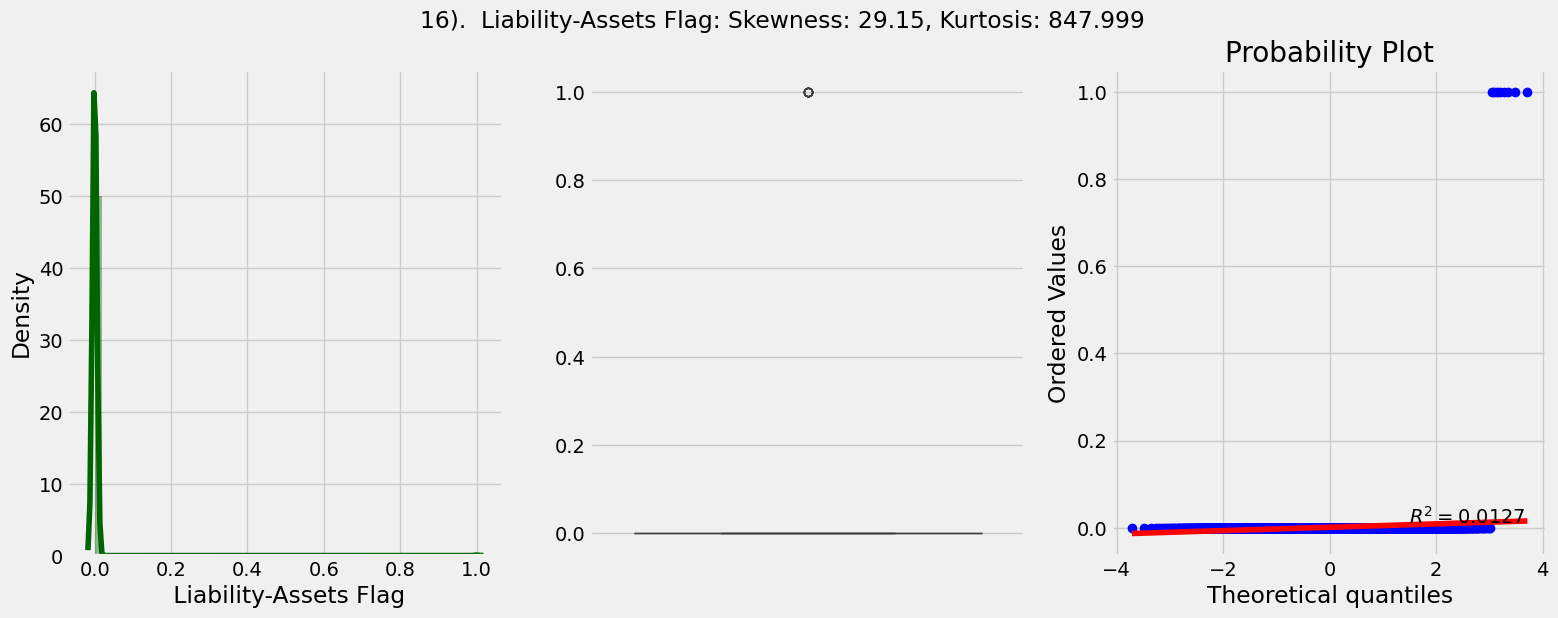

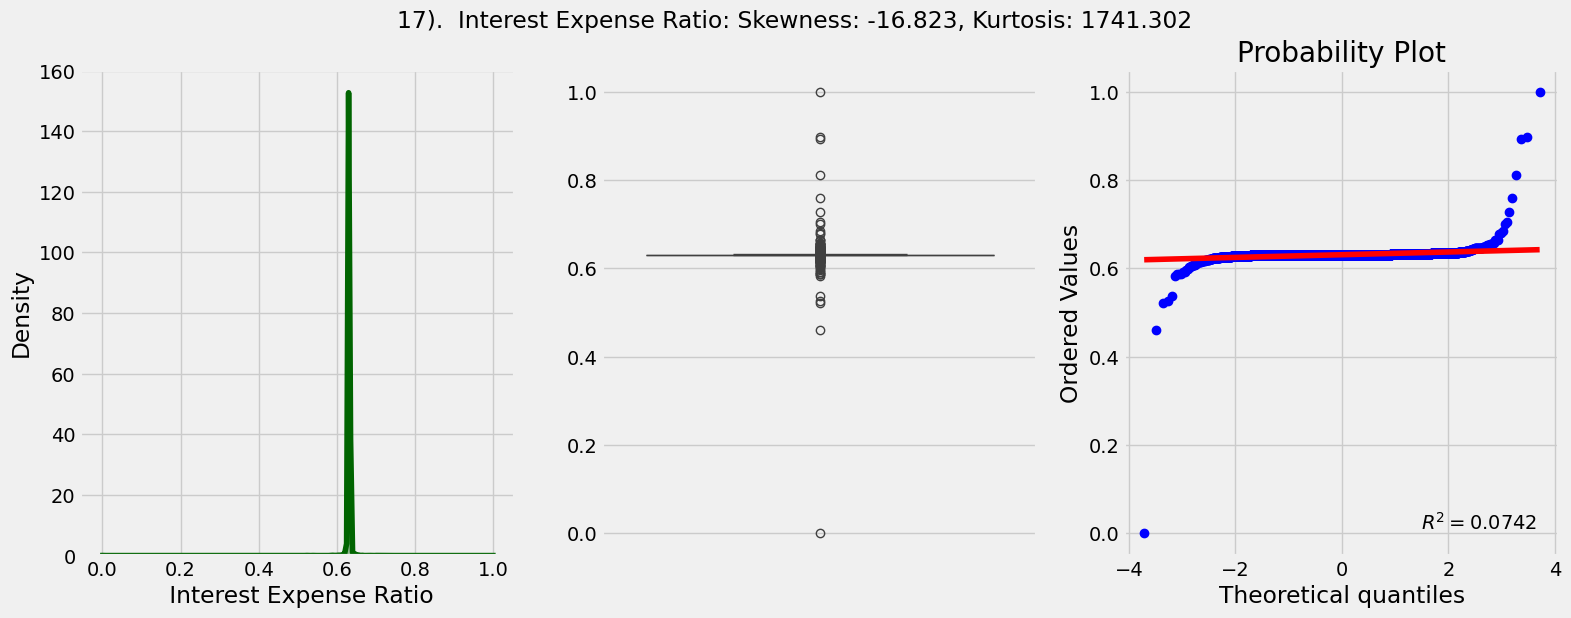

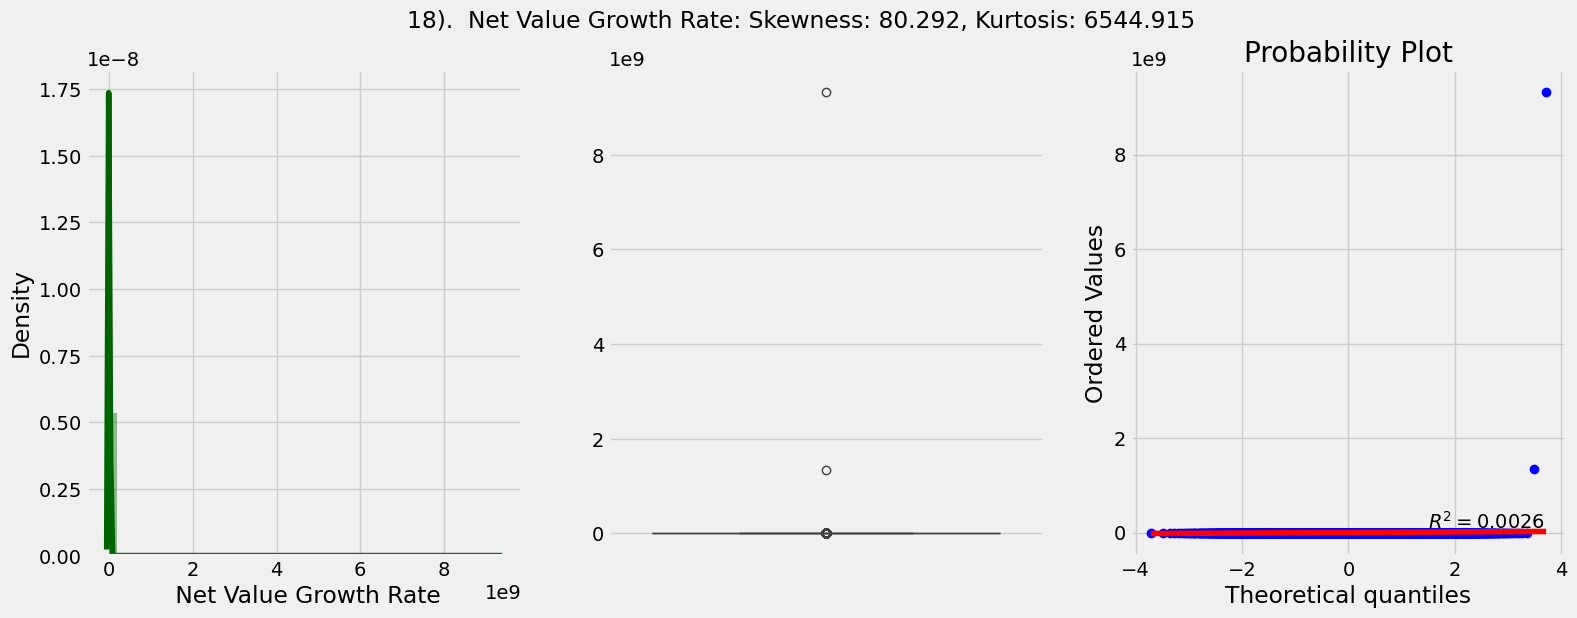

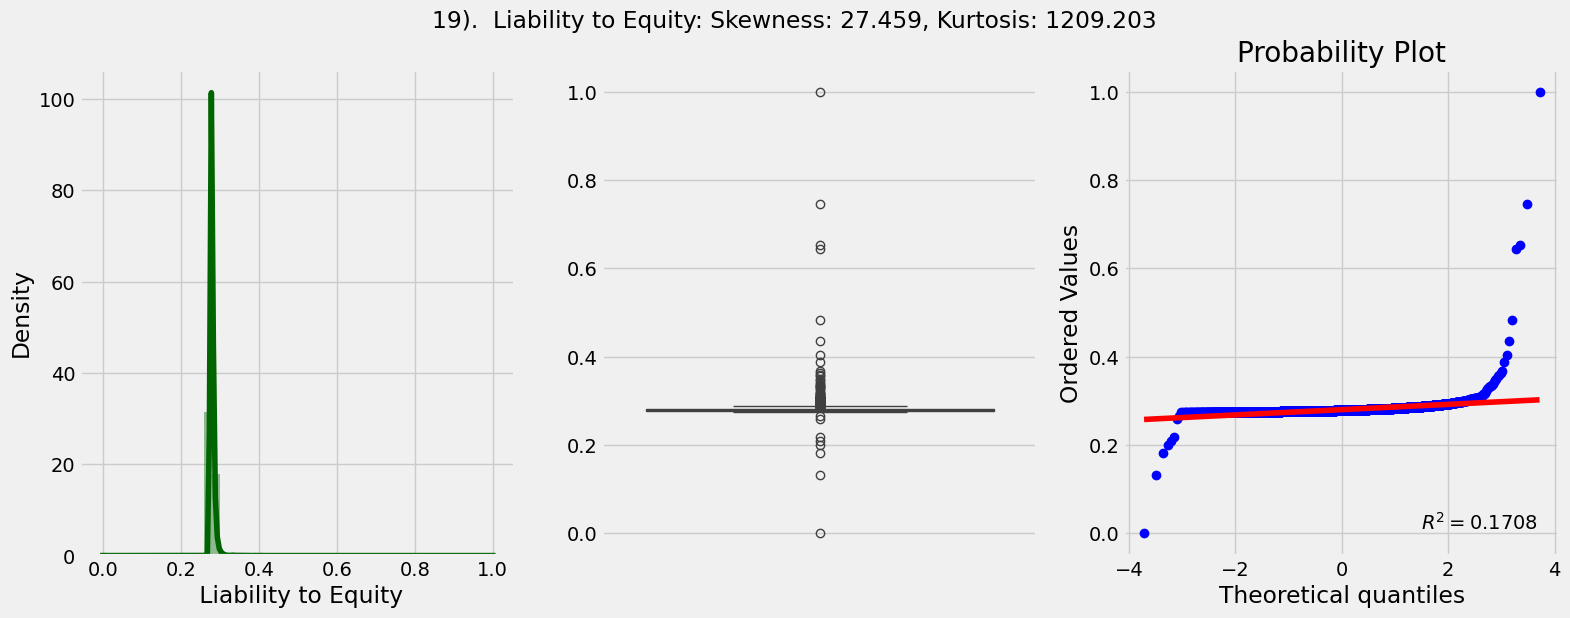

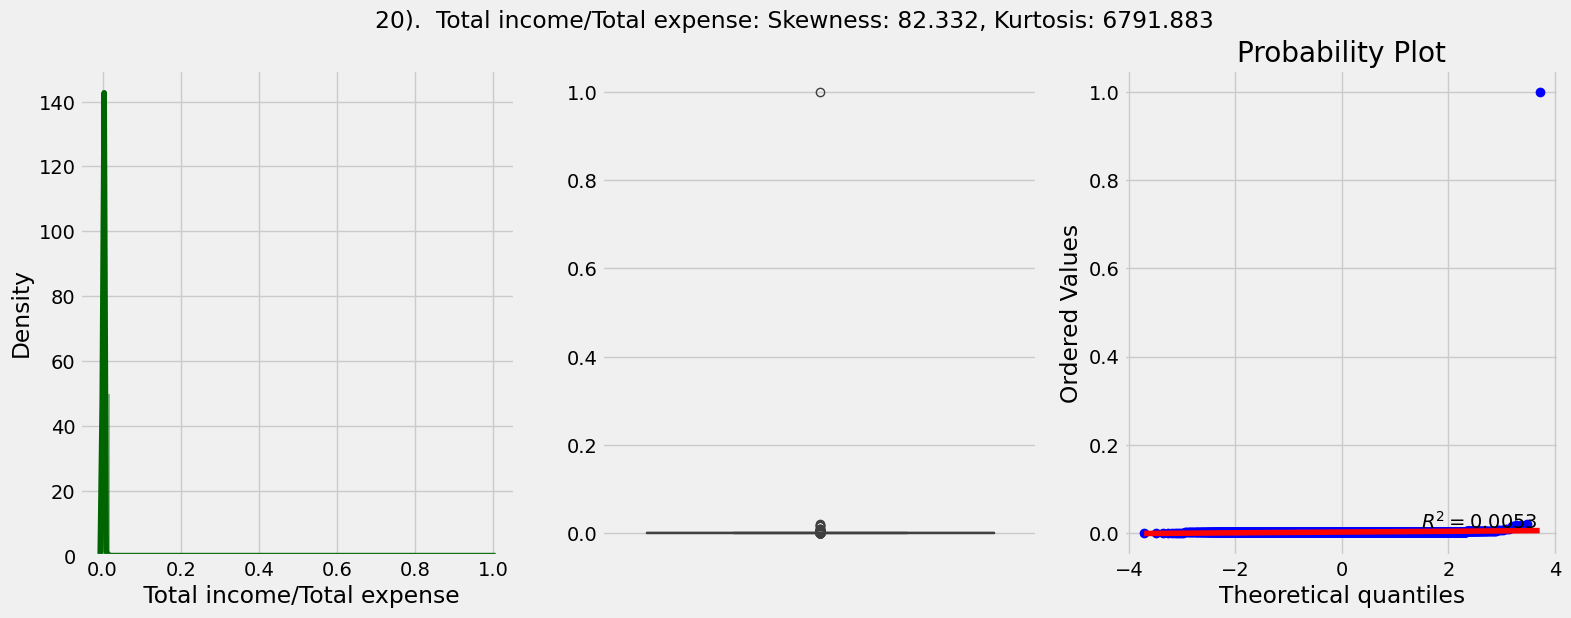

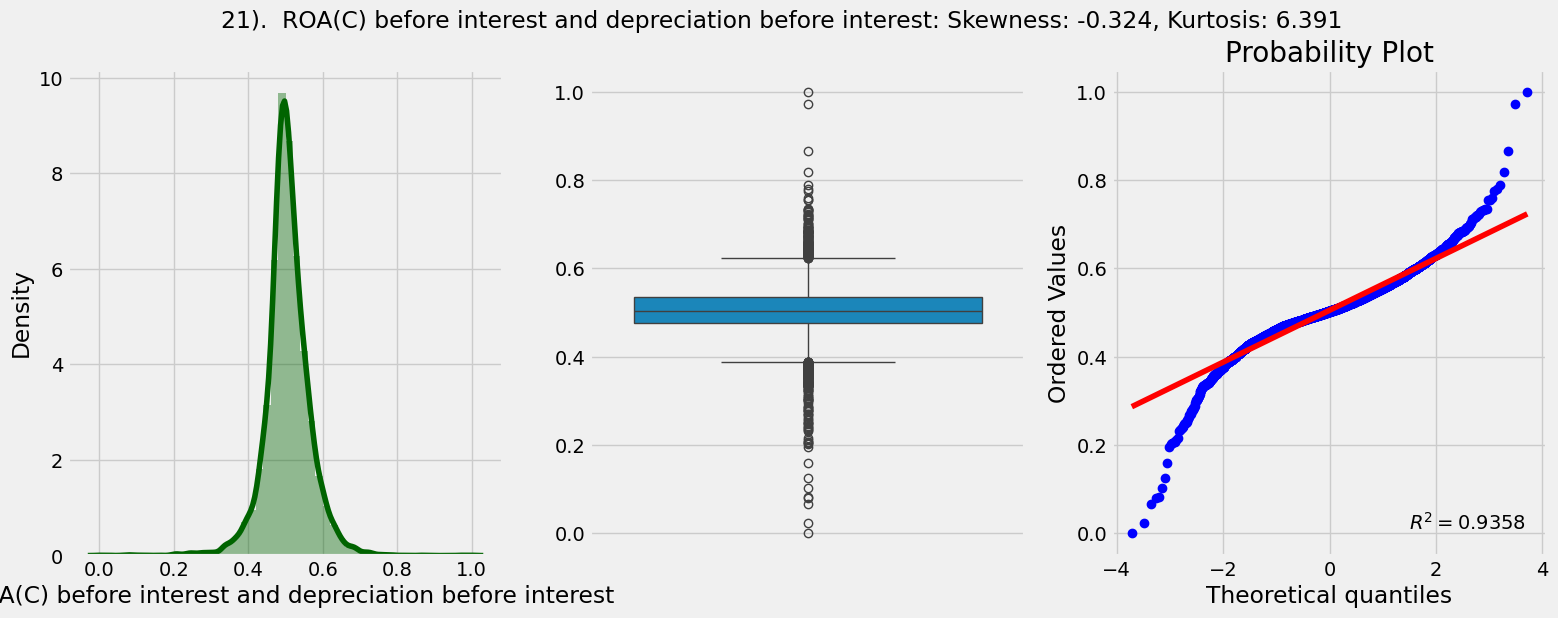

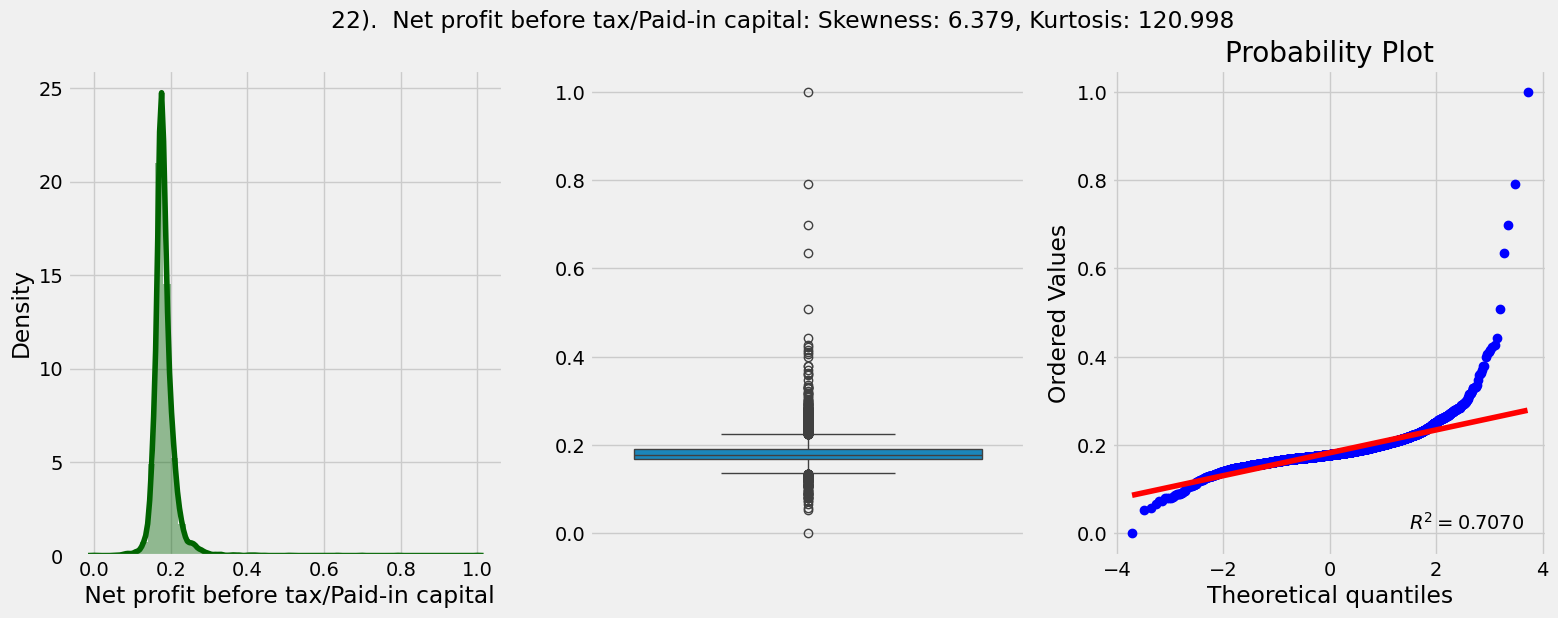

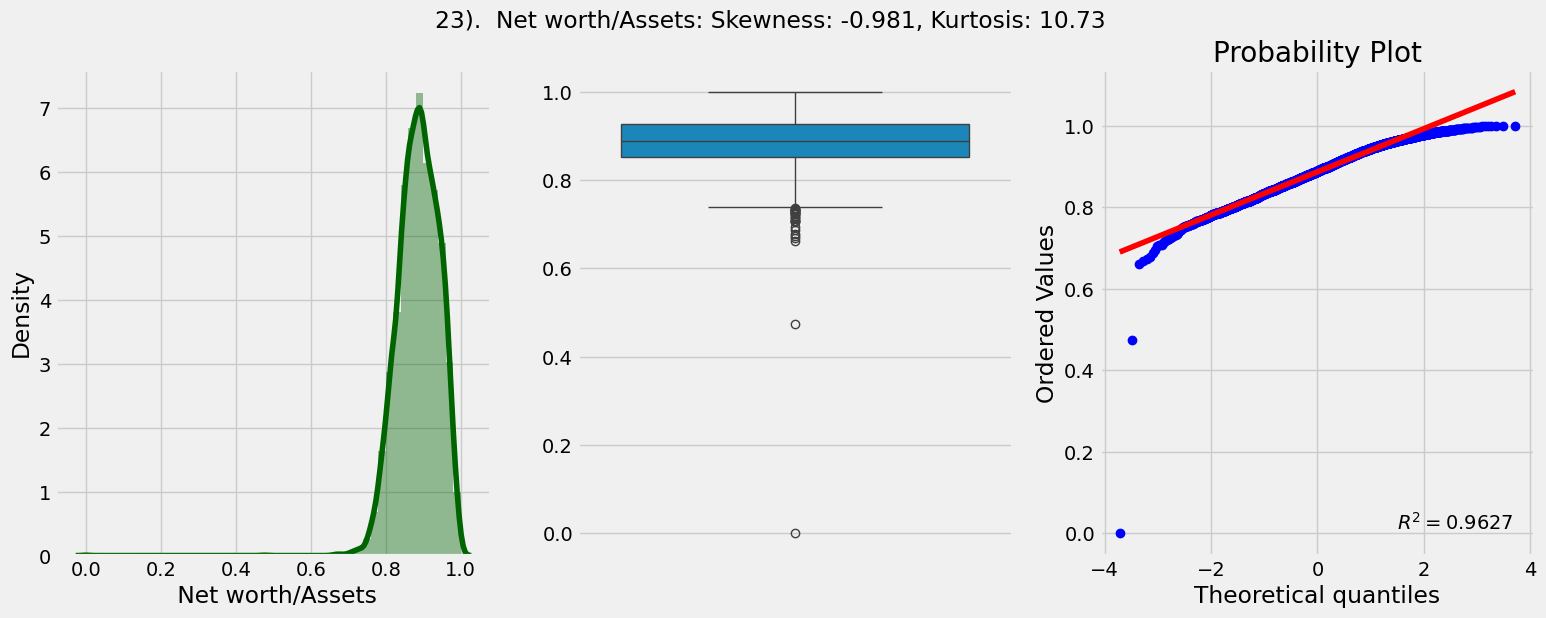

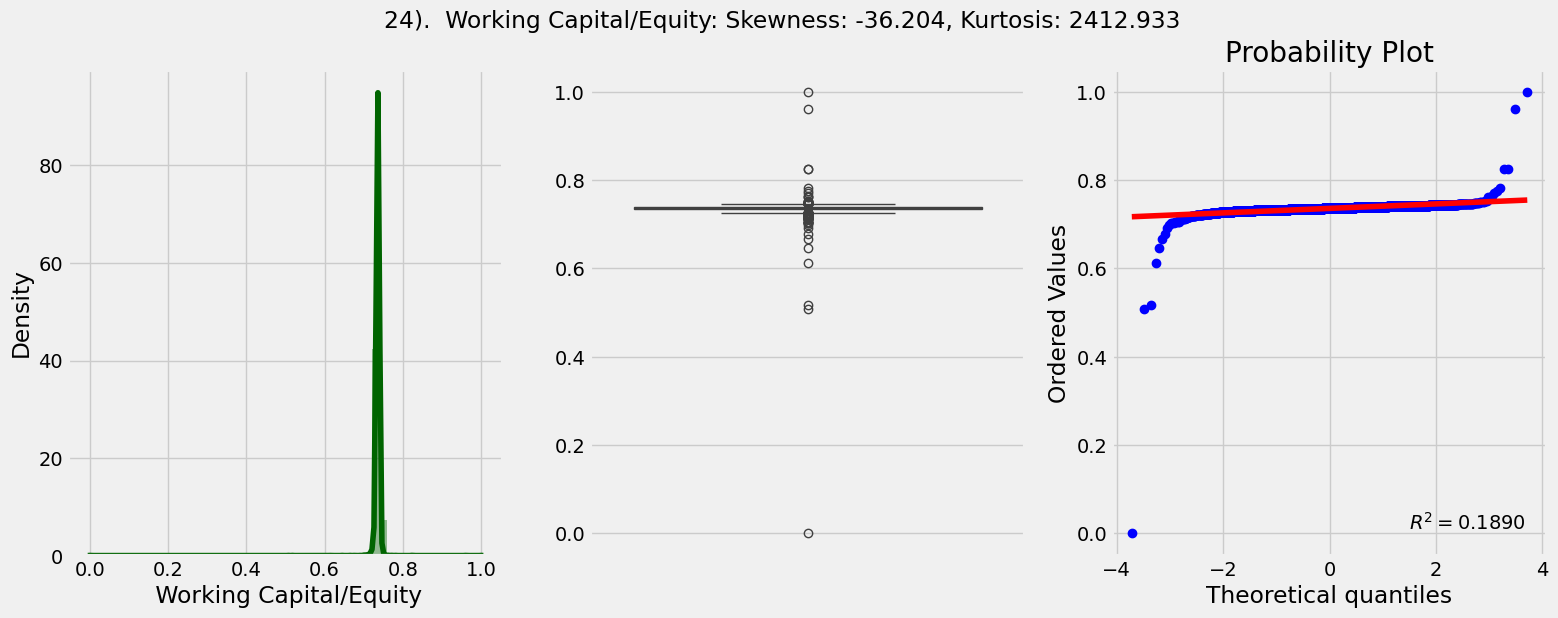

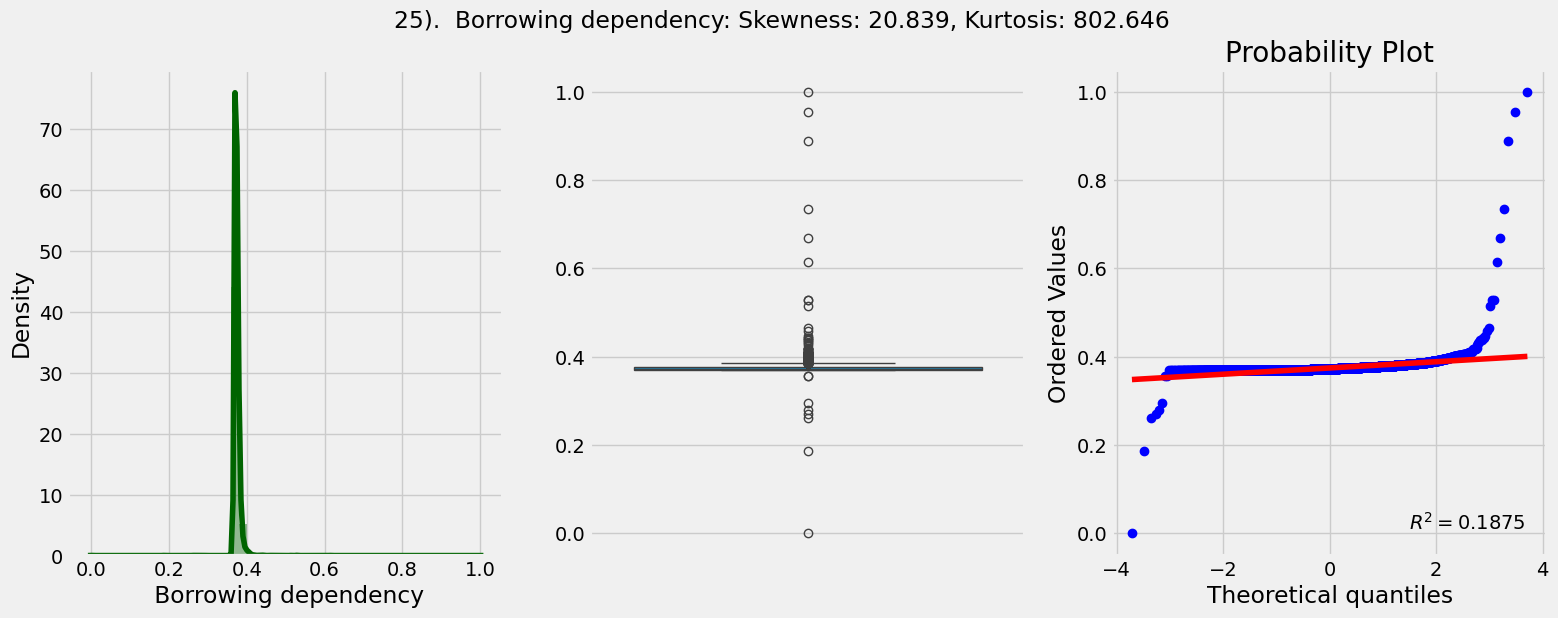

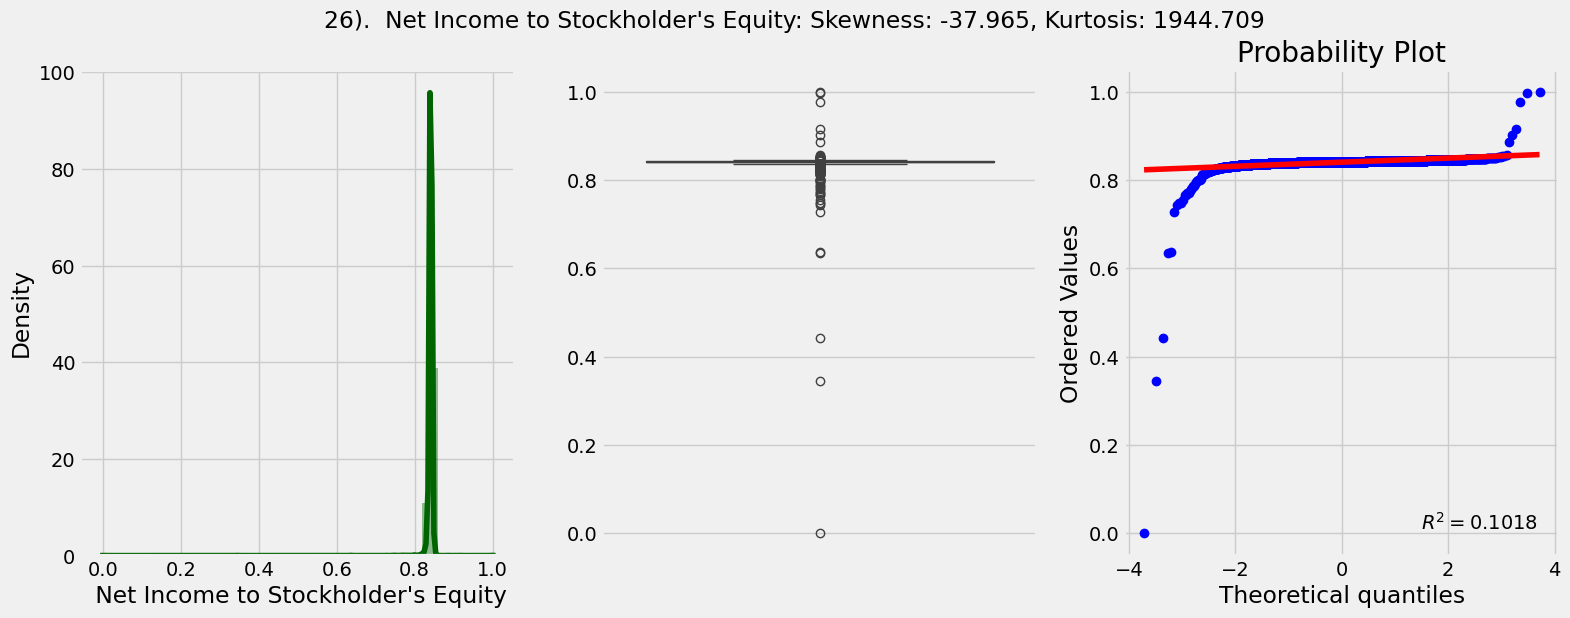

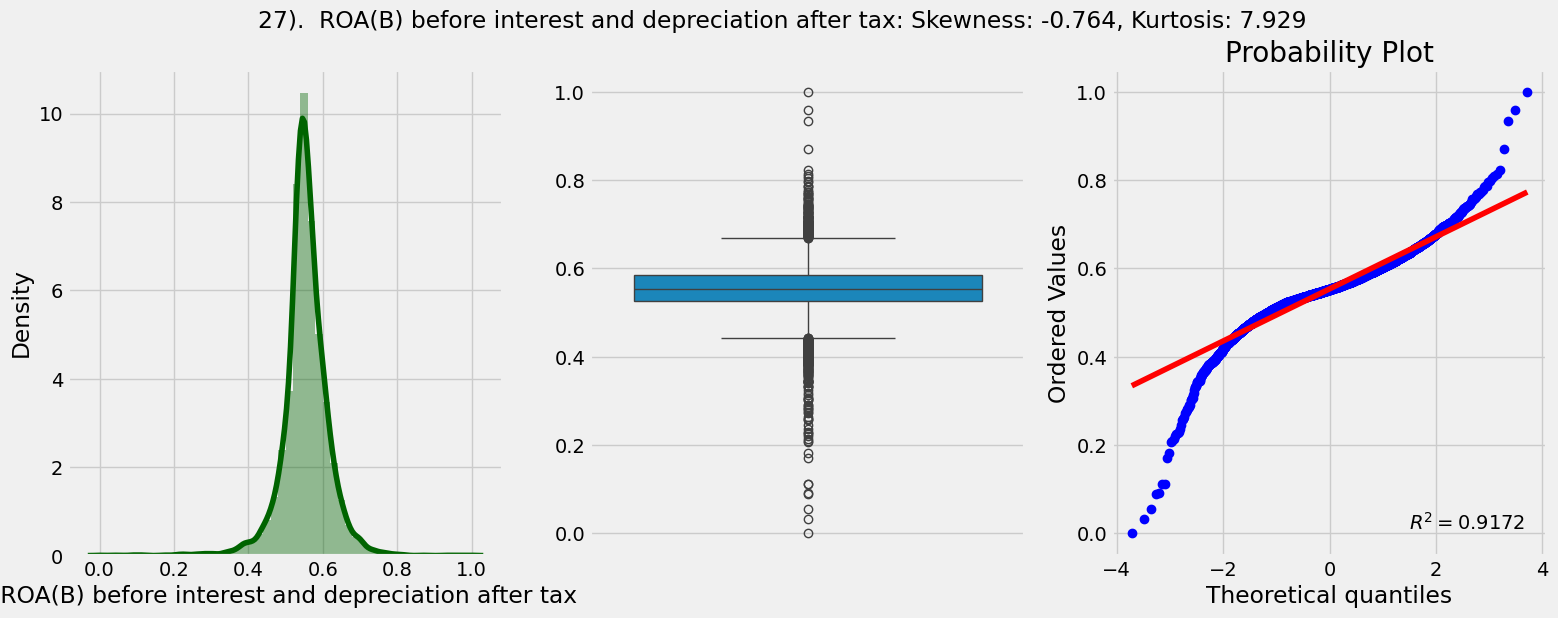

In [ ]:
i = 1
for col in X_train_fc.columns:
    mp.figure(figsize=(17, 6))
    ax = mp.subplot(131)
    sns.distplot(data[col], color="darkgreen")
    ax.set_xlabel("")

    ax = mp.subplot(132)
    sns.boxplot(data[col])
    ax.set_ylabel("Values")

    ax = mp.subplot(133)
    probplot(data[col], rvalue=True, plot=mp, dist='norm')
    mp.suptitle(f"{i}). {col}: Skewness: {round(data[col].skew(), 3)}, Kurtosis: {round(data[col].kurtosis(), 3)}")

    mp.show()
    gc.collect()
    i += 1

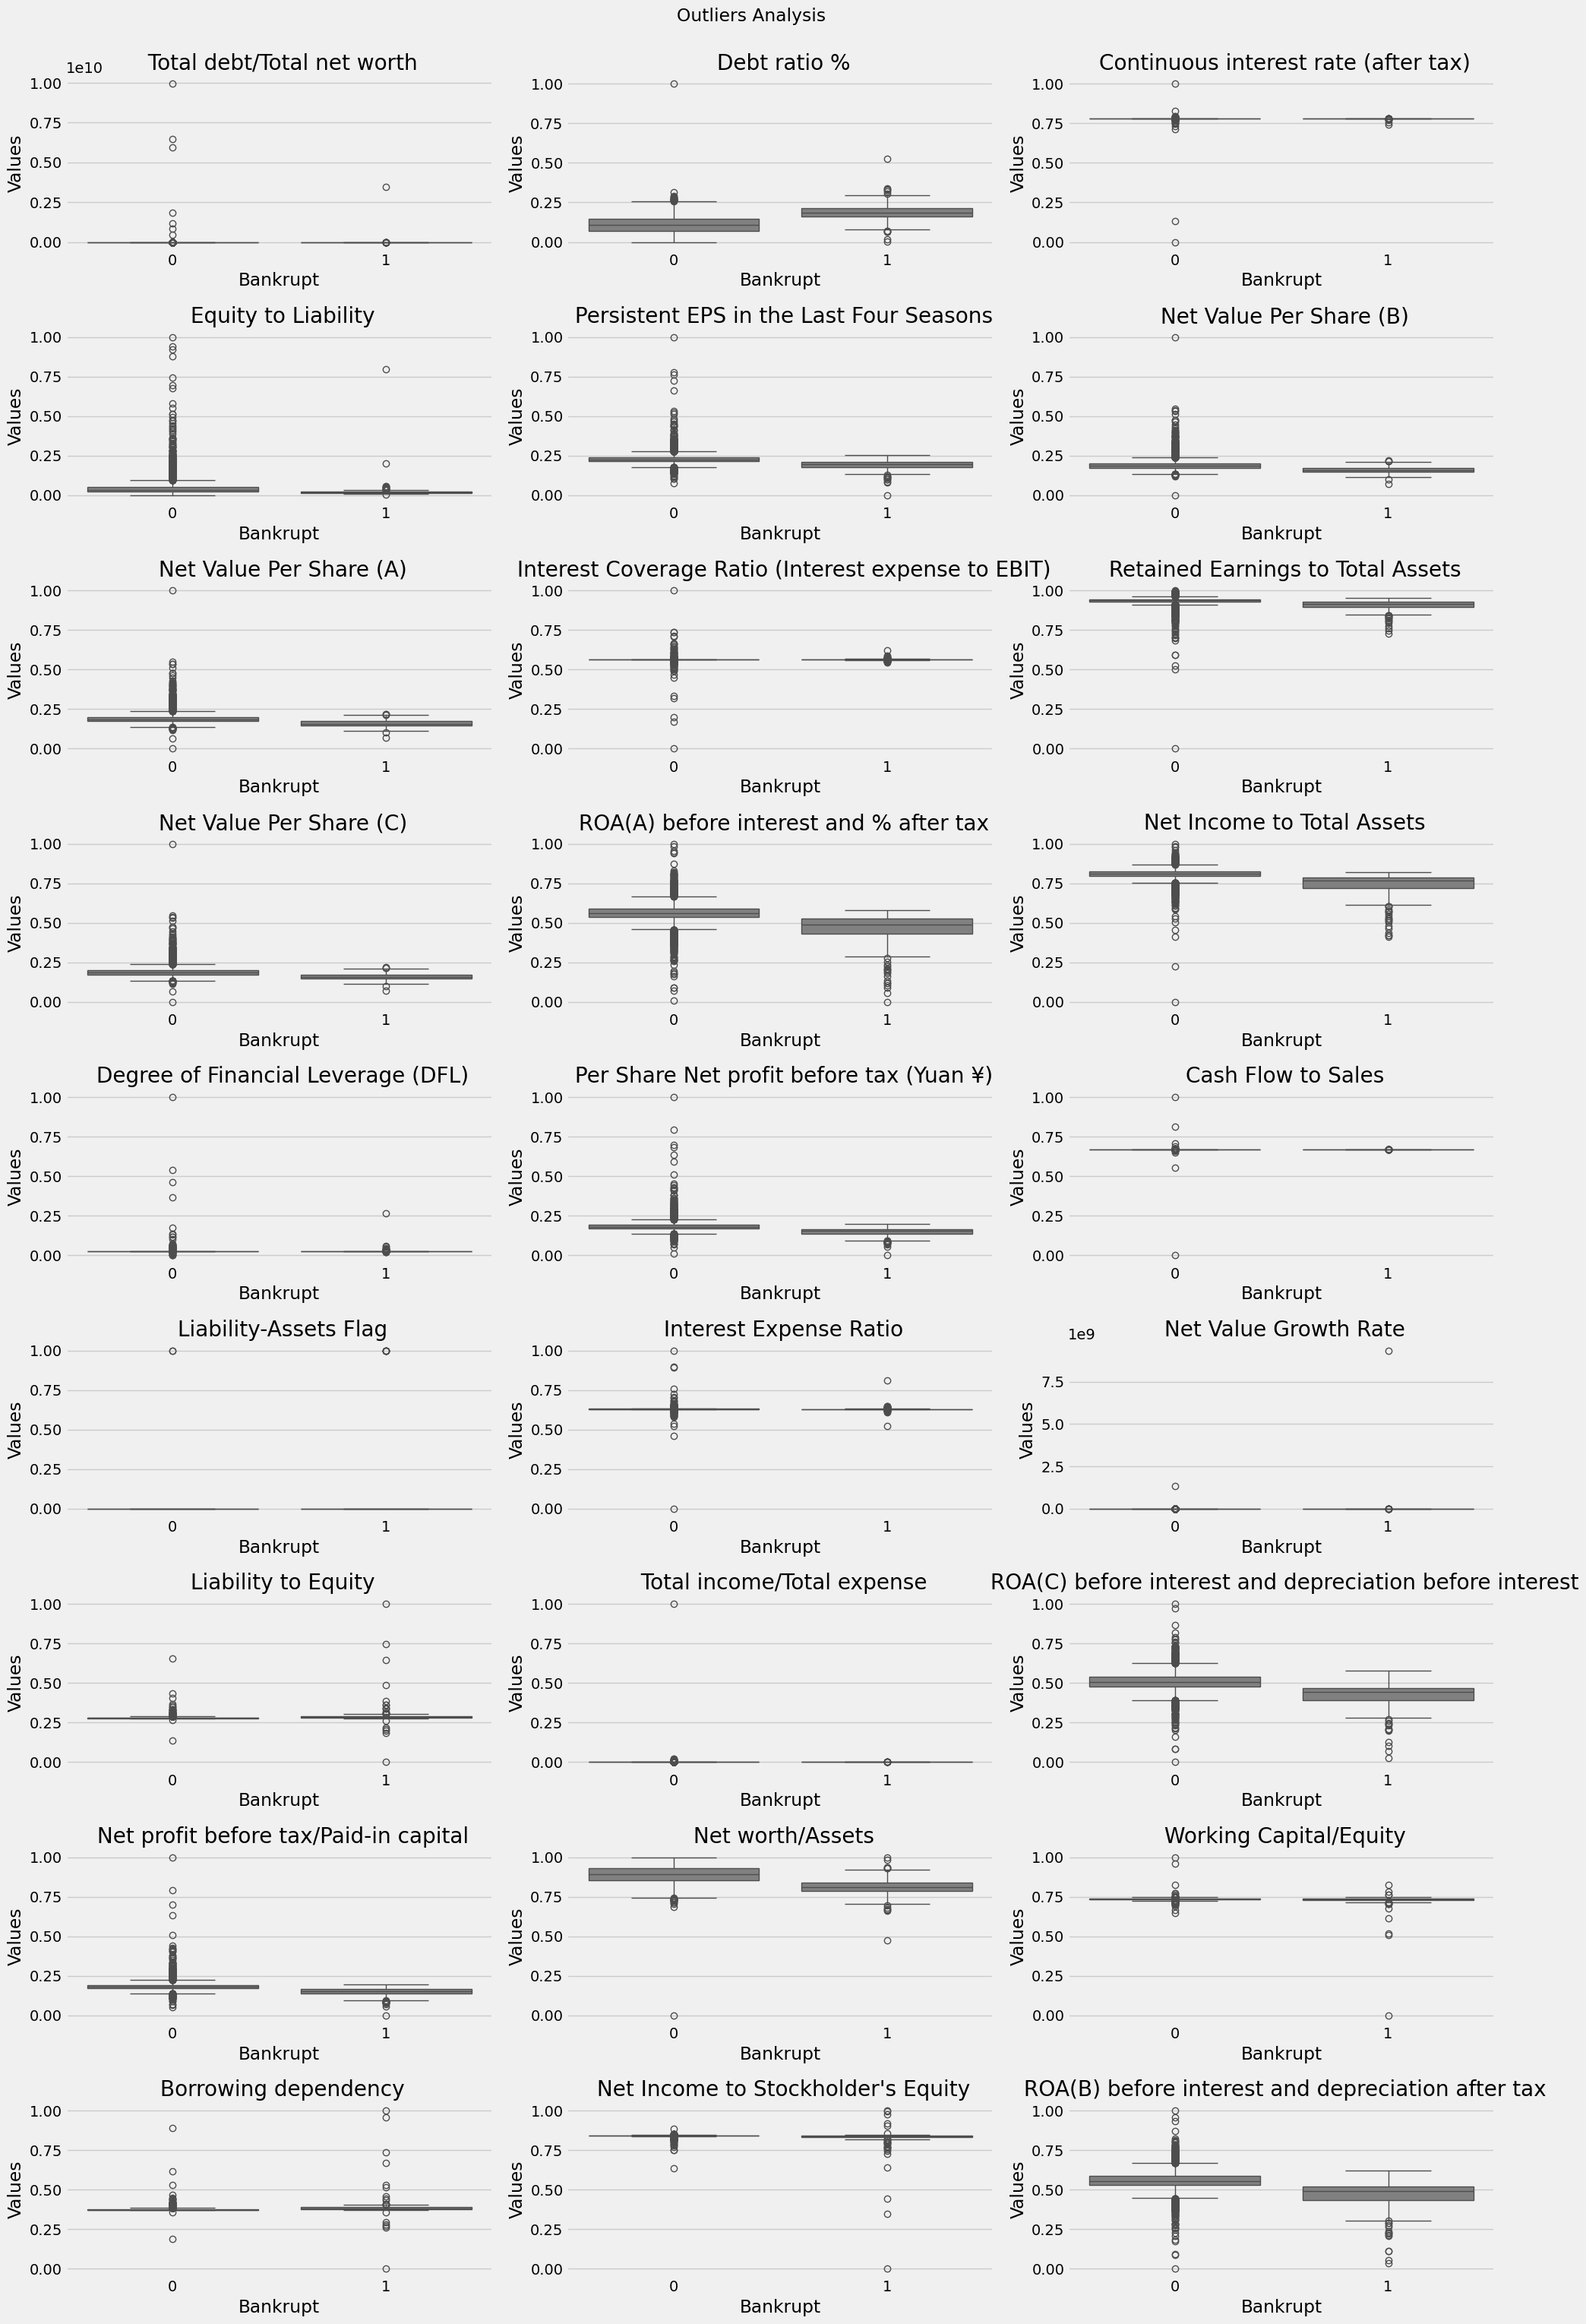

In [ ]:
# Create a new figure
fig = mp.figure(figsize=(20, 30))
# fig.subplots_adjust(hspace=3, wspace=2)

# Iterate through each column in the given list
for i, col in enumerate(X_train_fc.columns, start=1):
    mp.subplot(9, 3, i)

    # Plot the boxplot for the current column using Seaborn
    sns.boxplot(data = data ,y=col, x= "Bankrupt?" ,orient='v', color="grey")

    # Set labels and title
    mp.title(col)
    mp.ylabel('Values')
    mp.xlabel('Bankrupt')

mp.tight_layout()
fig.subplots_adjust(top=0.99)
fig.suptitle("Outliers Analysis",y = 1.02)
mp.show()

* There seem to be some outliers which might be indicative of the features of a bankrupt or to be bankrupt company.
* If we can leverage this information it might be helpful for us.
* This can be done using the outlier detection algorithms by letting them detect which ones are the outliers and using that info as a separate feature.

In [ ]:
def kdplot(col):
    font = {'size' : 9}

    matplotlib.rc('font', **font)
    mp.figure(figsize=(10, 5))

    mp.subplot(121)
    sns.kdeplot(data=data, x=col, hue='Bankrupt?', fill=True)
    # mp.title(f'{col} for Bankrupt vs. Non-bankrupt Companies')
    # mp.xlabel(col)
    mp.ylabel('Density')

    mp.subplot(122)
    sns.violinplot(x='Bankrupt?', y=col, data=data)
    # mp.title(f'{col} for Bankrupt vs. Non-bankrupt Companies')
    # mp.xlabel('Bankrupt')
    mp.ylabel("Values")
    mp.xticks([0, 1], ['Non-bankrupt', 'Bankrupt'])
    mp.suptitle(f'{col} for Bankrupt vs. Non-bankrupt Companies')

    mp.show()
    gc.collect()

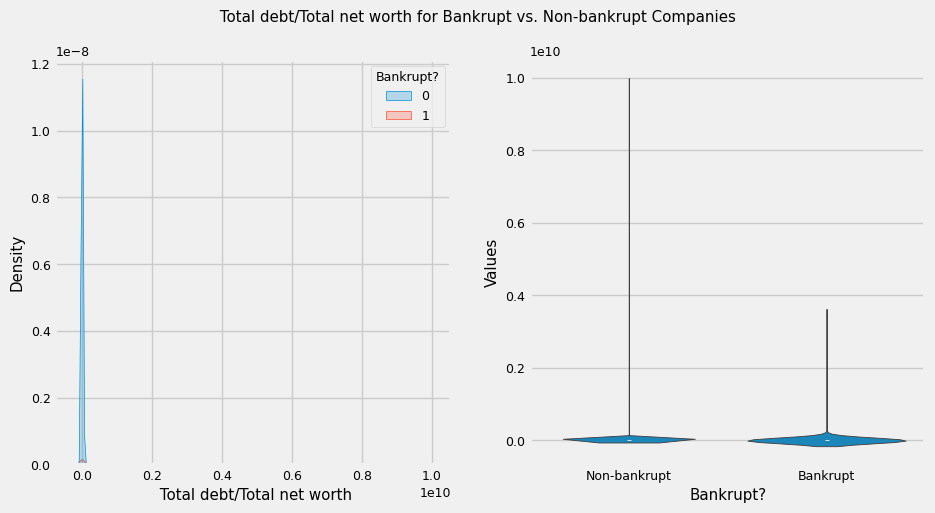

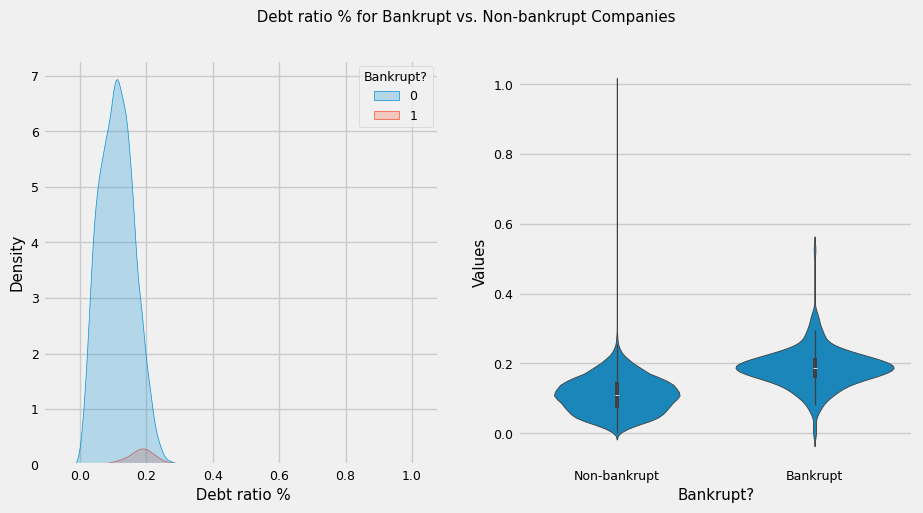

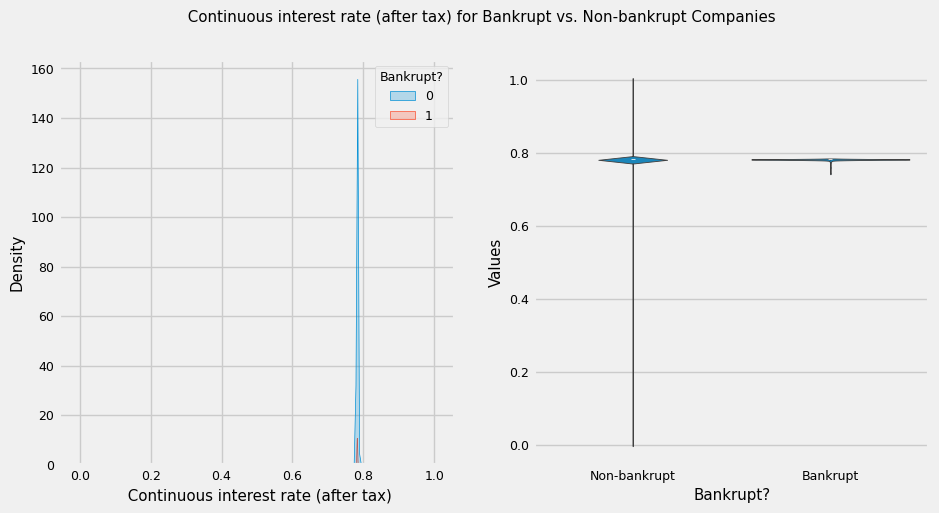

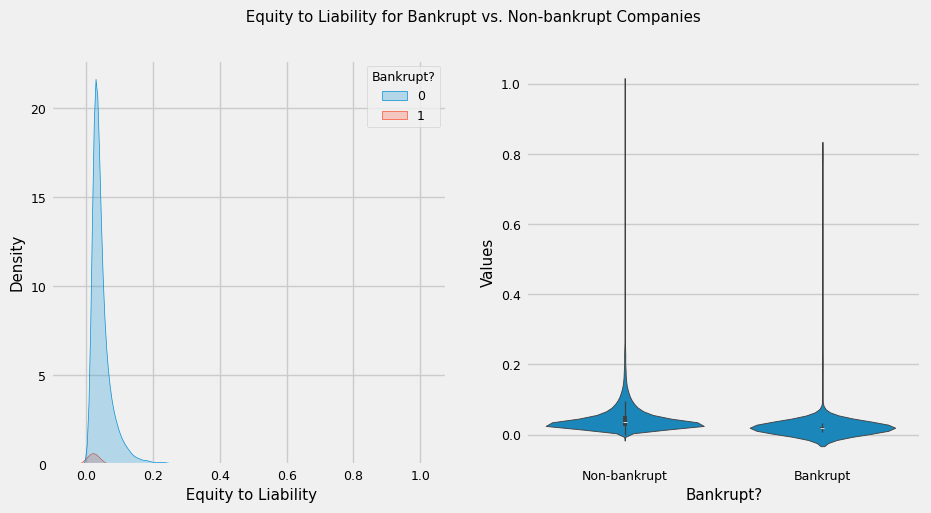

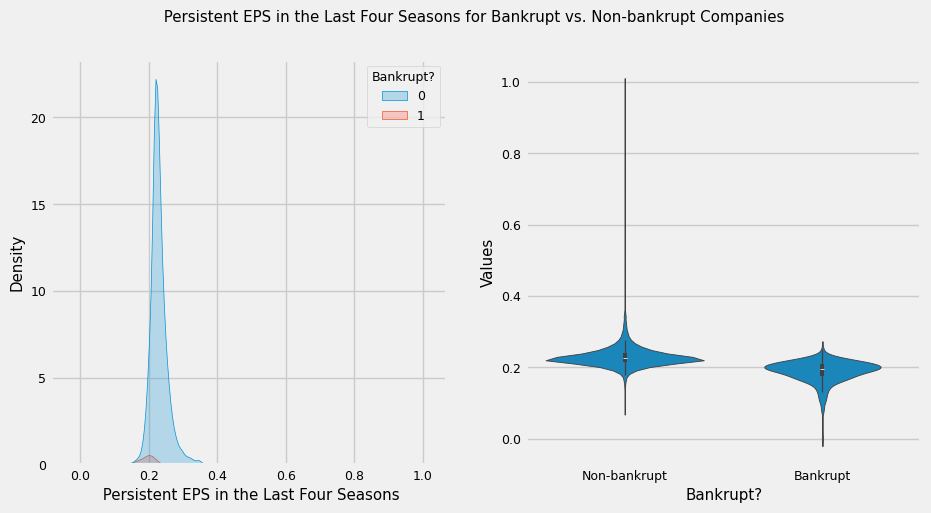

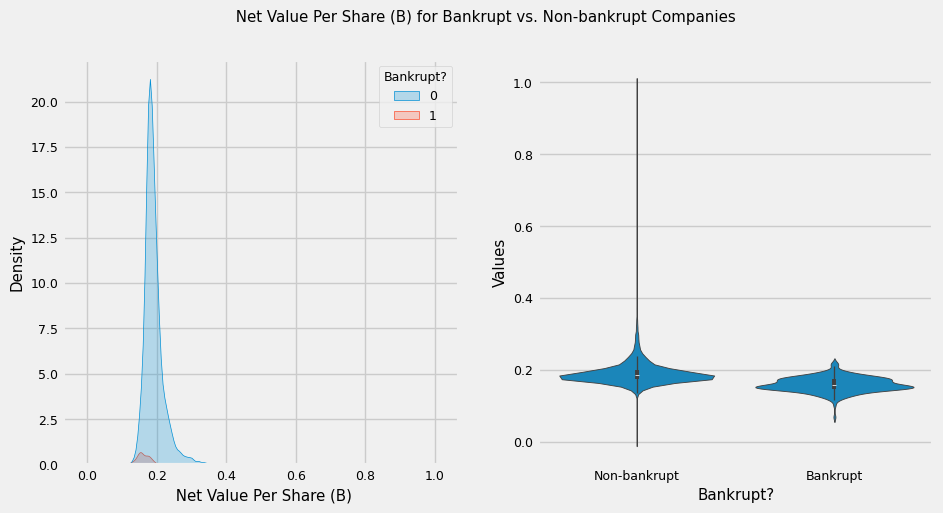

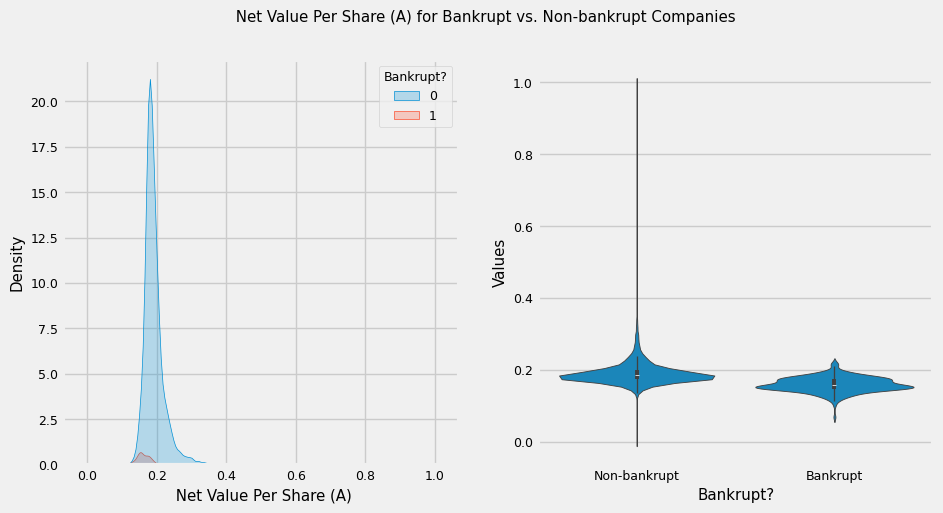

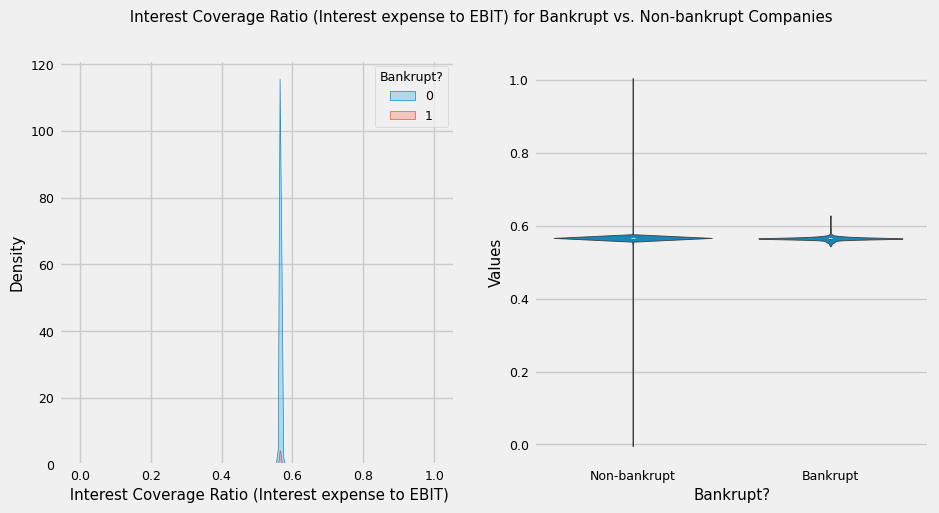

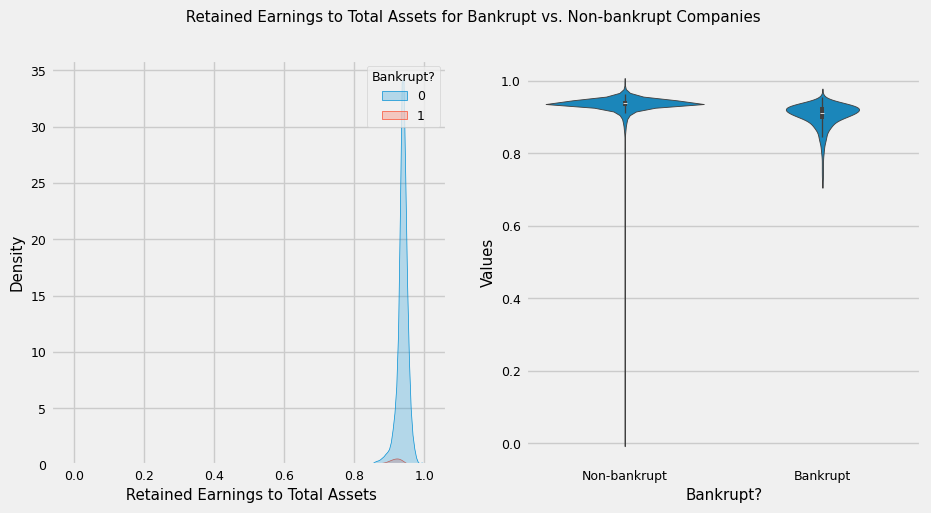

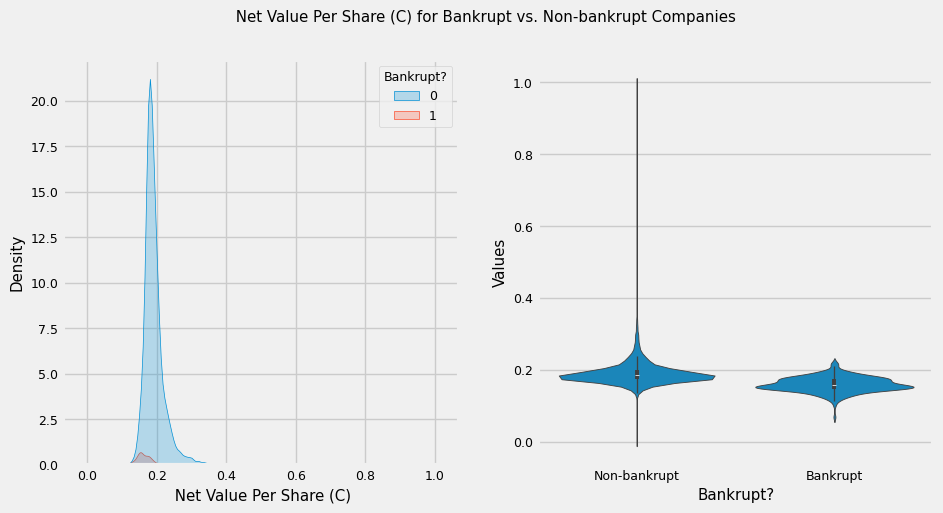

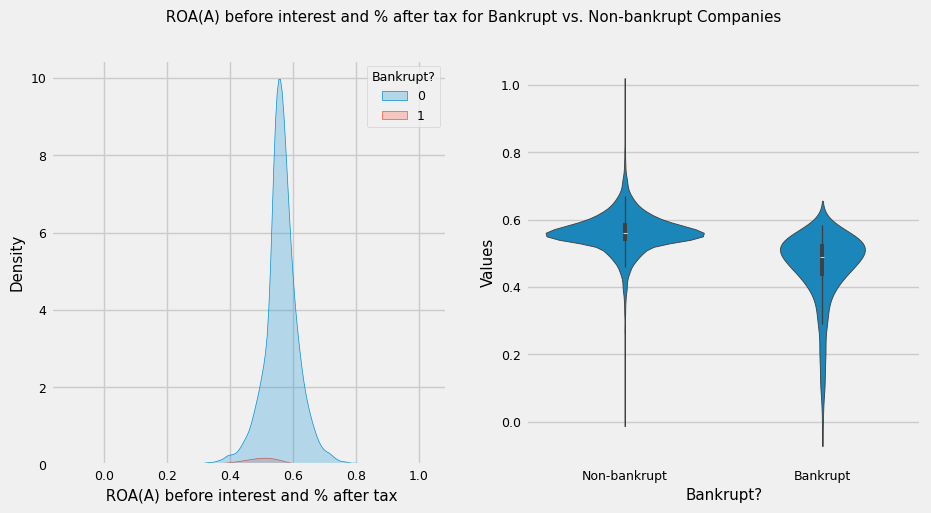

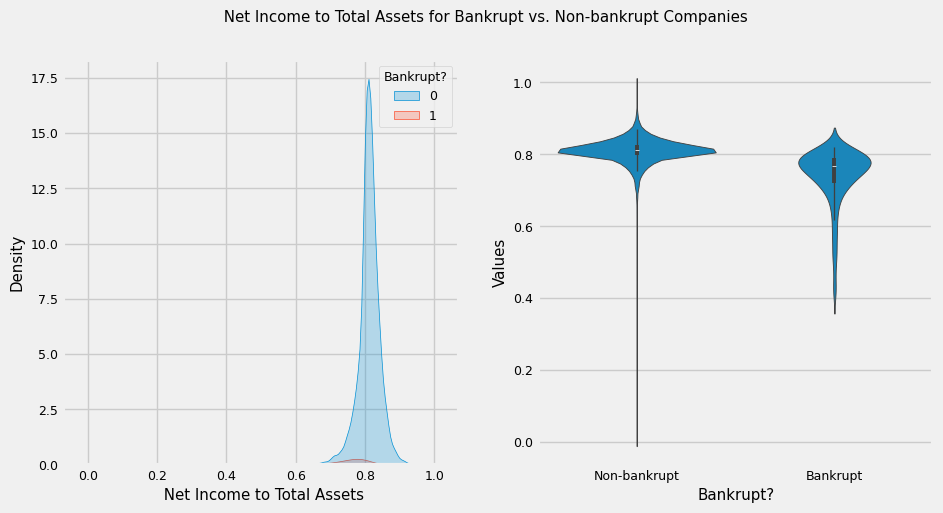

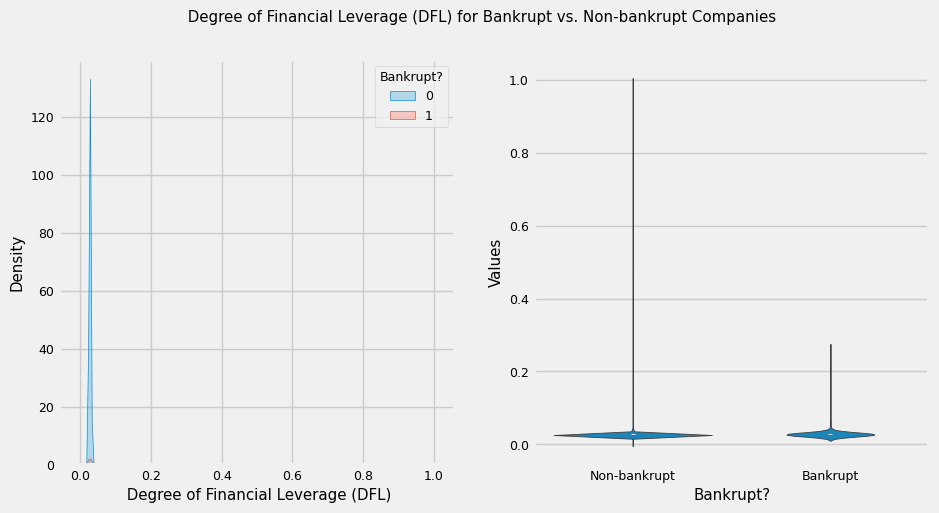

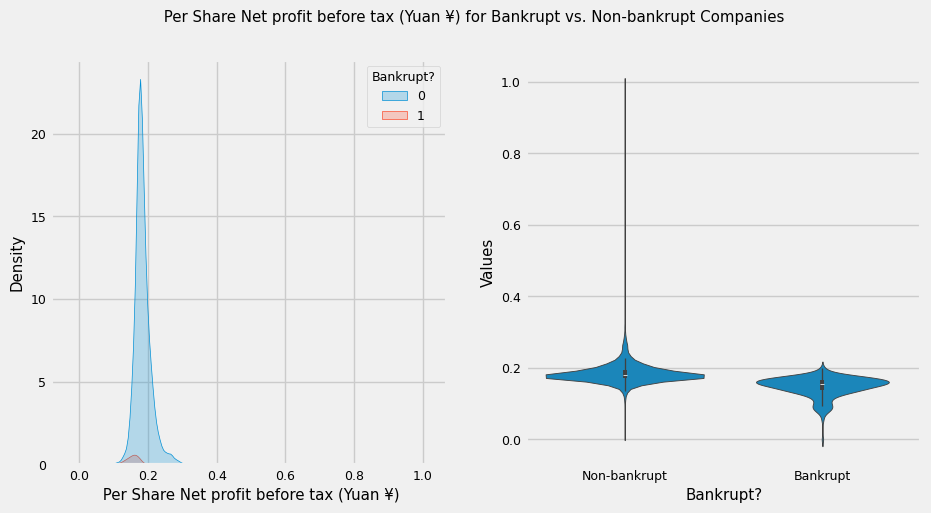

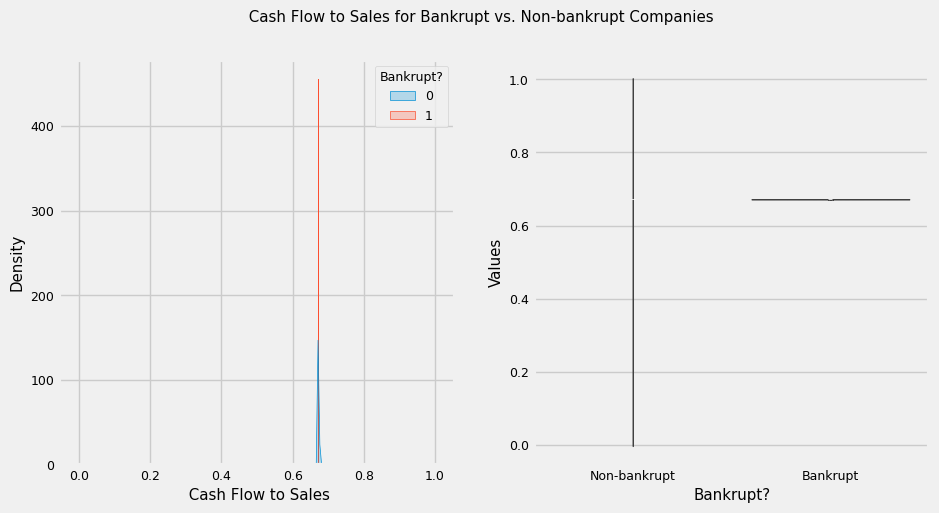

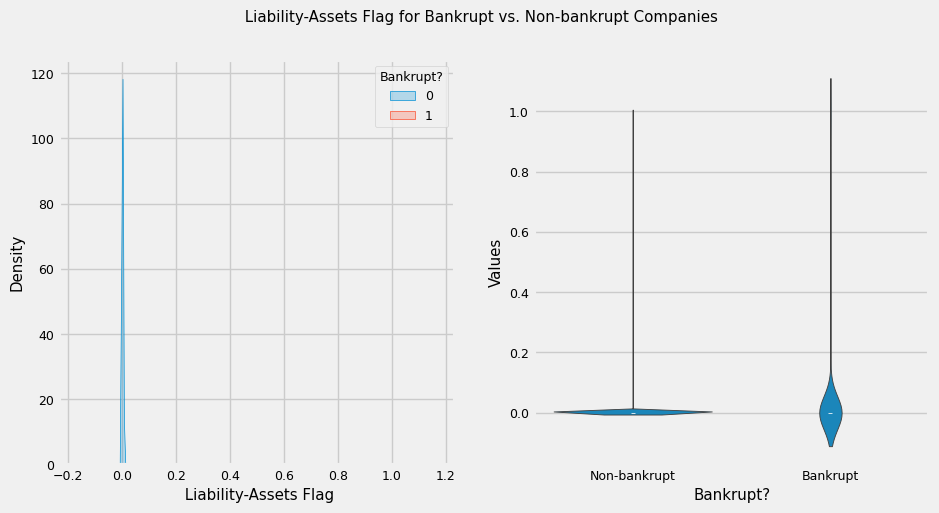

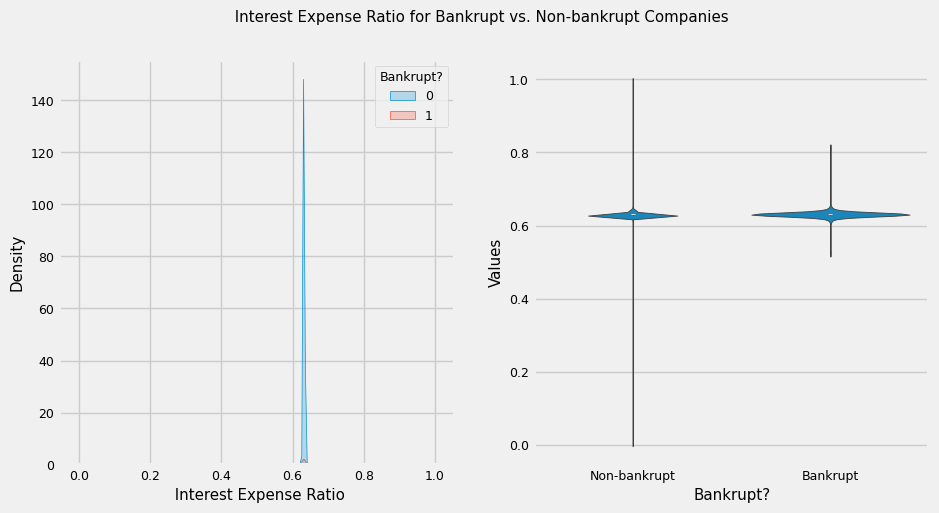

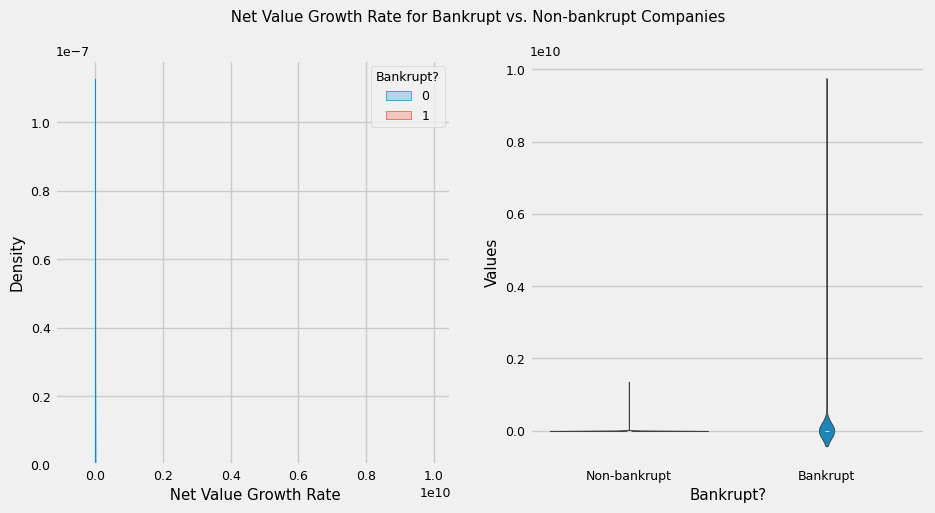

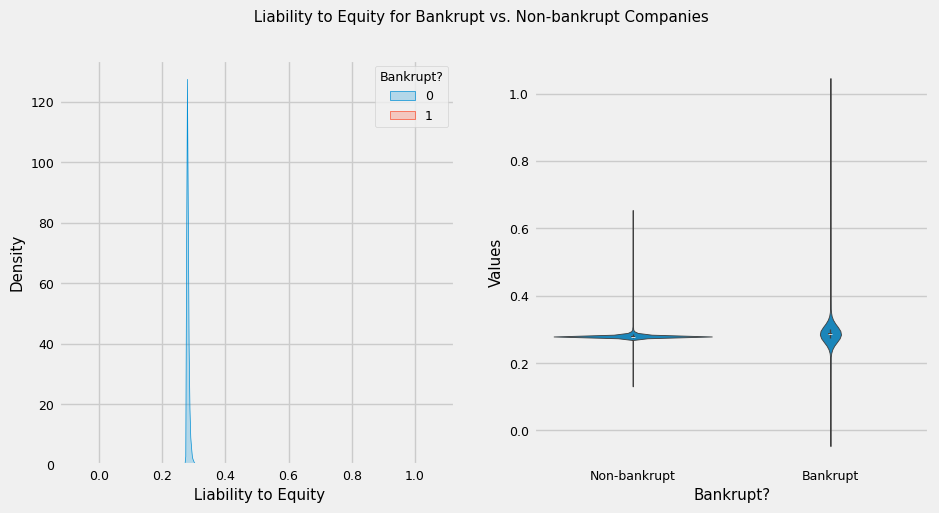

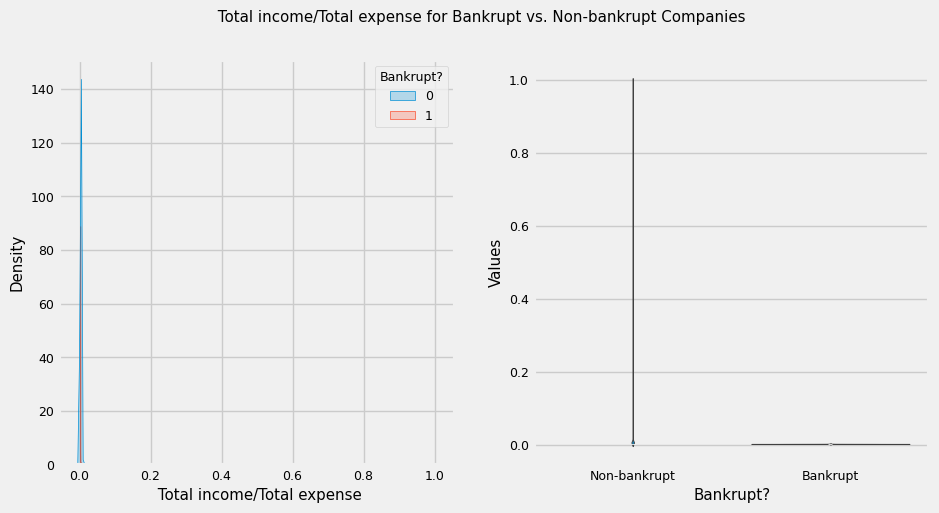

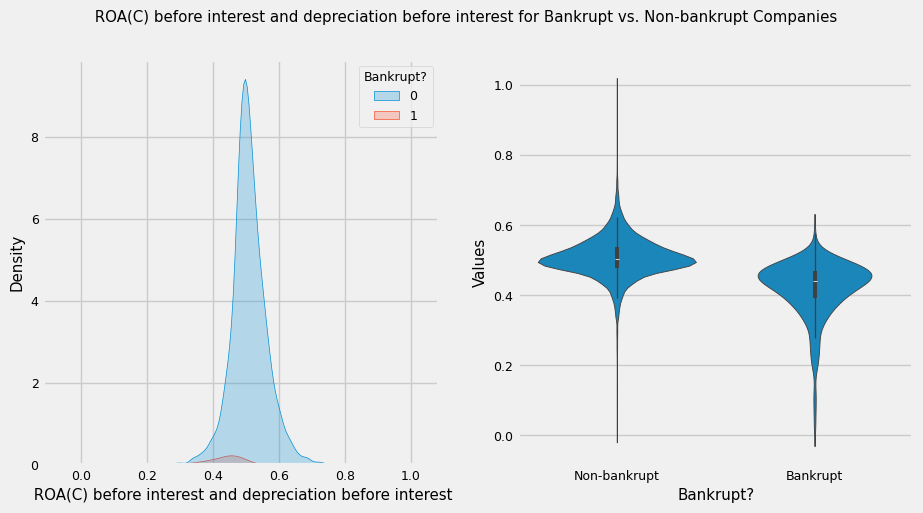

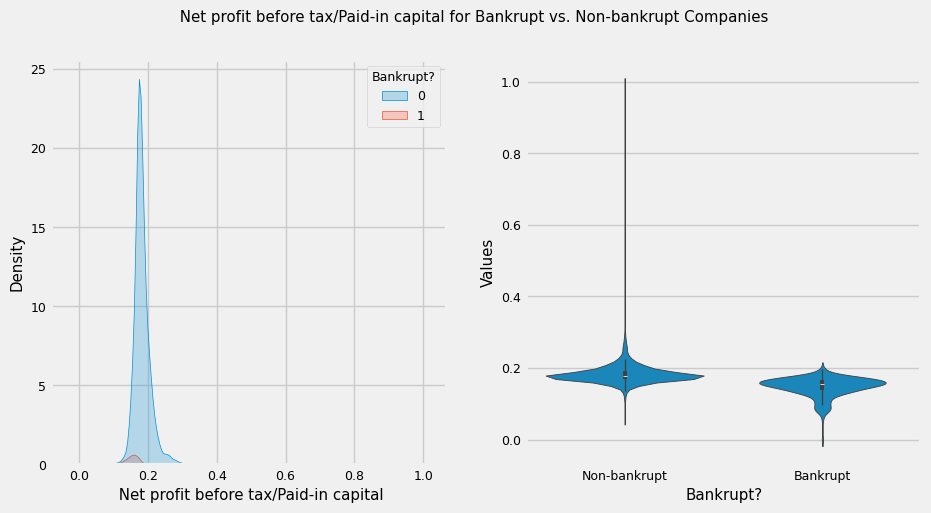

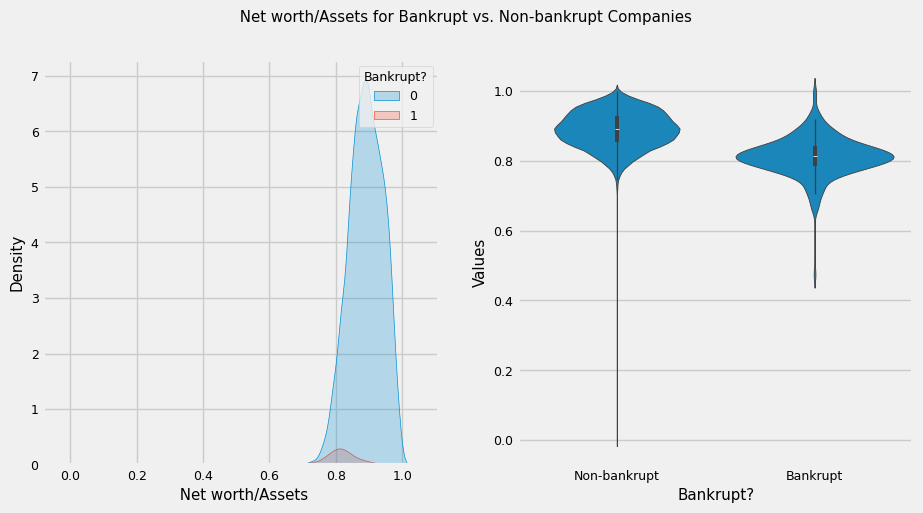

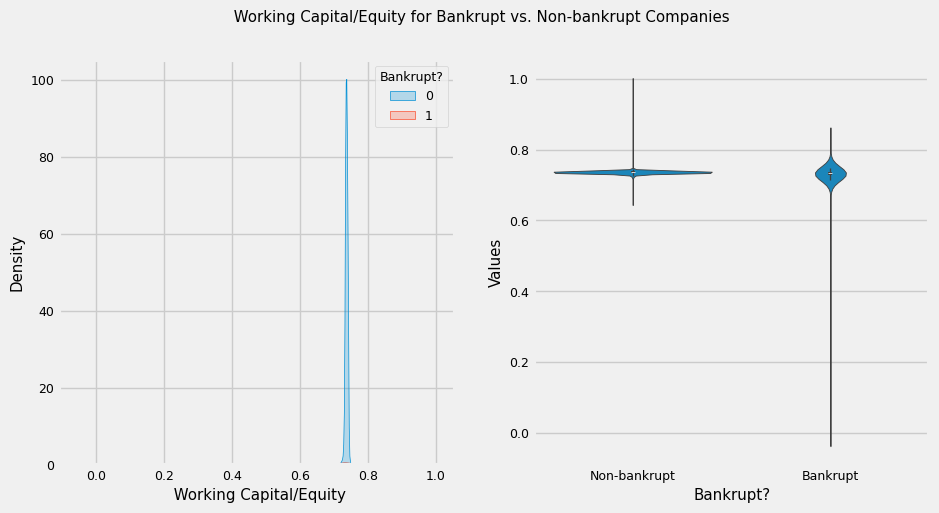

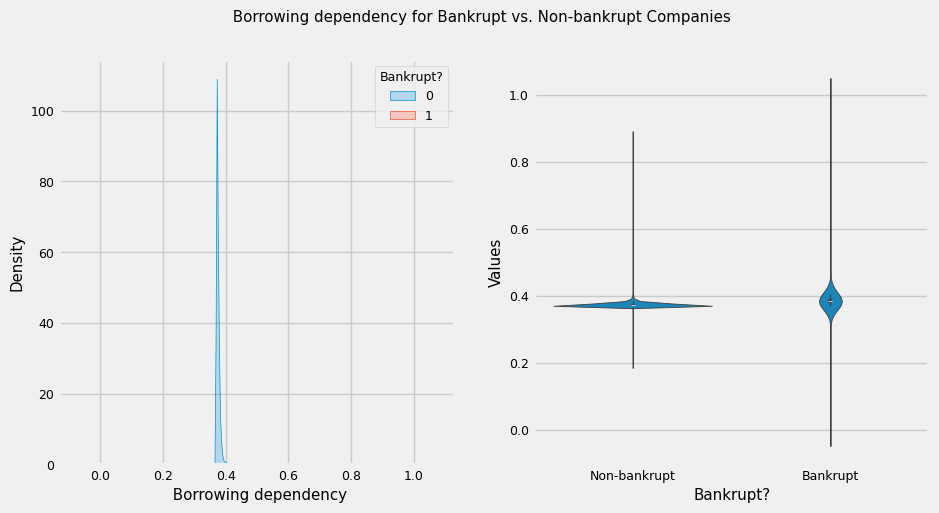

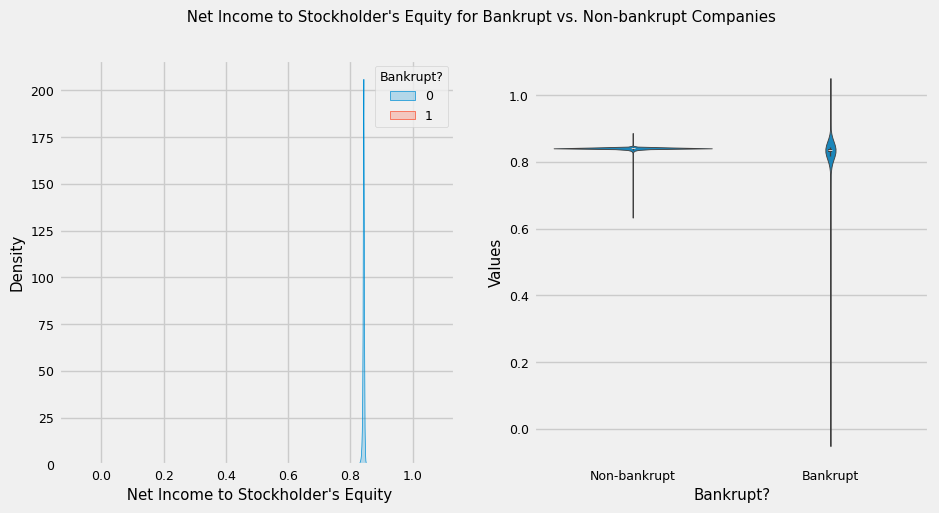

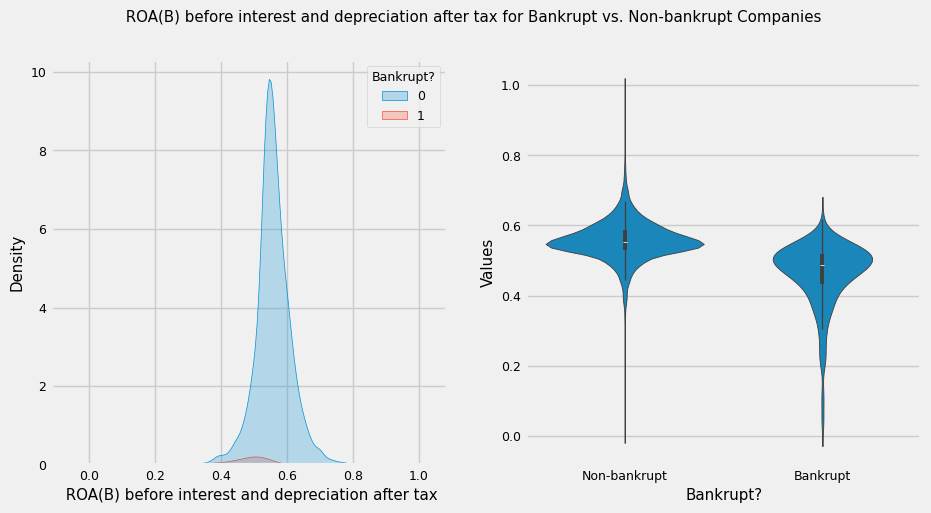

In [ ]:
for col in X_train_fc.columns:
    kdplot(col)

## BaseLine RF and DT on non-Synthetic (original) data.
* We will create a baseline model to understand what our baseline performance should be on our data.
* So that when we create the actual model we know what metrics to surpass in order to create a good model.


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
rf= RandomForestClassifier(random_state=42)

In [ ]:
print(X_train_fc.shape)
print(Y_train.shape)

(5455, 27)
(5455,)


In [ ]:
scaler_obj = StandardScaler()
X_train_fc_sc = scaler_obj.fit_transform(X_train_fc)
X_test_fc_sc = scaler_obj.transform(X_test_fc)

In [ ]:
def base_model_metrics(y_true, y_pred_binary):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred_binary)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary,average='binary')
    recall = recall_score(y_true, y_pred_binary,average='binary')
    f1 = f1_score(y_true, y_pred_binary,average='binary')

    # Create dictionary to store metrics
    metrics_dict = {
        'accuracy': round(accuracy*100,2),
        'balanced_accuracy' : round(balanced_accuracy*100,2),
        'precision': round(precision*100,2),
        'recall': round(recall*100,2),
        'f1_score': round(f1*100,2)
    }

    return metrics_dict

In [ ]:
# dt_classifier = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_fc_sc, Y_train)
rf.fit(X_train_fc_sc, Y_train)
y_pred_dt = dt.predict(scaler_obj.transform(X_test_fc_sc))
y_pred_rf = rf.predict(scaler_obj.transform(X_test_fc_sc))

print("Performance of Decision Tree and Random Forest with the original data (Without Synthetic train samples)")
baseline_perf = pd.DataFrame(columns=["accuracy", "balanced_accuracy", "precision", "recall", "f1_score"])
baseline_perf = pd.concat([baseline_perf, pd.DataFrame.from_dict([base_model_metrics(np.array(Y_test.astype(int)),np.array(y_pred_dt.astype(int)))])])
baseline_perf = pd.concat([baseline_perf, pd.DataFrame.from_dict([base_model_metrics(np.array(Y_test.astype(int)),np.array(y_pred_rf.astype(int)))])])
baseline_perf.index = ["Decision Tree", "Random Forest"]
baseline_perf


Performance of Decision Tree and Random Forest with the original data (Without Synthetic train samples)


accuracy  balanced_accuracy  precision  recall  f1_score
Decision Tree     34.02              66.14       3.74   100.0      7.22
Random Forest     33.94              66.10       3.74   100.0      7.21

## Upsampling Unbalanced Data - BorderlineSMOTE and Scaling
* The data as previously observed is very much skewed. Thus we need to balance it.
* One way is to perform BorderlineSMOTE to upsample the data with lower frequency to match the frequency of other classes.
* This helps in model building as the model doesn't get biased towards the classes with high frequency in the dataset.
<br><br>

![BorderlineSMOTE](https://www.researchgate.net/publication/362631677/figure/fig4/AS:11431281211560194@1702443800329/Schematic-diagram-of-Borderline-SMOTE-algorithm-principle.png)

[BorderlineSMOTE by Saptarsi Goswami](https://towardsdatascience.com/class-imbalance-smote-borderline-smote-adasyn-6e36c78d804)

* Once the SMOTE is done we can then scale the data for better model building.
* Although scaling has no effect on tree models such as Decision Trees, Random Forests etc but they can have a significant impact on other models.
* This can also help inconverging faster in Gradient Descent.

In [ ]:
smote = BorderlineSMOTE()
X_train_fc_bsmoted, Y_train_bsmoted = smote.fit_resample(X_train_fc, Y_train)

scaler = StandardScaler()
X_train_fc_bsmoted_sc = scaler.fit_transform(X_train_fc_bsmoted)
X_test_fc_sc = scaler.fit_transform(X_test_fc)

print(X_train_fc_bsmoted_sc.shape)
print(X_test_fc_sc.shape)
print(Y_train_bsmoted.shape)
print(Y_train_bsmoted.value_counts())

(10540, 27)
(1364, 27)
(10540,)
Bankrupt?
0    5270
1    5270
Name: count, dtype: int64


## Outliers
* When you take a close look at the problem statement and the data associated, you will notice that the problem actually asks us to perform **Anomaly Detection** and finding outliers.
* The anomaly / outliers being the companies that went bankrupt which are much lesser than the companies that didn't.
* We do not need to remove these outliers as these might give us more information about the classification, we will only use these algorithms to get use more information about the outliers and in turn the bankrupt companies.

## Outliers by Local Outlier Factor

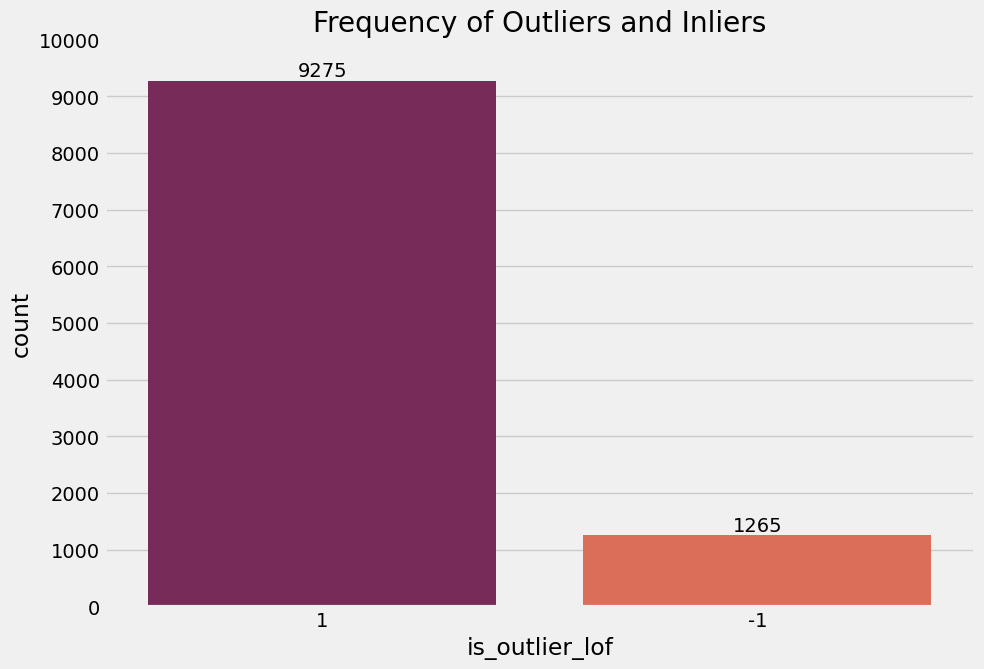

In [ ]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.12)
y_pred = clf.fit_predict(X_train_fc_bsmoted)
X_train_fc_bsmoted["is_outlier_lof"] = y_pred


_ = mp.figure(figsize=(10, 7))
plot = sns.countplot(x='is_outlier_lof', data = X_train_fc_bsmoted, order = X_train_fc_bsmoted["is_outlier_lof"].value_counts().index, palette = 'rocket')
ax = mp.gca()
_ = ax.set_yticks(np.arange(0, 10500, 1000))
ax.set_title("Frequency of Outliers and Inliers")

for i in plot.containers:
    plot.bar_label(i,)

In [ ]:
print(X_train.shape)

(5455, 28)


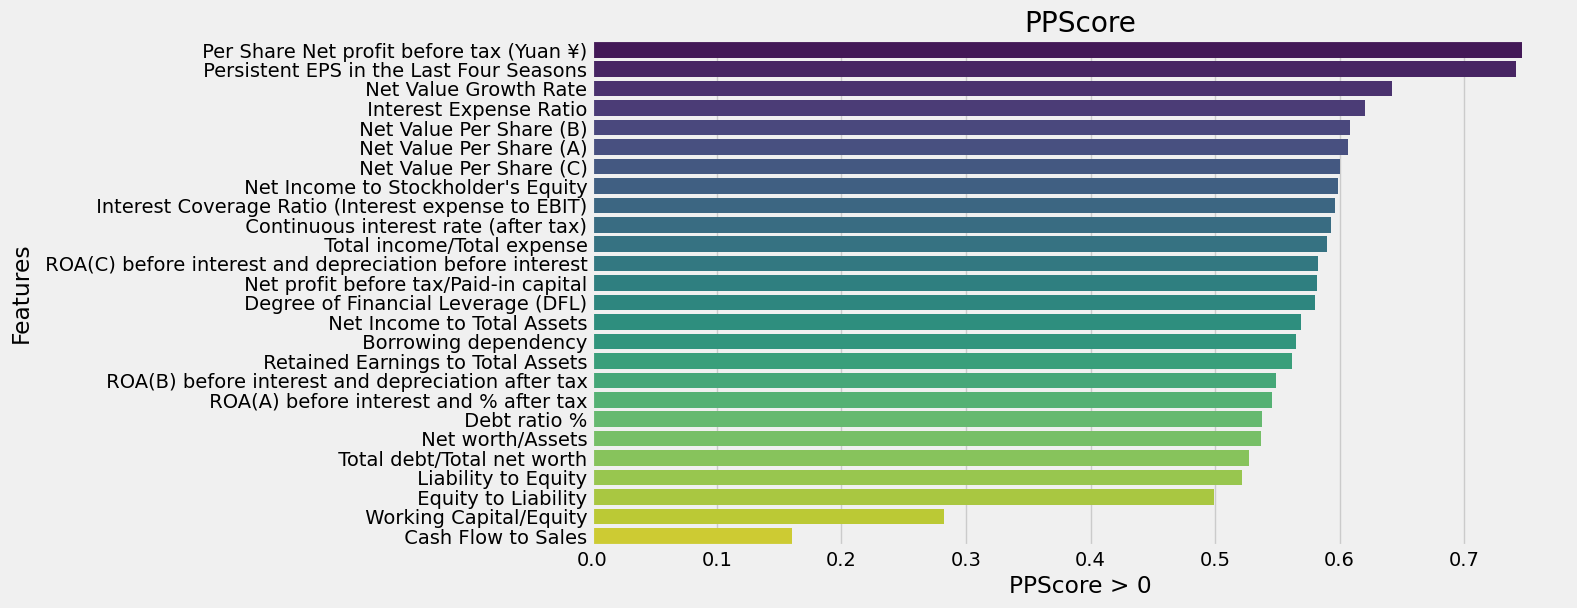

In [ ]:
# Calculating Predictive power score (PPS)
pps_input_df = X_train_fc_bsmoted.copy()
pps_input_df['Bankrupt'] = Y_train_bsmoted.astype(str).copy()
pps_df = pps.predictors(pps_input_df, y="Bankrupt")
pps_df = pps_df[pps_df.ppscore > 0]

# Plotting PPS
mp.figure(figsize=(16,6))
sns.barplot(data=pps_df, x="ppscore", y="x", palette='viridis')
mp.ylabel("Features")
mp.xlabel("PPScore > 0")
mp.tight_layout()
mp.title("PPScore")
mp.show()

The outliers didn't seem to help all that much as the predictive power provided by them was 0.

We will try to find out outliers and perform the predictive score calculation via a different outlier algorithm, i.e. **ECOD**.

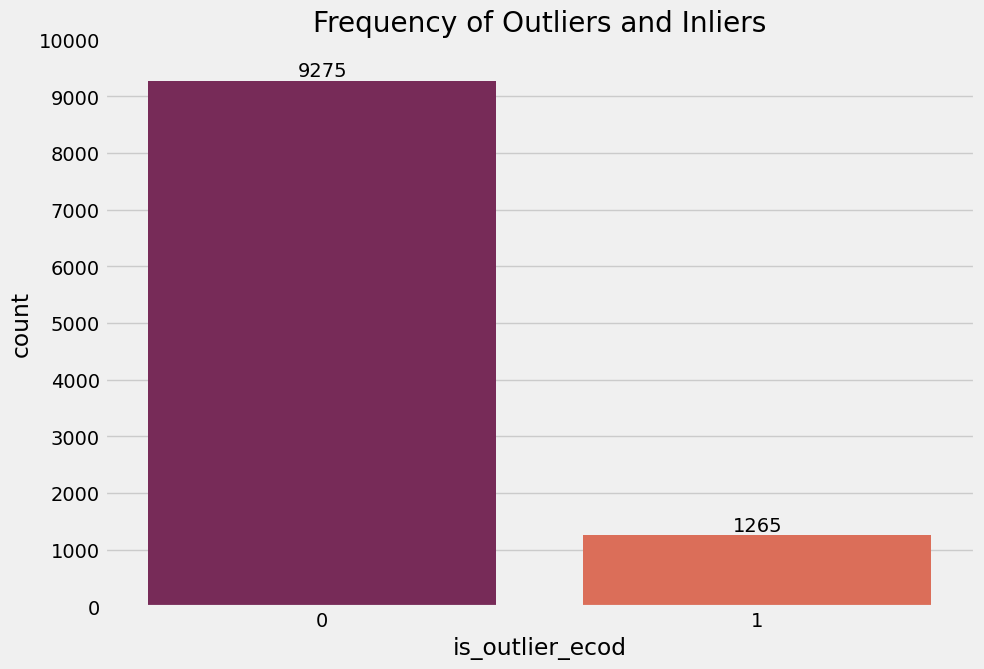

In [ ]:
# Creating ECOD object and creating outlier flag
ecod_obj_final = ECOD(contamination = 0.12)
outliers_flag = ecod_obj_final.fit_predict(X_train_fc_bsmoted)
X_train_fc_bsmoted["is_outlier_ecod"] = outliers_flag

_ = mp.figure(figsize=(10, 7))
plot = sns.countplot(x='is_outlier_ecod', data = X_train_fc_bsmoted, order = X_train_fc_bsmoted["is_outlier_ecod"].value_counts().index, palette = 'rocket')
ax = mp.gca()
_ = ax.set_yticks(np.arange(0, 10500, 1000))
ax.set_title("Frequency of Outliers and Inliers")

for i in plot.containers:
    plot.bar_label(i,)

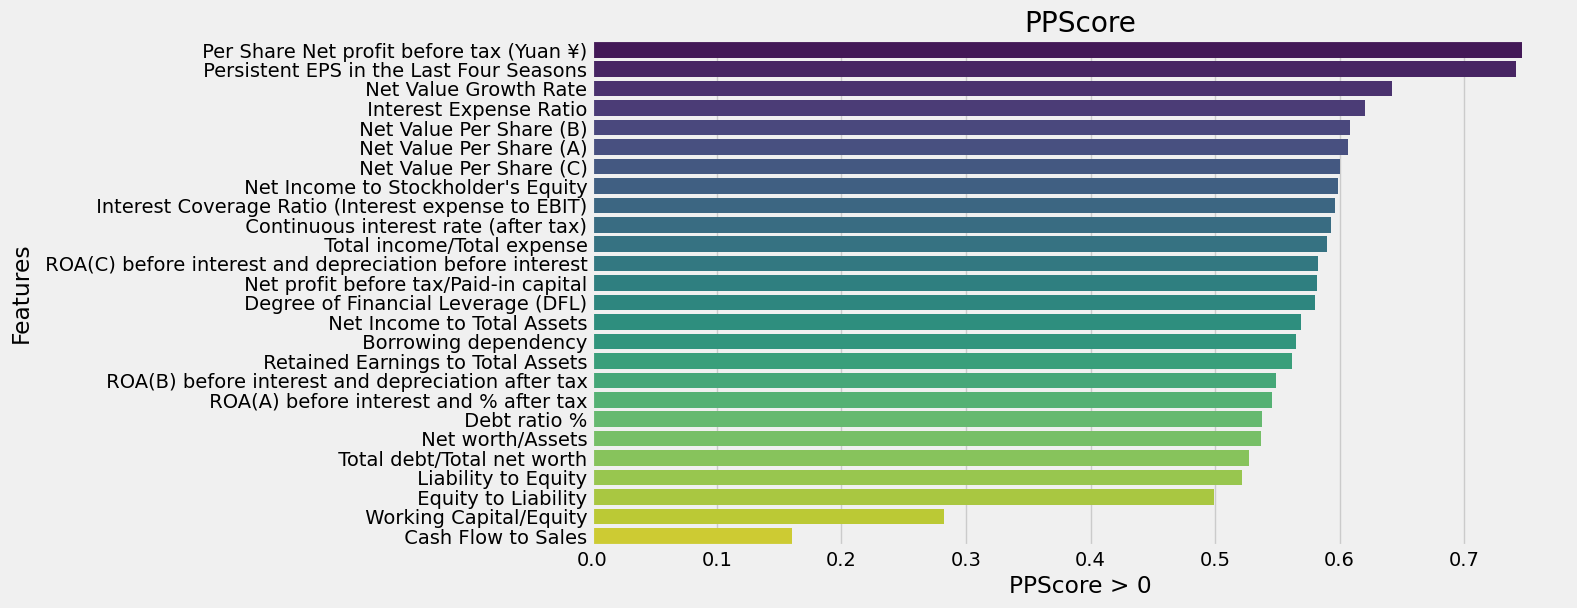

In [ ]:
# Calculating Predictive power score (PPS)
pps_input_df = X_train_fc_bsmoted.copy()
pps_input_df['Bankrupt'] = Y_train_bsmoted.astype(str).copy()
pps_df = pps.predictors(pps_input_df, y="Bankrupt")
pps_df = pps_df[pps_df.ppscore > 0]

# Plotting PPS
mp.figure(figsize=(16,6))
sns.barplot(data=pps_df, x="ppscore", y="x", palette='viridis')
mp.ylabel("Features")
mp.xlabel("PPScore > 0")
mp.tight_layout()
mp.title("PPScore")
mp.show()

In [ ]:
# X_train_fc_bsmoted.drop(["is_outlier_lof", "is_outlier_ecod"], axis=1, inplace=True)
print(X_train_fc_bsmoted.shape)
X_train_fc_bsmoted.head()

(10540, 27)


Total debt/Total net worth   Debt ratio %  \
0                     0.014883       0.183693   
1                     0.023482       0.213683   
2                     0.121797       0.276869   
3                     0.016052       0.188953   
4                     0.009313       0.149439   

    Continuous interest rate (after tax)   Equity to Liability  \
0                               0.781651              0.019120   
1                               0.781477              0.015884   
2                               0.780017              0.011326   
3                               0.781599              0.018478   
4                               0.781624              0.024359   

    Persistent EPS in the Last Four Seasons   Net Value Per Share (B)  \
0                                  0.293372                  0.221482   
1                                  0.208188                  0.154018   
2                                  0.171315                  0.137162   
3                                  0.222369                  0.176689   
4                                  0.255365                  0.201298   

    Net Value Per Share (A)  \
0                  0.221482   
1                  0.154018   
2                  0.113354   
3                  0.176689   
4                  0.201298   

    Interest Coverage Ratio (Interest expense to EBIT)  \
0                                           0.565562     
1                                           0.580666     
2                                           0.553494     
3                                           0.567838     
4                                           0.565388     

    Retained Earnings to Total Assets   Net Value Per Share (C)  \
0                            0.951389                  0.221482   
1                            0.917793                  0.154018   
2                            0.912139                  0.113354   
3                            0.933725                  0.176689   
4                            0.945591                  0.201298   

    ROA(A) before interest and % after tax   Net Income to Total Assets  \
0                                 0.621838                     0.840192   
1                                 0.532272                     0.787439   
2                                 0.515700                     0.777094   
3                                 0.551515                     0.801727   
4                                 0.601123                     0.833696   

    Degree of Financial Leverage (DFL)  \
0                             0.026883   
1                             0.025226   
2                             0.026053   
3                             0.027991   
4                             0.026842   

    Per Share Net profit before tax (Yuan ¥)   Cash Flow to Sales  \
0                                   0.258567             0.671580   
1                                   0.165022             0.671580   
2                                   0.135422             0.671639   
3                                   0.174964             0.671581   
4                                   0.213904             0.671572   

    Liability-Assets Flag   Interest Expense Ratio   Net Value Growth Rate  \
0                       0                 0.630986                0.000589   
1                       0                 0.677422                0.000404   
2                       0                 0.625583                0.000331   
3                       0                 0.632962                0.000456   
4                       0                 0.630823                0.000491   

    Liability to Equity   Total income/Total expense  \
0              0.285573                     0.002423   
1              0.291809                     0.002160   
2              0.363109                     0.001891   
3              0.286420                     0.002273   
4              0.281534                     0.002602   

    ROA(C

# PCA
* The dimensionaltiy of our data is high (27 features).
* This can significanlty affect the performance of our models.
* Thus it is important to reduce the dimensionality of the data such that we retain as much information as possible.
* Here we will use PCA. We won't just be using the PCA's dimensionally reduced data but also the original data to understand if the PCA data is even giving us better results or not.

In [ ]:
pca=PCA()
pca.fit(X_train_fc_bsmoted_sc)
exp_variance = pca.explained_variance_ratio_
cum_exp_variance = np.cumsum(exp_variance)
print(cum_exp_variance)

In [ ]:
pca = PCA(n_components=27,random_state=7)
X_train_fc_bsmoted_sc_pca = pca.fit_transform(X_train_fc_bsmoted_sc)
X_test_fc_sc_pca = pca.transform(X_test_fc_sc)

## Grid Search CV - Model Building
The below function automates the Grid Search CV process for the following models:-
* DecisionTreeClassifier
* BaggingClassifier
* RandomForestClassifier
* XGBClassifier
* ExtraTreesClassifier
* GradientBoostingClassifier


The parameters and their values have been set and all the combinations will be tested.

Normally I would use RandomSearch CV as that would be more time efficient (although that would be a little less accurate).

But here the datasize is small (around 10k) and the Grid Search CV can be used to give accurate results.


In [ ]:
def model_training(x_train, y_train, x_val, y_val, metrics_file_name):
    # Create objects of Classification models with default hyper-parameters
    print("Creating Model Objects\n")
    modeldtc = DecisionTreeClassifier()
    modelbag = BaggingClassifier()
    modelrfc = RandomForestClassifier()
    modelxgc = XGBClassifier(metric='mlogloss')
    modeletc = ExtraTreesClassifier()
    modelgbc = GradientBoostingClassifier()

    dtc_param_grid = {
        'criterion' : ['gini', 'entropy'],
        'max_depth' : [5, 6, 7, 8, 9],
        "min_samples_split" : [10, 15, 20, 25],
        "min_samples_leaf" : [5, 10, 15, 20]
    }

    bag_param_grid = {
        "estimator" : [SVC(), DecisionTreeClassifier()],
        "n_estimators" : [10, 25, 50, 75, 100, 150],
        "max_samples" : [0.05, 0.1, 0.2, 0.5]
    }

    rfc_param_grid = {
        'n_estimators' : [100, 200, 300],
        'max_depth' : [5, 6, 7, 8, 9],
        "max_features" : ["sqrt", "log2"],
        'criterion' : ["gini", "entropy", "log_loss"],
        'min_samples_split' : [2, 3, 4],
        'min_samples_leaf' : [1, 2, 3]
    }

    xgc_param_grid = {
        'n_estimators' : [100, 200, 300],
        'learning_rate' : [0.01, 0.1],
        'colsample_bylevel' : [0.7, 0.9, 1],
        'colsample_bynode' : [0.7, 0.9, 1],
        'max_depth' : [3, 4, 5]
    }

    etc_param_grid = {
        'n_estimators' : [100, 200, 300],
        'max_depth' : [6, 7, 8, 9],
        'min_samples_split' : [1, 2, 3],
        'min_samples_leaf' : [1, 2]
    }

    gbc_param_grid = {
        'n_estimators' : [100, 200, 300],
        'max_depth' : [5, 6, 7, 8],
        'min_samples_split' : [2, 3, 4],
        'min_samples_leaf' : [1, 2, 3]
    }


    # Initializing all the other variables to hold the metrics and the models etc for returning at the end of the function.
    print("Initializing Model Variables")
    all_models_names = ["DecisionTreeClassifier", "BaggingClassifier", "RandomForestClassifier", "XGBClassifier", "ExtraTreesClassifier", "GradientBoostingClassifier"]
    all_models = [modeldtc, modelbag, modelrfc, modelxgc, modeletc, modelgbc]
    all_models_params = [dtc_param_grid, bag_param_grid, rfc_param_grid, gbc_param_grid, etc_param_grid, xgc_param_grid]

    model_metrics = pd.DataFrame(columns=['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1Score'])
    all_models_best_params = []
    all_models_best_estimator = []

    print('------------------------------------------------------------------------------------------------------------')

    time_change = datetime.timedelta(minutes=330)

    for i in range(len(all_models)):
        print('Model Name: ', all_models_names[i], "\n")
        curr_model = all_models[i]
        curr_param_grid = all_models_params[i]
        curr_gs_model = GridSearchCV(curr_model, curr_param_grid, cv=5, scoring = 'f1', verbose = 1)

        # Fit it to the data
        print("Starting the Training\n")
        current_time = datet.now()
        formatted_time = (current_time + time_change).strftime('%H:%M:%S')
        print(formatted_time)

        # curr_model.fit(x_train, y_train)
        curr_gs_model.fit(x_train, y_train)



        # For keeping the track of time
        curr_time_2 = datet.now()
        formatted_time = (curr_time_2 + time_change).strftime('%H:%M:%S')
        print(formatted_time)
        print(curr_time_2 - current_time, "Time required for training.\n")

        # Predict the model with test data
        y_pred = curr_gs_model.predict(x_val)
        all_models_best_params.append(curr_gs_model.best_params_)
        all_models_best_estimator.append(curr_gs_model.best_estimator_)

        # Calculate the metrics
        print("Calculating Metrics\n")
        curr_model_acc = round(accuracy_score(y_val, y_pred), 3)
        curr_model_pre = round(precision_score(y_val, y_pred, average='micro'), 3)
        curr_model_rec = round(recall_score(y_val, y_pred, average='micro'), 3)
        curr_model_f1s = round(curr_gs_model.best_score_, 3)

        curr_model_data_point = {
            'Model Name' : all_models_names[i],
            'Accuracy' : curr_model_acc,
            'Precision' : curr_model_pre,
            'Recall' : curr_model_rec,
            'F1Score': curr_model_f1s
        }

        # cv_model_metrics = cv_model_metrics.append(curr_model_data_point, ignore_index=True)
        s2 = pd.Series(curr_model_data_point)

        model_metrics = pd.concat([model_metrics, s2.to_frame().T], ignore_index=True)

        print("Training Complete for current model.\n")

        # write_csv(metrics_file_name, model_metrics)
        model_metrics.to_csv(metrics_file_name)
        print("Metrics Noted in the CSV File.\n")

        with open(all_models_names[i] + '.pkl', 'wb') as files:
          dump(curr_gs_model.best_estimator_, files)

        # print(curr_model_cv.best_params_)
        print('------------------------------------------------------------------------------------------------------------\n\n')
        print('------------------------------------------------------------------------------------------------------------')

    return model_metrics, all_models, all_models_best_params, all_models_best_estimator

## Model Building on original data.

In [5]:
model_metrics, all_models, all_models_best_params, all_models_best_estimator = model_training(X_train_fc_bsmoted, Y_train_bsmoted, X_test_fc, Y_test, "Model_metrics.csv")



Creating Model Objects

Initializing Model Variables
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier 

Starting the Training

06:16:30
Fitting 5 folds for each of 160 candidates, totalling 800 fits
06:19:42
0:03:12.167325 Time required for training.

Calculating Metrics

Training Complete for current model.

Metrics Noted in the CSV File.

------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier 

Starting the Training

06:19:42
Fitting 5 folds for each of 48 candidates, totalling 240 fits
07:29:18
1:09:35.684923 Time required for training.

Calculating Metrics

Training Complete for current model.

Metrics Noted in the CSV File.

---------------------------------------------------------------------

In [7]:
model_metrics

Model Name  Accuracy  Precision  Recall  F1Score
0      DecisionTreeClassifier     0.932      0.932   0.932    0.958
1           BaggingClassifier     0.955      0.955   0.955    0.975
2      RandomForestClassifier     0.944      0.944   0.944    0.970
3               XGBClassifier     0.965      0.965   0.965    0.982
4        ExtraTreesClassifier     0.903      0.903   0.903    0.939
5  GradientBoostingClassifier     0.961      0.961   0.961    0.981

* The model **XGBClassifier** seems to have the highest **Accuracy**, **Precision**, **Recall** and **F1Score**. Basically it has the highest metrics overall.
* We can go ahead with this model.

# PCA Data Training - 18 features with Least time consuming 4 models
*

In [8]:
model_metrics, all_models, all_models_best_params, all_models_best_estimator = model_training(X_train_fc_bsmoted_sc_pca, Y_train_bsmoted, X_test_fc_sc_pca, Y_test, "Model_metrics_PCA.csv")

print(model_metrics.head())


Creating Model Objects

Initializing Model Variables
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier 

Starting the Training

12:26:43
Fitting 5 folds for each of 160 candidates, totalling 800 fits
12:29:14
0:02:31.466318 Time required for training.

Calculating Metrics

Training Complete for current model.

Metrics Noted in the CSV File.

------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier 

Starting the Training

12:29:14
Fitting 5 folds for each of 48 candidates, totalling 240 fits
12:50:35
0:21:21.082841 Time required for training.

Calculating Metrics

Training Complete for current model.

Metrics Noted in the CSV File.

---------------------------------------------------------------------

# PCA Data Training - 22 cols - shortest 4 models

In [ ]:
model_metrics, all_models, all_models_best_params, all_models_best_estimator = model_training(X_train_fc_bsmoted_sc_pca, Y_train_bsmoted, X_test_fc_sc_pca, Y_test, "Model_metrics_PCA_22.csv")

for params in all_models_best_params:
  print(params)

for estimators in all_models_best_estimator:
  print(estimators)

print(model_metrics.head())

Creating Model Objects

Initializing Model Variables
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier 

Starting the Training

13:31:13
Fitting 5 folds for each of 160 candidates, totalling 800 fits
13:34:22
0:03:09.312013 Time required for training.

Calculating Metrics

Training Complete for current model.

Metrics Noted in the CSV File.

------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier 

Starting the Training

13:34:22
Fitting 5 folds for each of 48 candidates, totalling 240 fits
13:58:14
0:23:51.941812 Time required for training.

Calculating Metrics

Training Complete for current model.

Metrics Noted in the CSV File.

----------------------------------------------------------------------

# PCA Data Training - 24 cols - shortest 4 models

In [9]:
model_metrics, all_models, all_models_best_params, all_models_best_estimator = model_training(X_train_fc_bsmoted_sc_pca, Y_train_bsmoted, X_test_fc_sc_pca, Y_test, "Model_metrics_PCA_24.csv")

print(model_metrics.head())


Creating Model Objects

Initializing Model Variables
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier 

Starting the Training

14:18:38
Fitting 5 folds for each of 160 candidates, totalling 800 fits
14:22:03
0:03:25.738130 Time required for training.

Calculating Metrics

Training Complete for current model.

Metrics Noted in the CSV File.

------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier 

Starting the Training

14:22:03
Fitting 5 folds for each of 48 candidates, totalling 240 fits
14:47:59
0:25:55.517374 Time required for training.

Calculating Metrics

Training Complete for current model.

Metrics Noted in the CSV File.

---------------------------------------------------------------------

# PCA Data Training - 27 cols - shortest 4 models

In [11]:
model_metrics, all_models, all_models_best_params, all_models_best_estimator = model_training(X_train_fc_bsmoted_sc_pca, Y_train_bsmoted, X_test_fc_sc_pca, Y_test, "Model_metrics_PCA_27.csv")

print(model_metrics.head())


Creating Model Objects

Initializing Model Variables
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier 

Starting the Training

15:03:13
Fitting 5 folds for each of 160 candidates, totalling 800 fits
15:07:02
0:03:48.732099 Time required for training.

Calculating Metrics

Training Complete for current model.

Metrics Noted in the CSV File.

------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier 

Starting the Training

15:07:02
Fitting 5 folds for each of 48 candidates, totalling 240 fits
15:35:09
0:28:07.126904 Time required for training.

Calculating Metrics

Training Complete for current model.

Metrics Noted in the CSV File.

---------------------------------------------------------------------

# PCA did not work in my dataset!
* As it can be observed the model metrics were not good on pca data.
* The F1Score in some cases was good but other metrics weren't. 
* So for now only taking the models that are doing well on the original data.
* If there is something I am missing in this PCA pls let me know.

## Final Insights
* THe models did a good job predicting the banruptcy of a company, and the model we have selected is the XGBClassifier as the best model.
* We could have had more info on the companies as the number of employees in the past few years, declining number of employees indicate that the company is cutting their cost to save the company indicating a bankruptcy.
* And ofcourse more data points on the bankrupt companies helps as well.


### If you liked my notebook, please consider upvoting and commenting 🤝

<div style="color:black;
            display:fill;
            border-radius:15px;
            background-color:pink;
            font-size:100%;
            font-family:cambria;">
    <div style='padding: 20px;
                font-size:18px;
              color:black;
              text-align:right;'>
        <b>Analysis performed by - Deep Doshi.<b>
            <br>
        <b>Last updated on - 05/10/2024<b>
    </div>

</div>